In [1]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [2]:
with open('indeed_scrape_clean.pkl', 'rb') as pickle_file:
    df = pickle.load(pickle_file)

In [3]:
df.head()

rating  \
0       4   
1       5   
2       5   
4       5   
5       5   

                                                                                    rating_description  \
0  Contracted to design custom pitot test adapters. Involved multiple design phases and prototypes....   
1  Lots of support and collaboration across many engaging projects. You are given an opportunity to...   
2  Work is responsibility. Culture is great. The Hardest part of job is that it is very hectic. Man...   
4  An amazing work environment where everyone is very smart and friendly. I have learned a lot from...   
5  A productive and innovative culture and environment. Fostered creativity and did not limit your ...   

                                                                                           no_contract  \
0  [Contracted, to, design, custom, pitot, test, adapters., Involved, multiple, design, phases, and...   
1  [Lots, of, support, and, collaboration, across, many, engaging, projects., You, are, given, an, ...   
2  [Work, is, responsibility., Culture, is, great., The, Hardest, part, of, job, is, that, it, is, ...   
4  [An, amazing, work, environment, where, everyone, is, very, smart, and, friendly., I, have, lear...   
5  [A, productive, and, innovative, culture, and, environment., Fostered, creativity, and, did, not...   

                                                                                rating_description_str  \
0  Contracted to design custom pitot test adapters. Involved multiple design phases and prototypes....   
1  Lots of support and collaboration across many engaging projects. You are given an opportunity to...   
2  Work is responsibility. Culture is great. The Hardest part of job is that it is very hectic. Man...   
4  An amazing work environment where everyone is very smart and friendly. I have learned a lot from...   
5  A productive and innovative culture and environment. Fostered creativity and did not limit your ...   

  langs  \
0    en   
1    en   
2    en   
4    en   
5    en   

                                                                                             tokenized  \
0  [Contracted, to, design, custom, pitot, test, adapters, ., Involved, multiple, design, phases, a...   
1  [Lots, of, support, and, collaboration, across, many, engaging, projects, ., You, are, given, an...   
2  [Work, is, responsibility, ., Culture, is, great, ., The, Hardest, part, of, job, is, that, it, ...   
4  [An, amazing, work, environment, where, everyone, is, very, smart, and, friendly, ., I, have, le...   
5  [A, productive, and, innovative, culture, and, environment, ., Fostered, creativity, and, did, n...   

                                                                                                 lower  \
0  [contracted, to, design, custom, pitot, test, adapters, ., involved, multiple, design, phases, a...   
1  [lots, of, support, and, collaboration, across, many, engaging, projects, ., you, are, given, an...   
2  [work, is, responsibility, ., culture, is, great, ., the, hardest, part, of, job, is, that, it, ...   
4  [an, amazing, work, environment, where, everyone, is, very, smart, and, friendly, ., i, have, le...   
5  [a, productive, and, innovative, culture, and, environment, ., fostered, creativity, and, did, n...   

                                                                                               no_punc  \
0  [contracted, to, design, custom, pitot, test, adapters, involved, multiple, design, phases, and,...   
1  [lots, of, support, and, collaboration, across, many, engaging, projects, you, are, given, an, o...   
2  [work, is, responsibility, culture, is, great, the, hardest, part, of, job, is, that, it, is, ve...   
4  [an, amazing, work, environment, where, everyone, is, very, smart, and, friendly, i, have, learn...   
5  [a, productive, and, innovative, culture, and, environment, fostered, creativity, and, did, not,...   

                                   

In [4]:
df = df[['rating', 'lemmatized']]
df.head()

rating  \
0       4   
1       5   
2       5   
4       5   
5       5   

                                                                                            lemmatized  
0  [contract, design, custom, pitot, test, adapter, involve, multiple, design, phase, prototypes, f...  
1  [lot, support, collaboration, across, many, engage, project, give, opportunity, grow, idea, resp...  
2  [work, responsibility, culture, great, hard, part, job, hectic, management, good, google, ad, le...  
4  [amaze, work, environment, everyone, smart, friendly, learn, lot, great, coworkers, amaze, manag...  
5  [productive, innovative, culture, environment, foster, creativity, limit, potential, positive, t...

In [5]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

rating  \
0       4   
1       5   
2       5   
4       5   
5       5   

                                                                                            lemmatized  \
0  [contract, design, custom, pitot, test, adapter, involve, multiple, design, phase, prototypes, f...   
1  [lot, support, collaboration, across, many, engage, project, give, opportunity, grow, idea, resp...   
2  [work, responsibility, culture, great, hard, part, job, hectic, management, good, google, ad, le...   
4  [amaze, work, environment, everyone, smart, friendly, learn, lot, great, coworkers, amaze, manag...   
5  [productive, innovative, culture, environment, foster, creativity, limit, potential, positive, t...   

                                                                                             lemma_str  
0  contract design custom pitot test adapter involve multiple design phase prototypes final design ...  
1  lot support collaboration across many engage project give opportunity grow idea respect addition...  
2  work responsibility culture great hard part job hectic management good google ad learn environme...  
4  amaze work environment everyone smart friendly learn lot great coworkers amaze manager director ...  
5  productive innovative culture environment foster creativity limit potential positive topic wish ...

### Sentiment Analysis
Sentiment analysis tries to determine the writer's attitude/option.  

In [6]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head(15)

rating  \
0        4   
1        5   
2        5   
4        5   
5        5   
6        5   
7        5   
8        5   
9        4   
10       4   
11       5   
13       5   
14       5   
15       5   
17       5   

                                                                                             lemmatized  \
0   [contract, design, custom, pitot, test, adapter, involve, multiple, design, phase, prototypes, f...   
1   [lot, support, collaboration, across, many, engage, project, give, opportunity, grow, idea, resp...   
2   [work, responsibility, culture, great, hard, part, job, hectic, management, good, google, ad, le...   
4   [amaze, work, environment, everyone, smart, friendly, learn, lot, great, coworkers, amaze, manag...   
5   [productive, innovative, culture, environment, foster, creativity, limit, potential, positive, t...   
6   [technically, strong, people, google, client, directly, work, google.., portal, application, sup...   
7   [contract, google, 7, month, love, every, minute, people, great, loved, manager, work, perk, eve...   
8   [great, experience, great, perspective, google, fiber, optic, great, place, get, cash, check, ne...   
9   [really, enjoyed, work, great, environment, good, food, free, lunch, make, good, money.., good, ...   
10  [accomplished, design, engineer, specialize, object, orient, design, analysis, gain, extensive, ...   
11  [best, platform, get, good, knowledge, well, formed, culture, work, good, timing, well, offer, f...   
13                                             [good, place, learn, apply, expertise, good, experience]   
14  [fun, engage, corporate, culture, mart, people, lot, learn, across, vertical, technology, overal...   
15  [like, good, food, fun, place, leave, manager, terrible, recommendation, ask, future, bos, under...   
17  [startup, anymore, still, amaze, place, work, learn, much, work, smart, driven, people, principl...   

                                                                                              lemma_str  \
0   contract design custom pitot test adapter involve multiple design phase prototypes final design ...   
1   lot support collaboration across many engage project give opportunity grow idea respect addition...   
2   work responsibility culture great hard part job hectic management good google ad learn environme...   
4   amaze work environment everyone smart friendly learn lot great coworkers amaze manager director ...   
5   productive innovative culture environment foster creativity limit potential positive topic wish ...   
6   technically strong people google client directly work google.. portal application support insura...   
7   contract google 7 month love every minute people great loved manager work perk ever see boulder ...   
8   great experience great perspective google fiber optic great place get cash check next time get b...   
9   really enjoyed work great environment good food free lunch make good money.. good people work al...   
10  accomplished design engineer specialize object orient design analysis gain extensive experience ...   
11  best platform get good knowledge well formed culture work good timing well offer food services.g...   
13                                                     good place learn apply expertise good experience   
14  fun engage corporate culture mart people lot learn across vertical technology overall best compa...   
15  like good food fun place leave manager terrible recommendation ask future bos understand hire so...   
17  startup anymore still amaze place work learn much work smart driven people principle innovation ...   

    sentiment  
0    0.000000  
1    0.675000  
2    0.260417  
4    0.284184  
5    0.181818  
6    0.266667  
7    0.666667  
8    0.514286  
9    0.614286  
10   0.262500  
11   0.850000  
13   0.700000  
14   0.280000  
15   0.000000  
17   0.441071

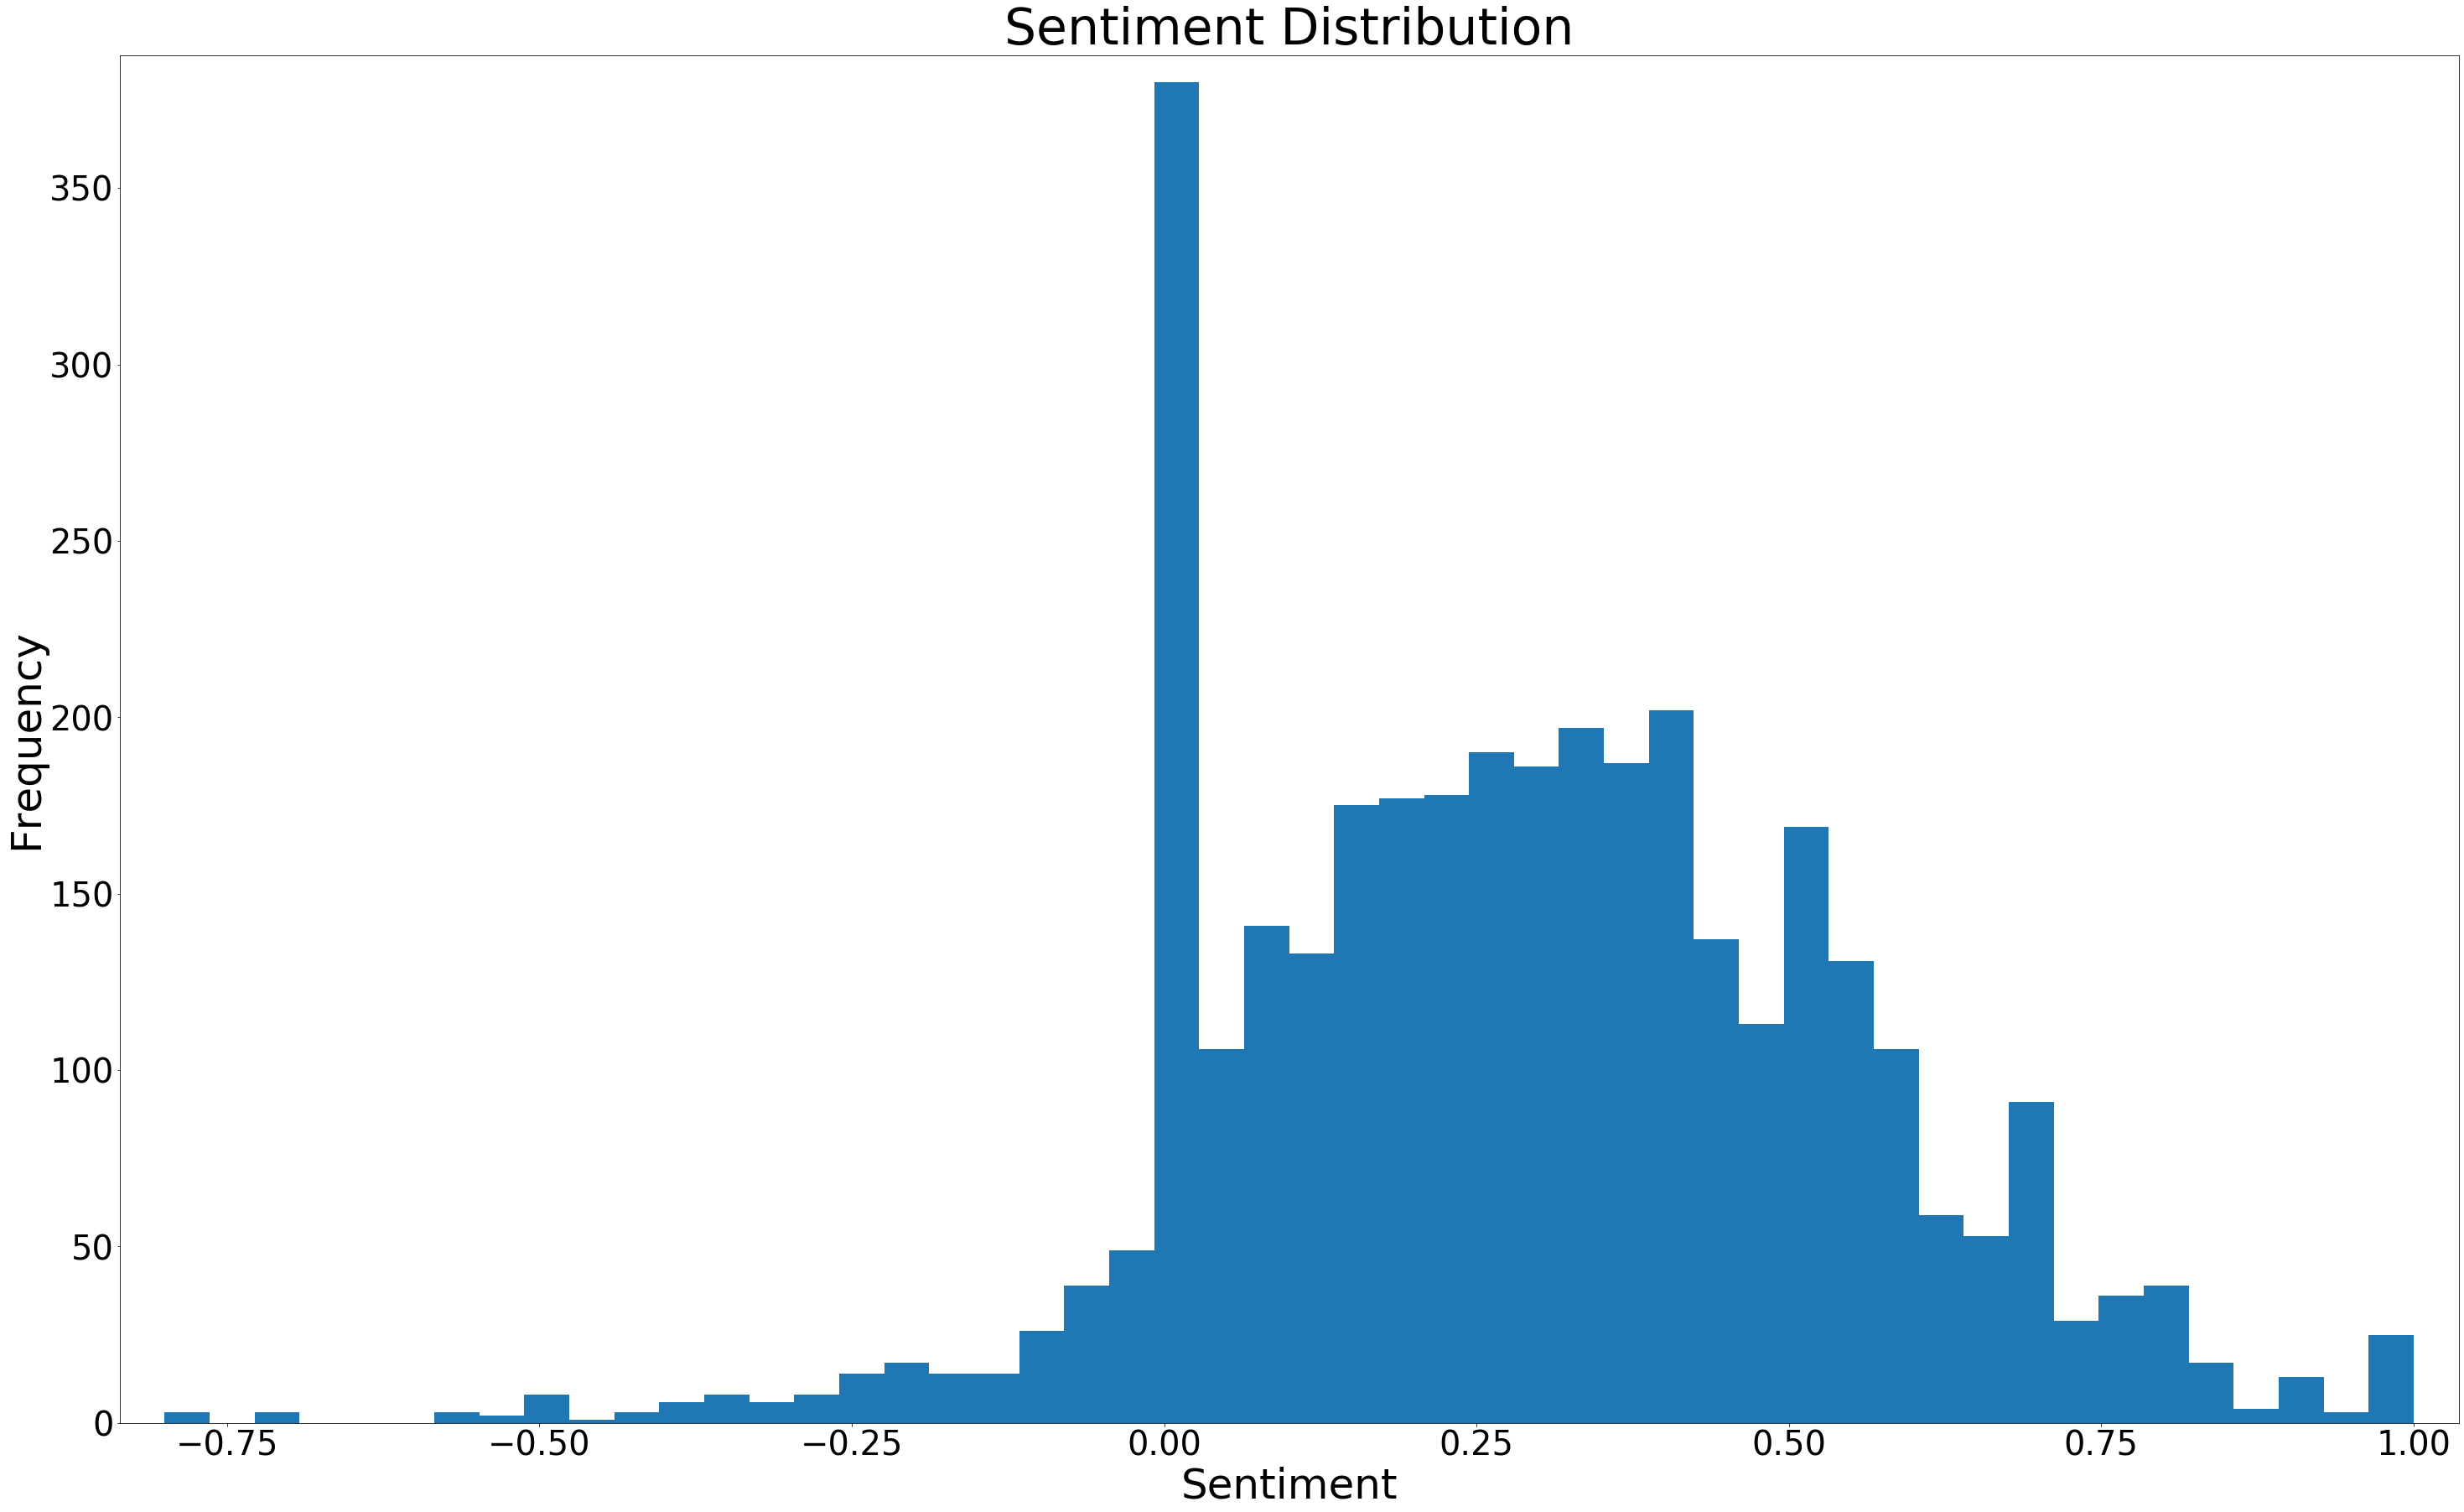

In [7]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

In [8]:
df.loc[df['rating']==1.0].describe()

rating  sentiment
count    73.0  73.000000
mean      1.0   0.032908
std       0.0   0.302593
min       1.0  -0.575000
25%       1.0  -0.175000
50%       1.0   0.000000
75%       1.0   0.227083
max       1.0   0.700000

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

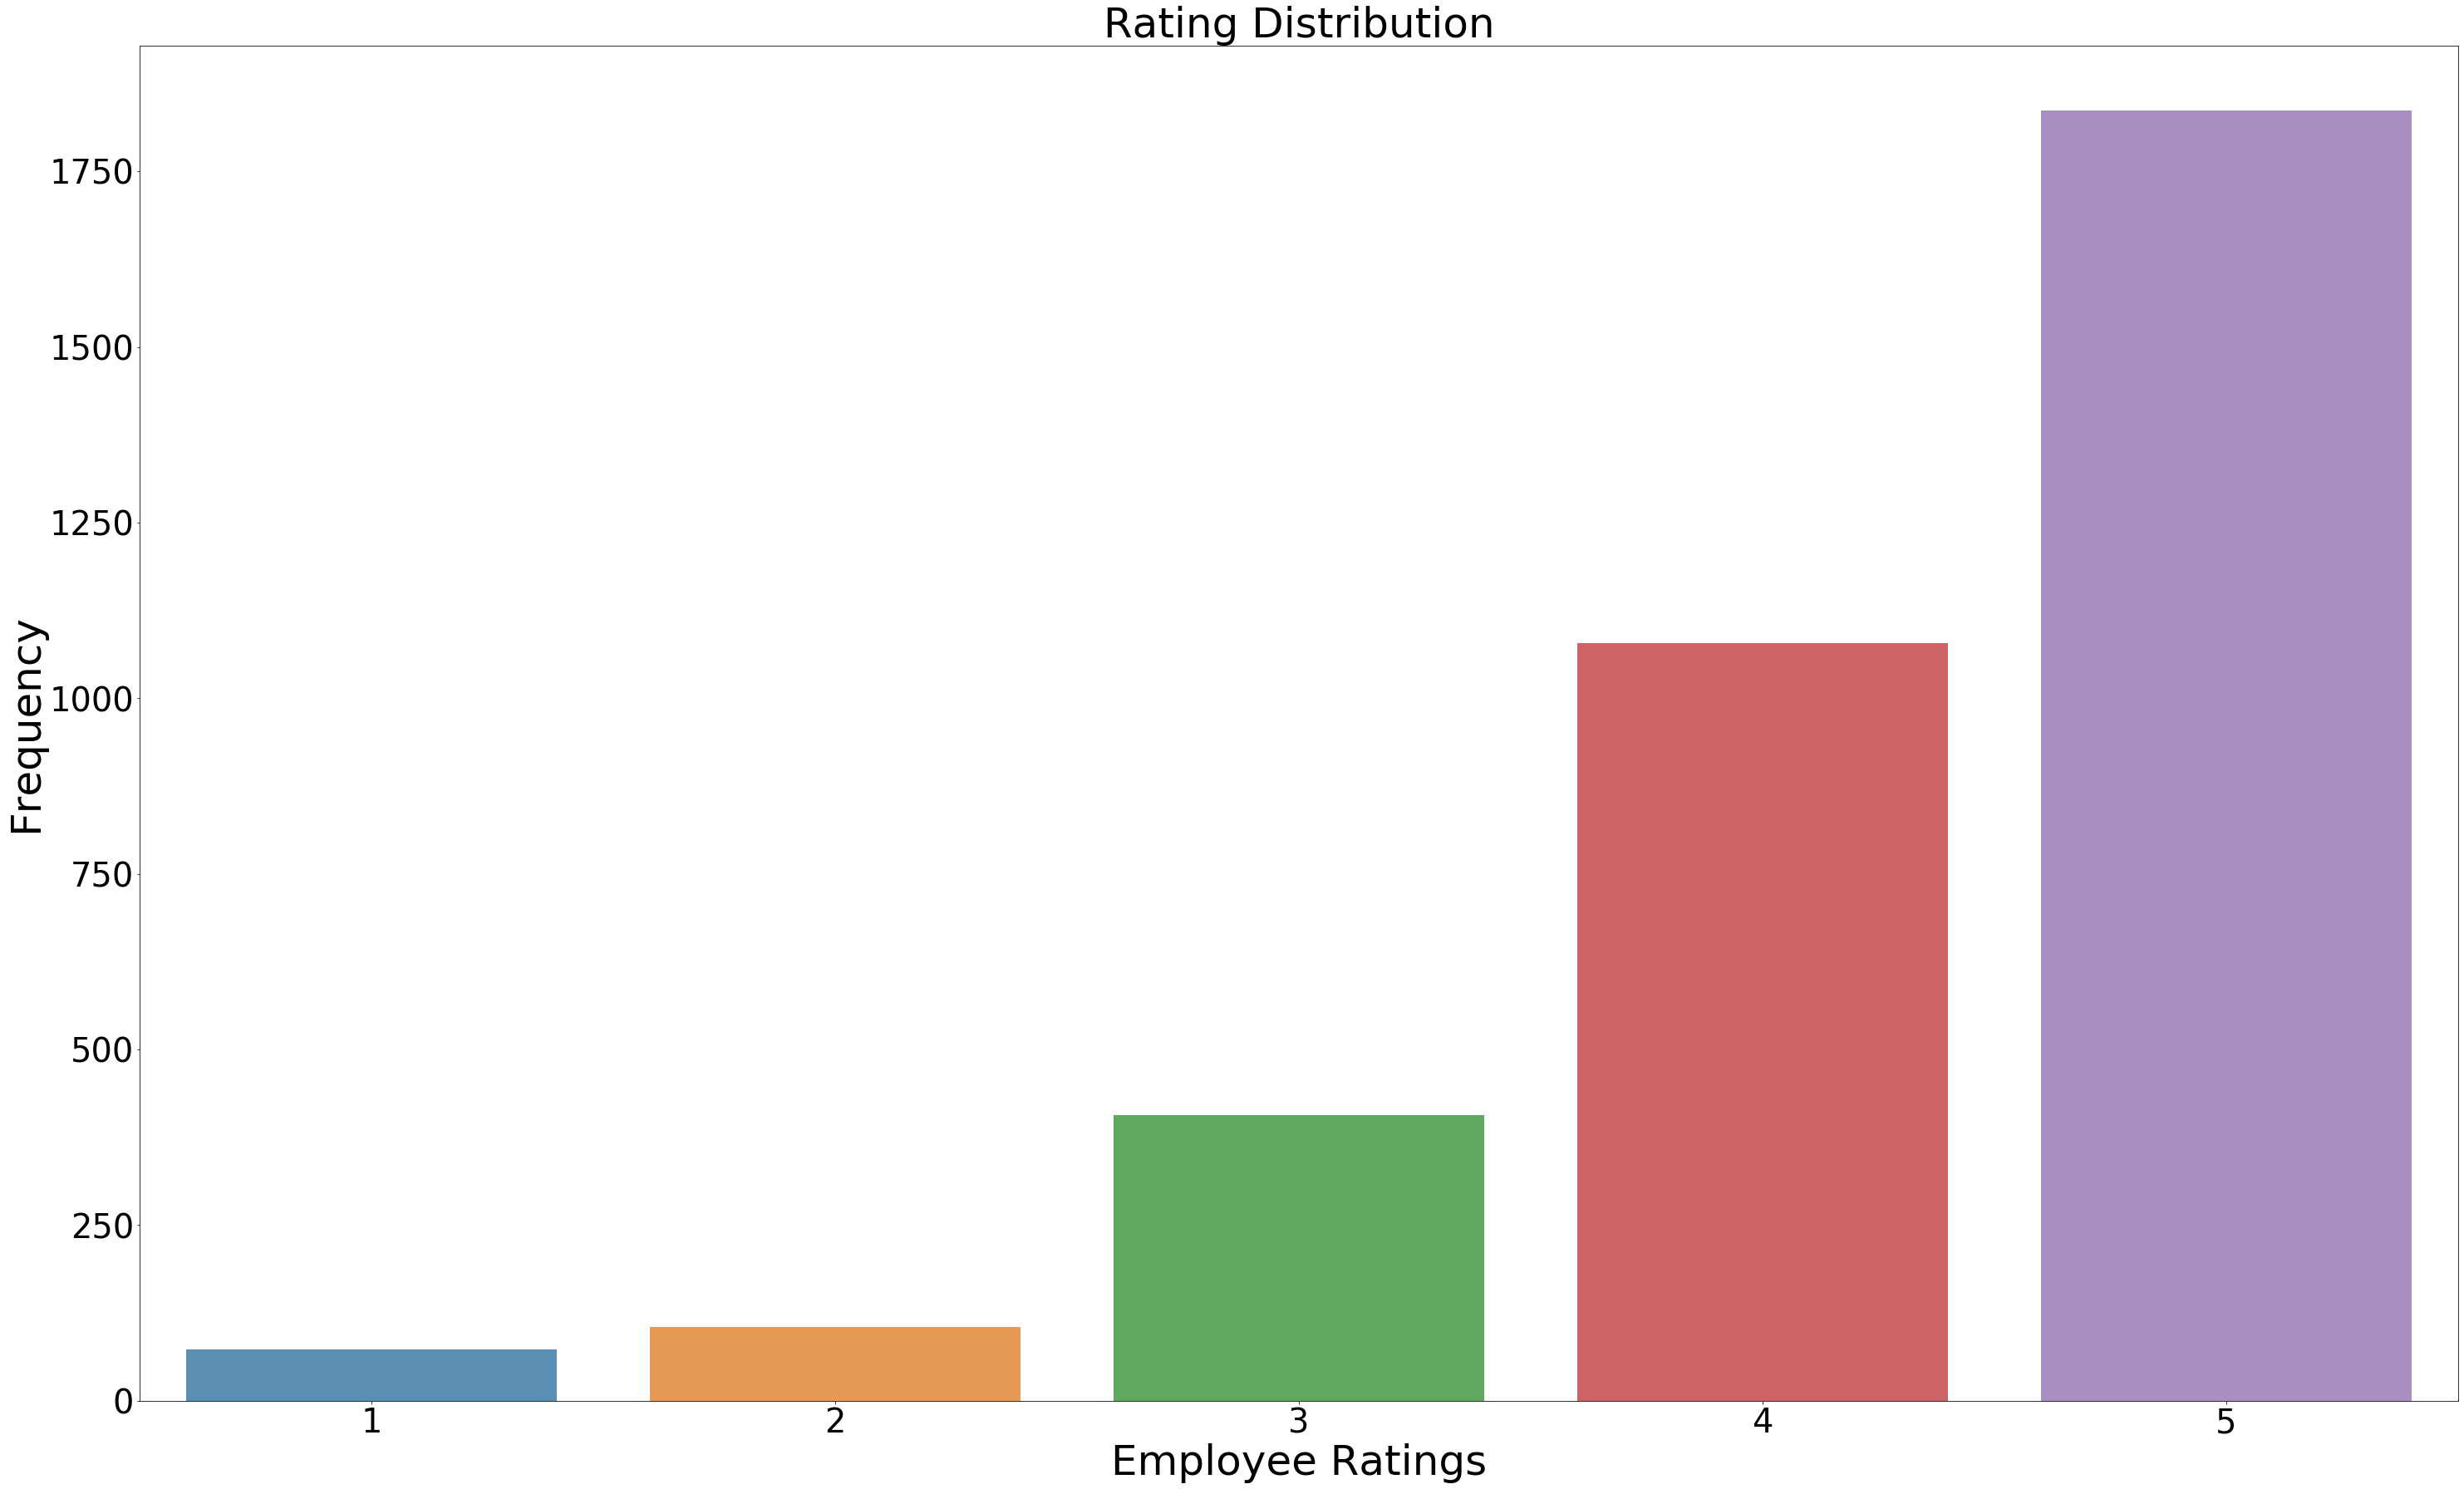

In [9]:
x_rating = df.rating.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Employee Ratings', fontsize=50)
plt.xticks(fontsize=40)

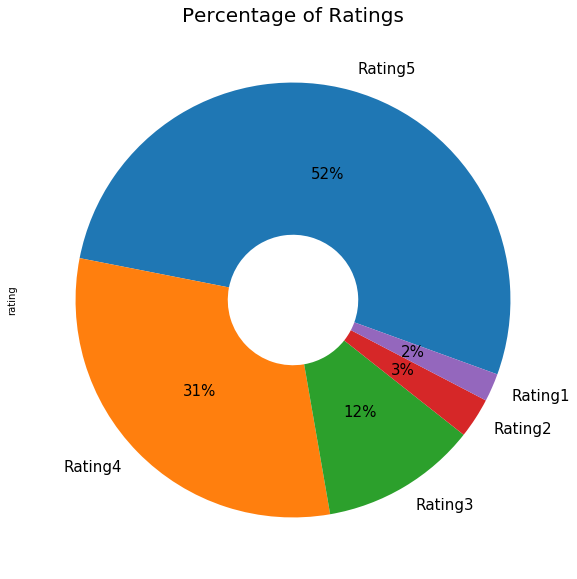

In [10]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
df.rating.value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

The employee ratings and sentiment analysis seem to confirm each other as for the most part the majority of our reviews and ratings are positive. When we compare avg sentiment and ratings we can see a definitive pattern.  The sentiment increases as ratings increase

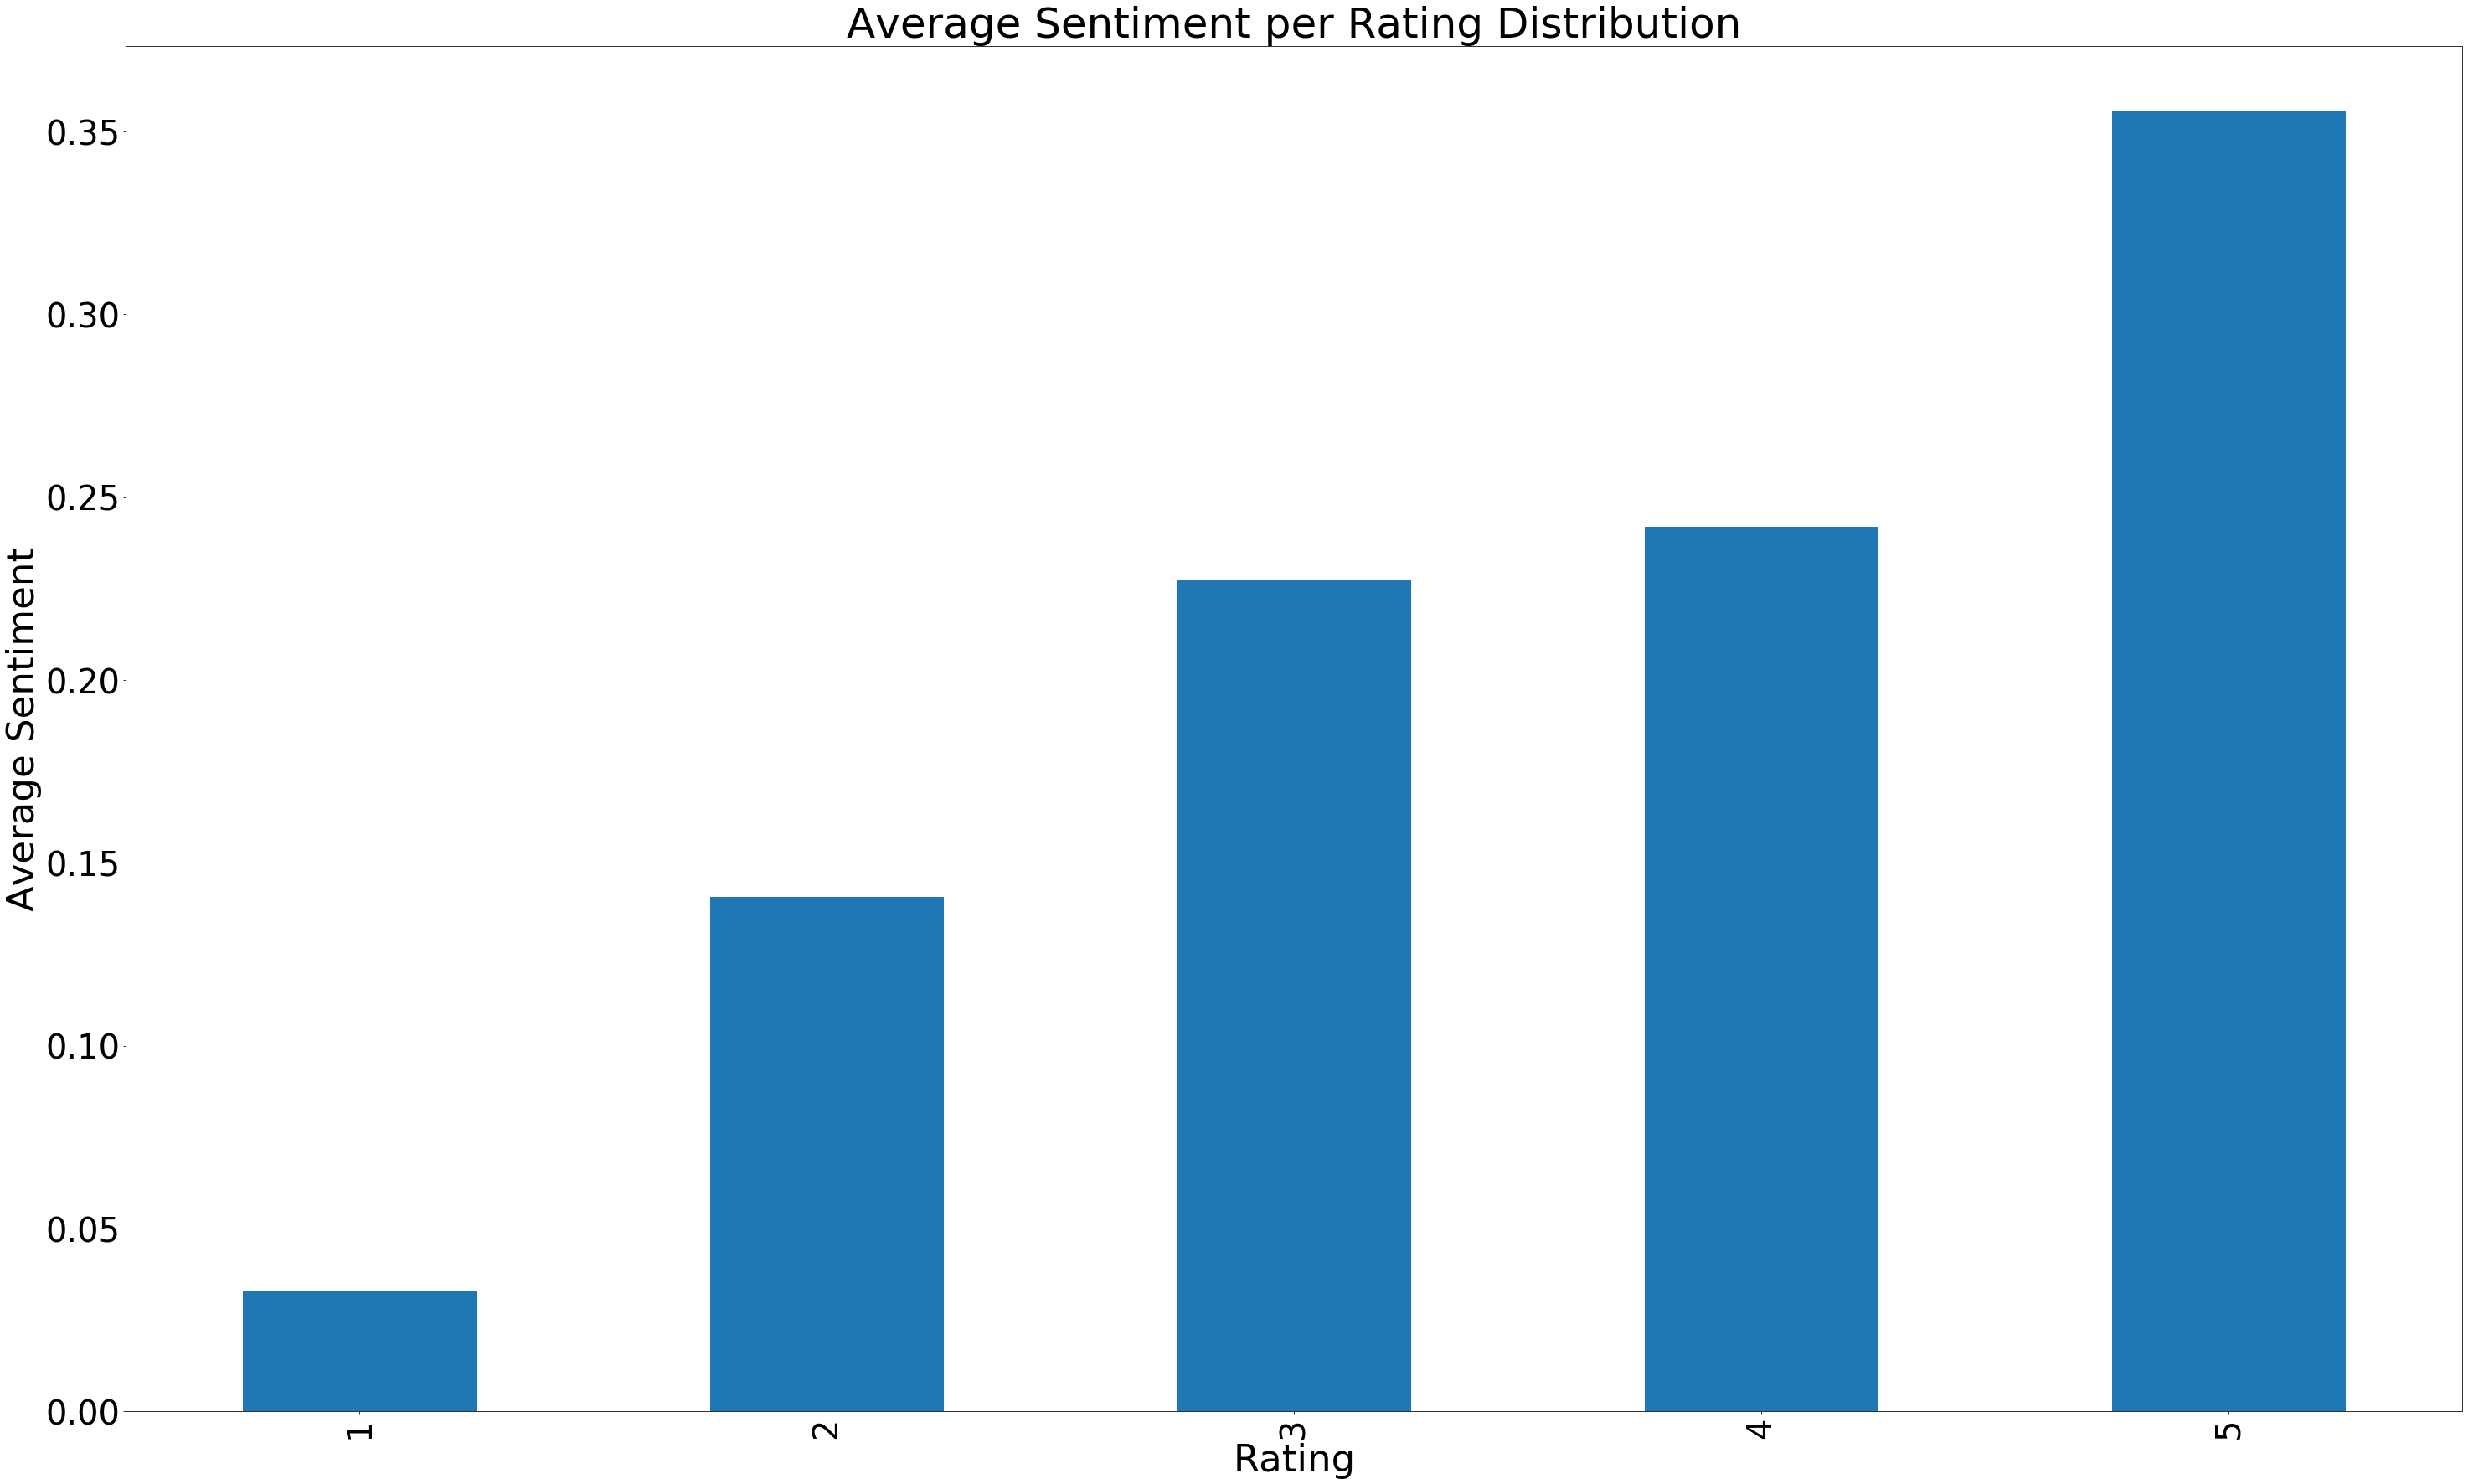

In [11]:
polarity_avg = df.groupby('rating')['sentiment'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

In [12]:
# create a new feature for length of the review
df['review_len'] = df['lemma_str'].astype(str).apply(len)


In [13]:
# Create a new feature for the word count fo the review
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))

In [14]:
df.head()

rating  \
0       4   
1       5   
2       5   
4       5   
5       5   

                                                                                            lemmatized  \
0  [contract, design, custom, pitot, test, adapter, involve, multiple, design, phase, prototypes, f...   
1  [lot, support, collaboration, across, many, engage, project, give, opportunity, grow, idea, resp...   
2  [work, responsibility, culture, great, hard, part, job, hectic, management, good, google, ad, le...   
4  [amaze, work, environment, everyone, smart, friendly, learn, lot, great, coworkers, amaze, manag...   
5  [productive, innovative, culture, environment, foster, creativity, limit, potential, positive, t...   

                                                                                             lemma_str  \
0  contract design custom pitot test adapter involve multiple design phase prototypes final design ...   
1  lot support collaboration across many engage project give opportunity grow idea respect addition...   
2  work responsibility culture great hard part job hectic management good google ad learn environme...   
4  amaze work environment everyone smart friendly learn lot great coworkers amaze manager director ...   
5  productive innovative culture environment foster creativity limit potential positive topic wish ...   

   sentiment  review_len  word_count  
0   0.000000         137          18  
1   0.675000         113          15  
2   0.260417         115          17  
4   0.284184         192          27  
5   0.181818         144          18

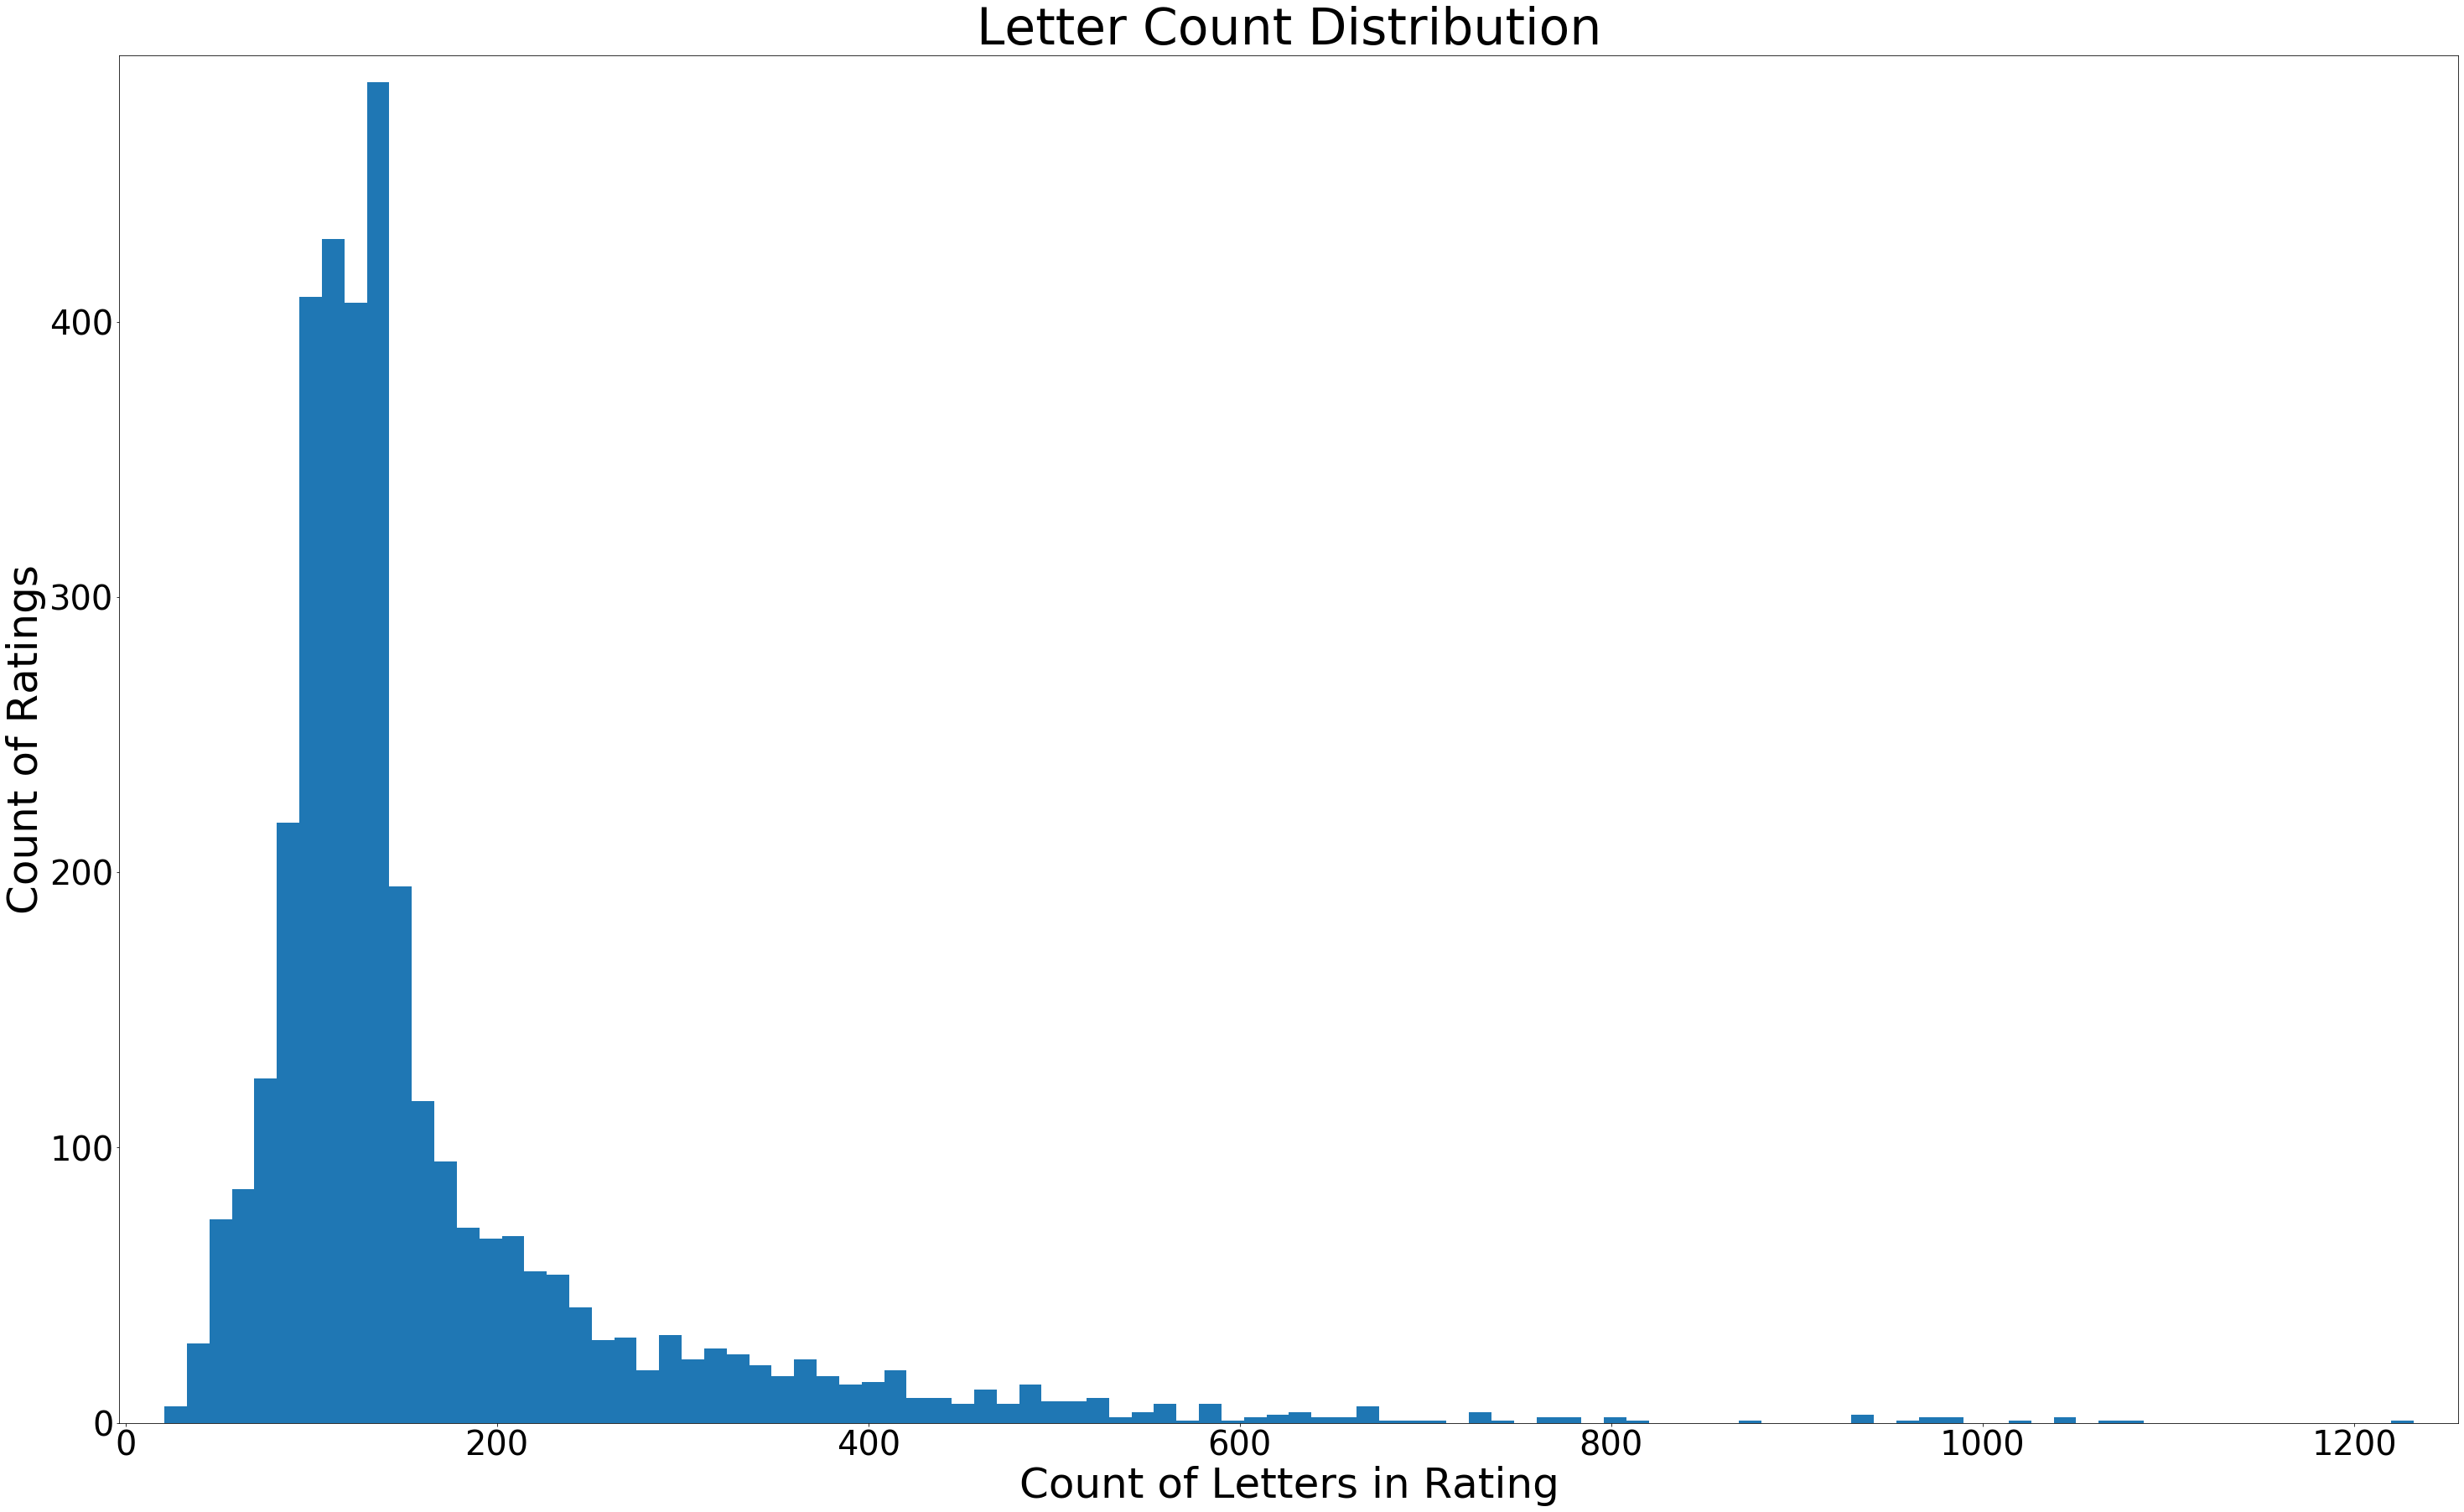

In [15]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Letters in Rating', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Count of Ratings', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['review_len'], bins=100)
plt.title('Letter Count Distribution', fontsize=60)
plt.show()

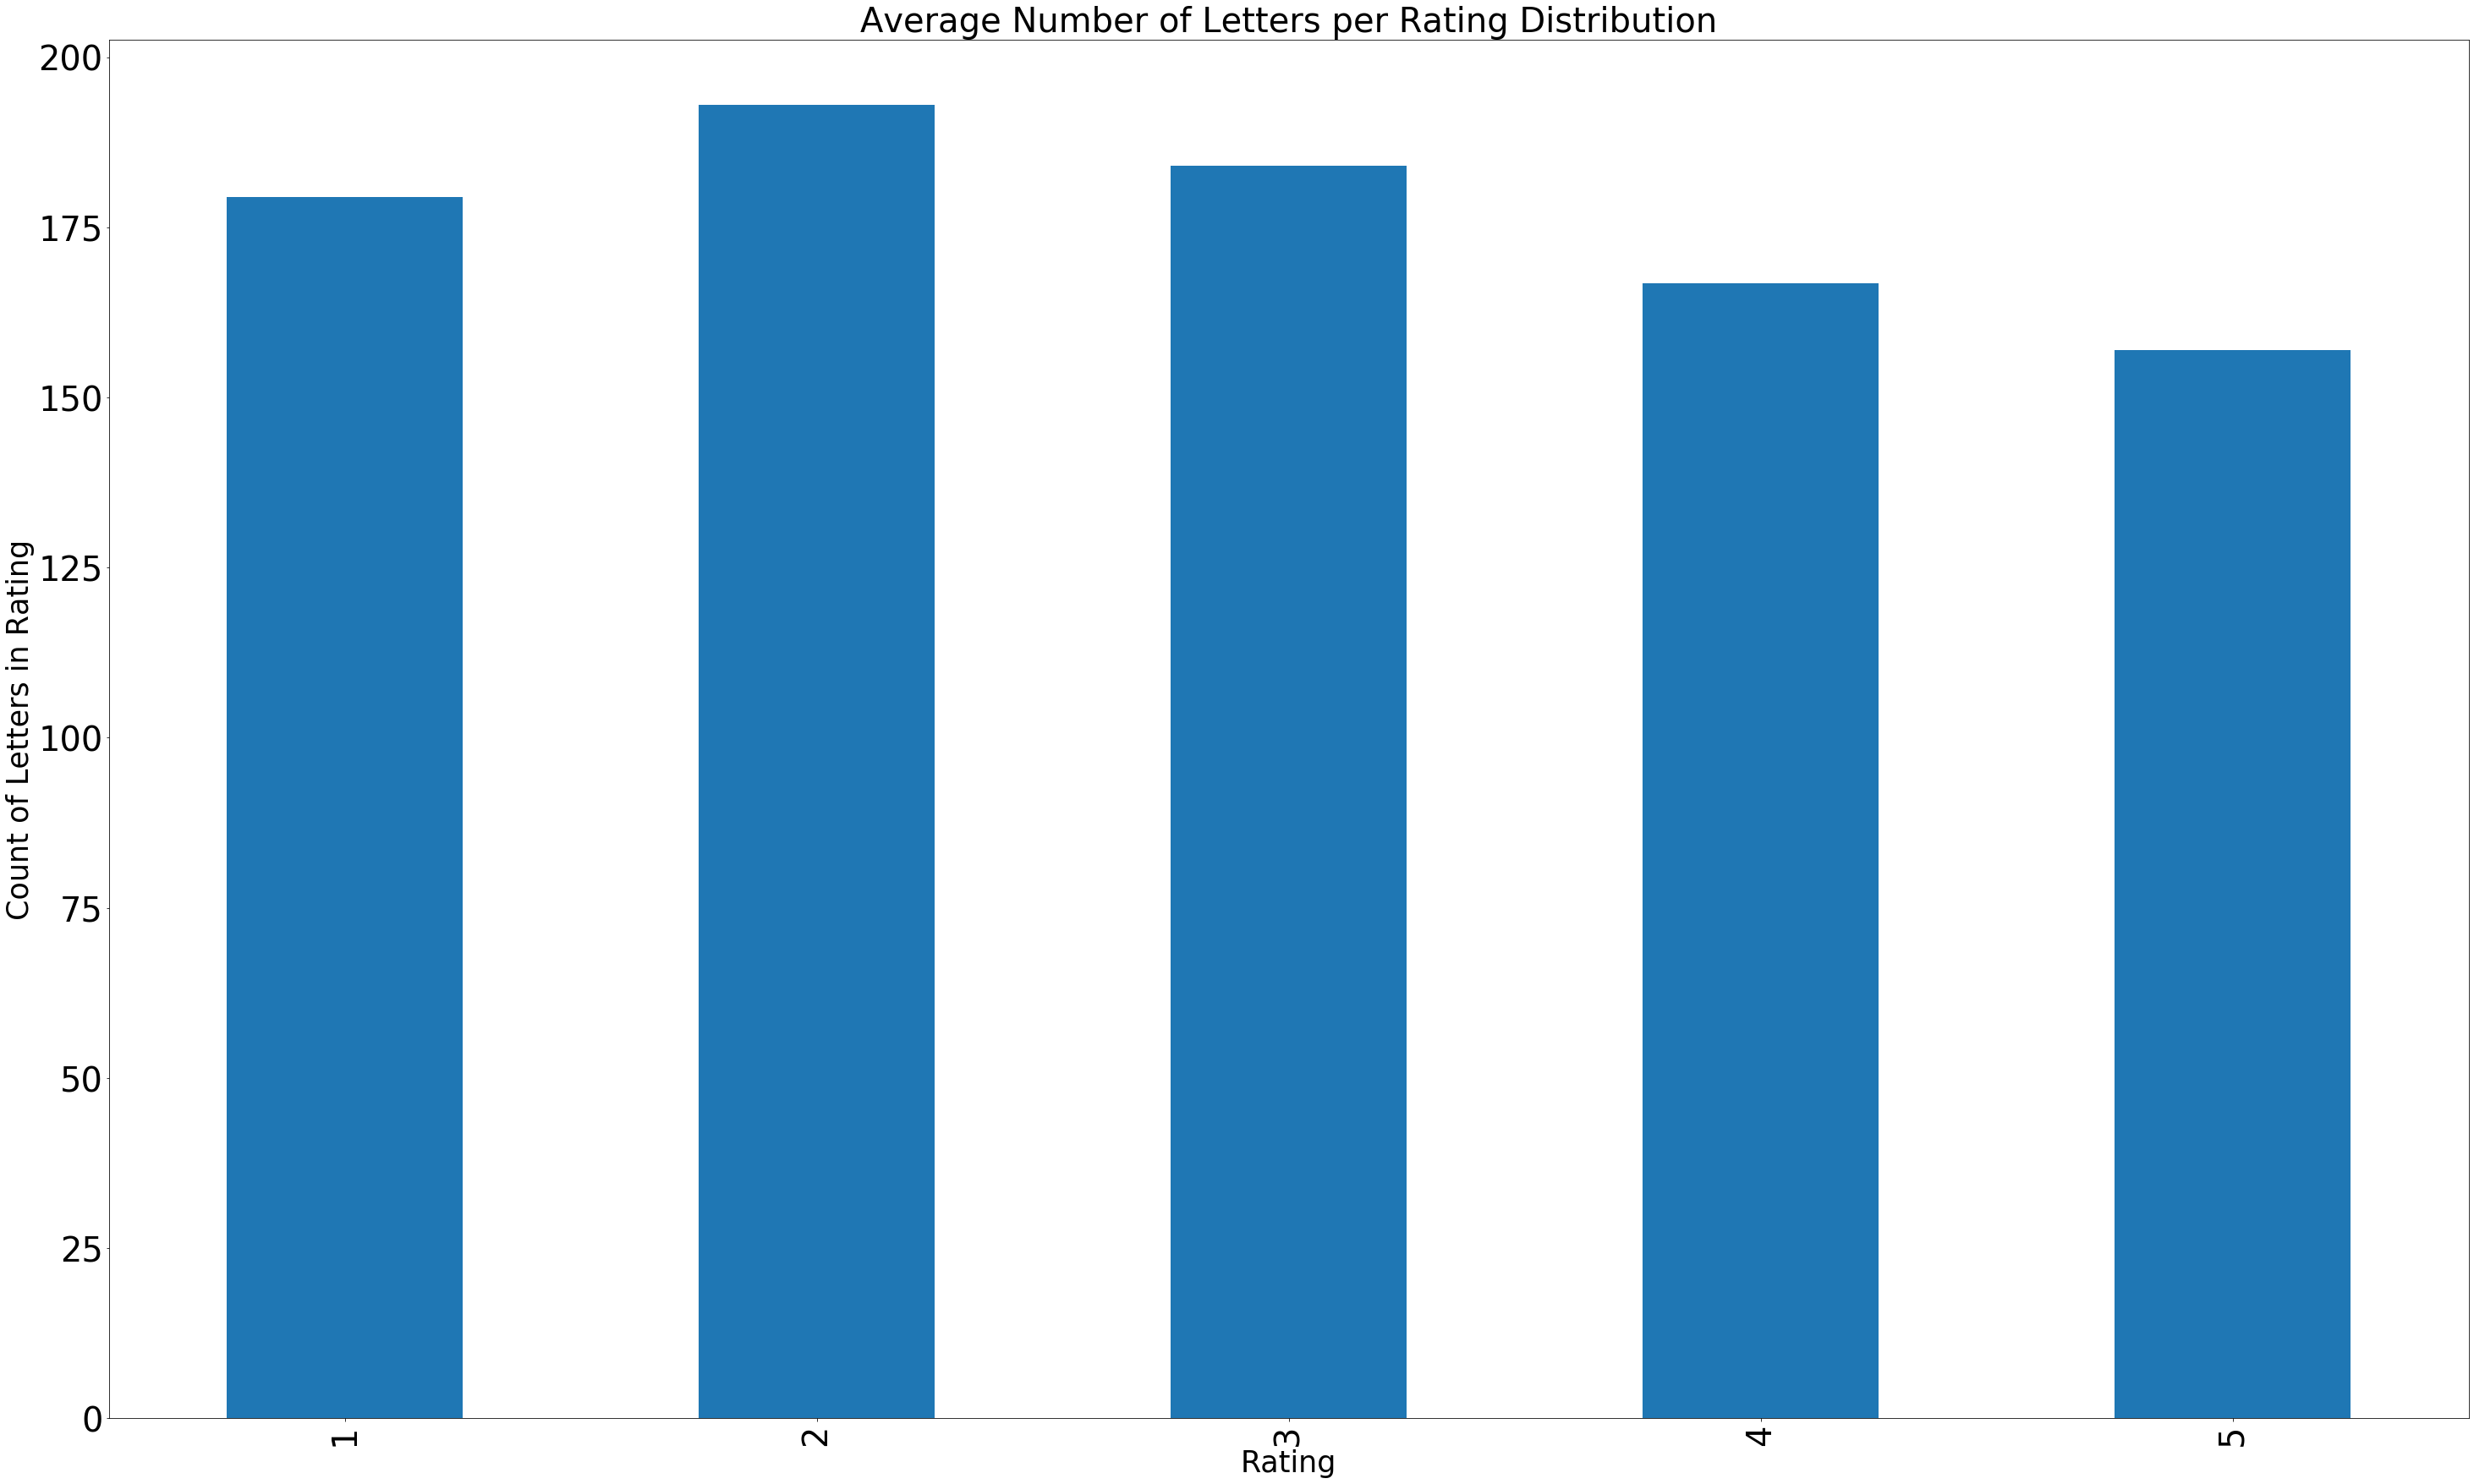

In [16]:
letter_avg = df.groupby('rating')['review_len'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Letters in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Rating Distribution', fontsize=40)
plt.show()

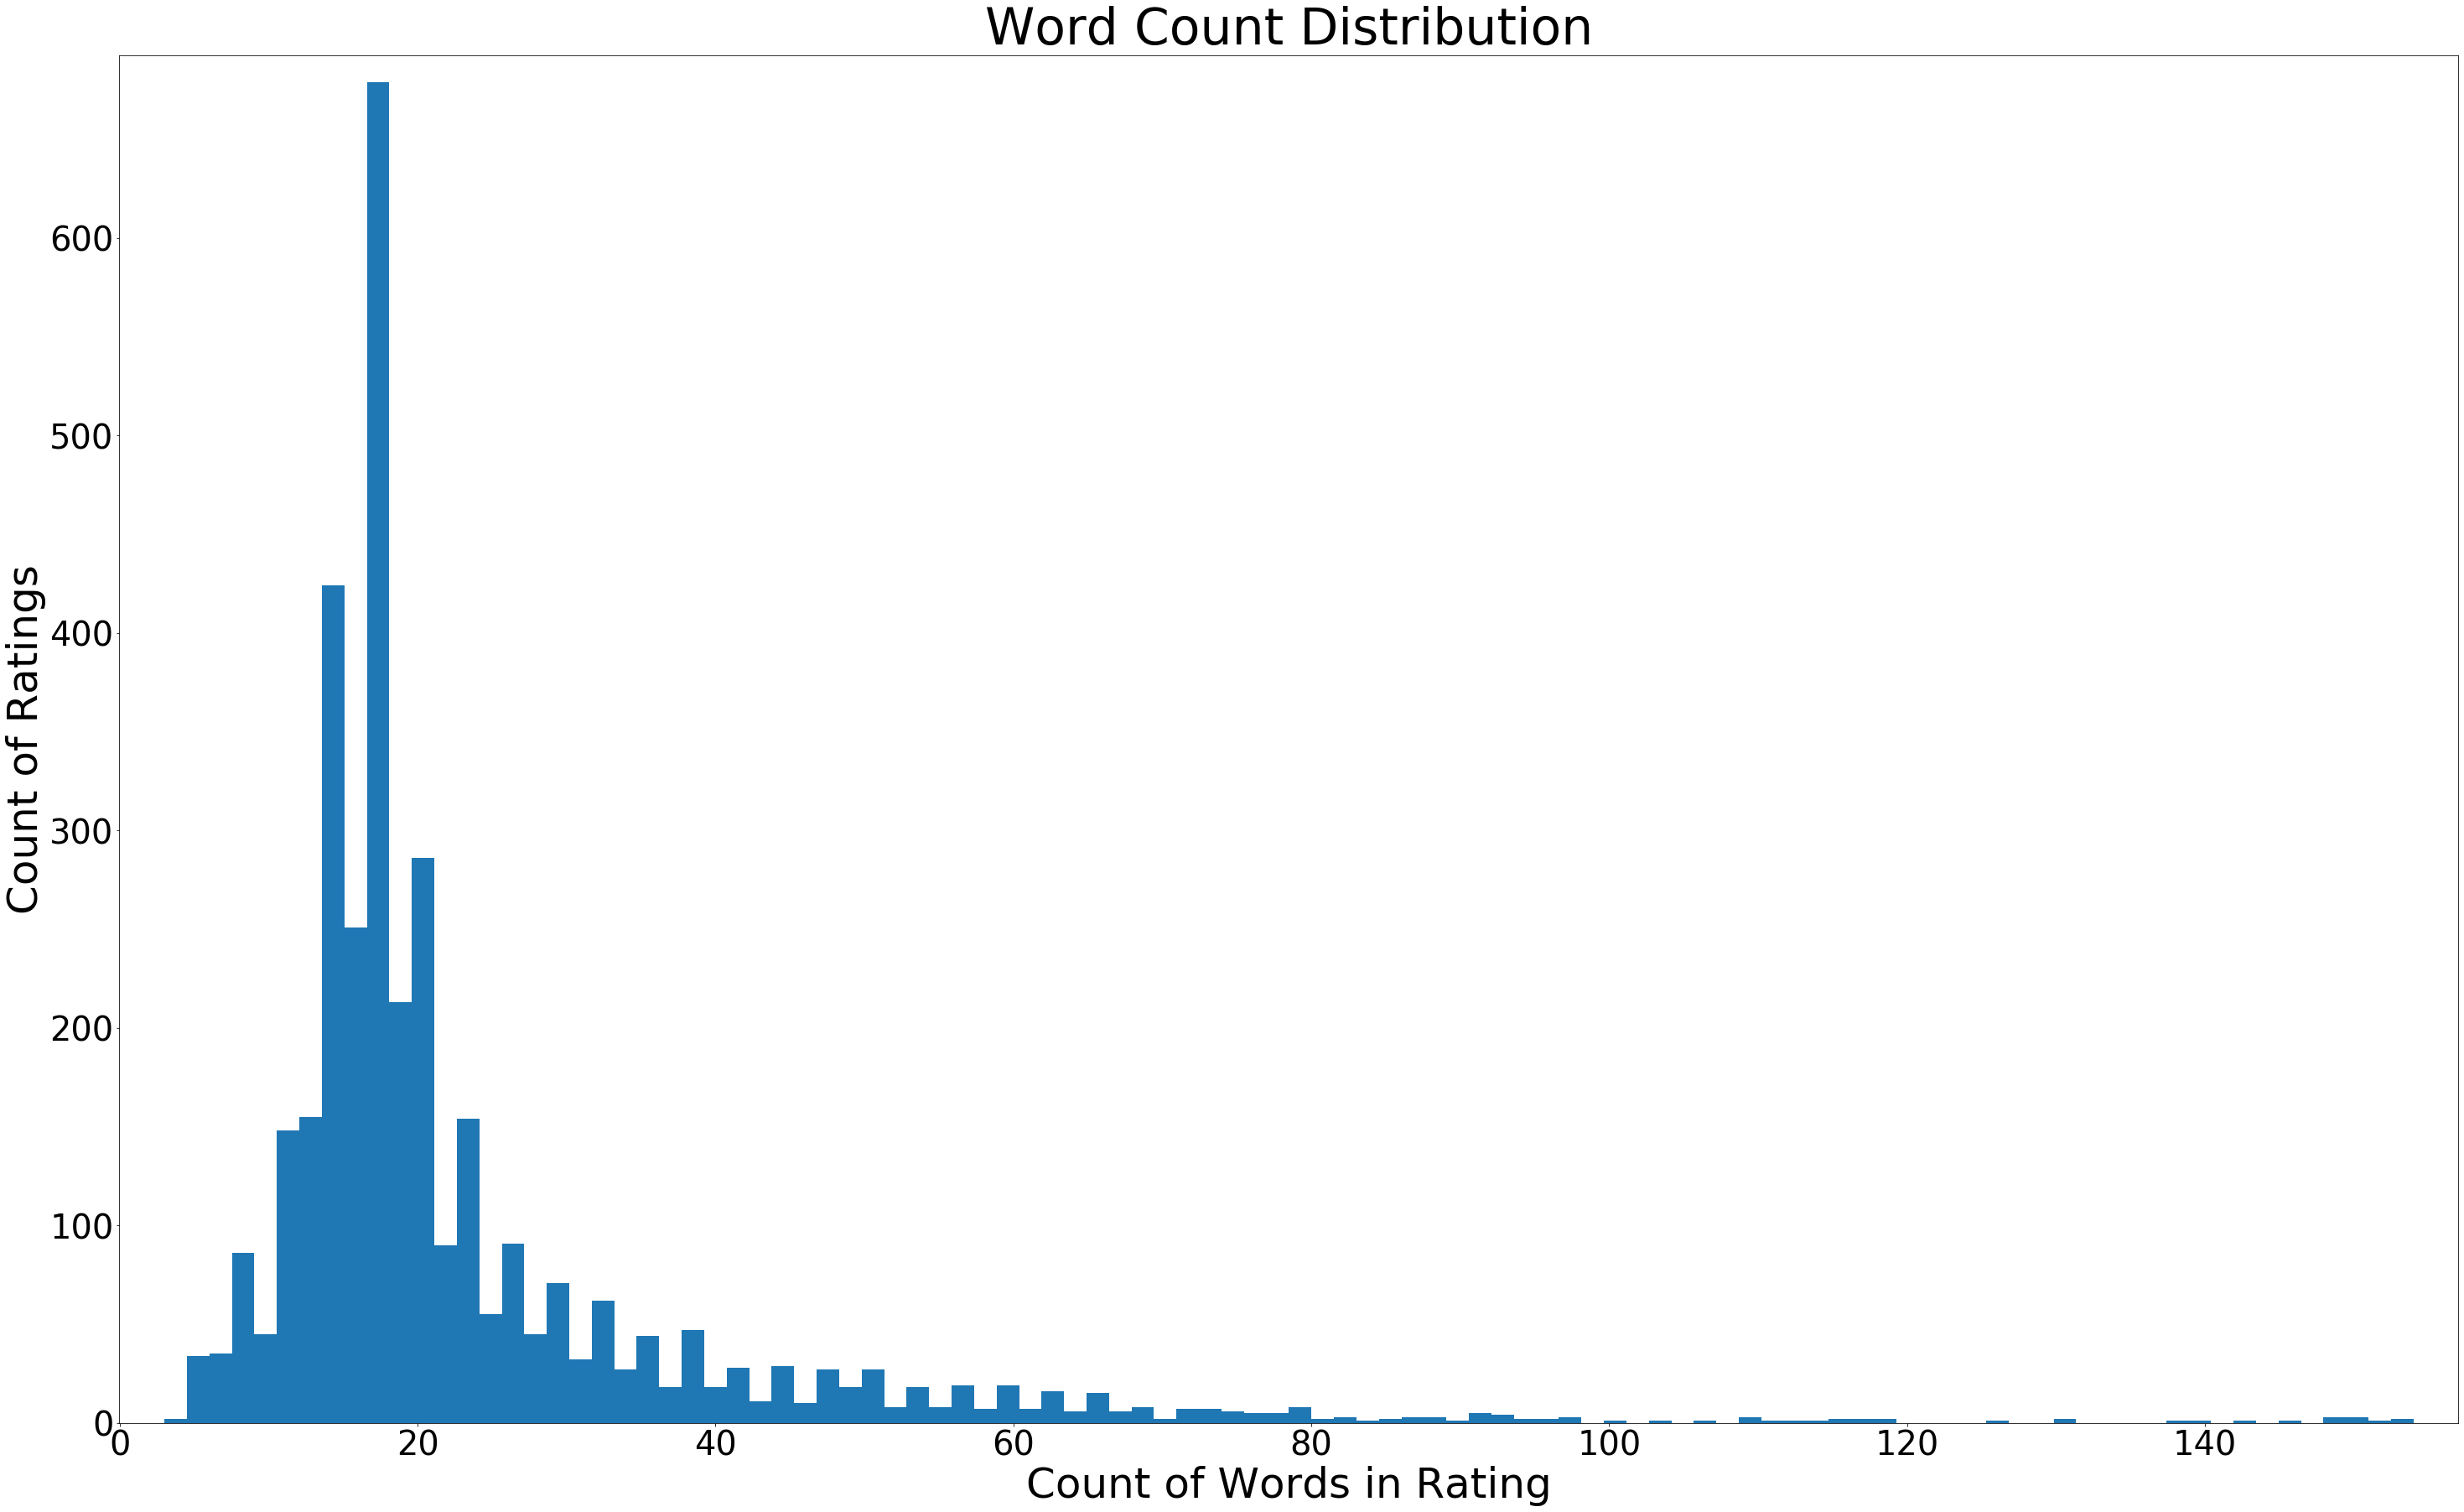

In [17]:
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.xlabel('Count of Words in Rating', fontsize=50)
plt.ylabel('Count of Ratings', fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.hist(df['word_count'], bins=100)
plt.title('Word Count Distribution', fontsize=60)
plt.show()

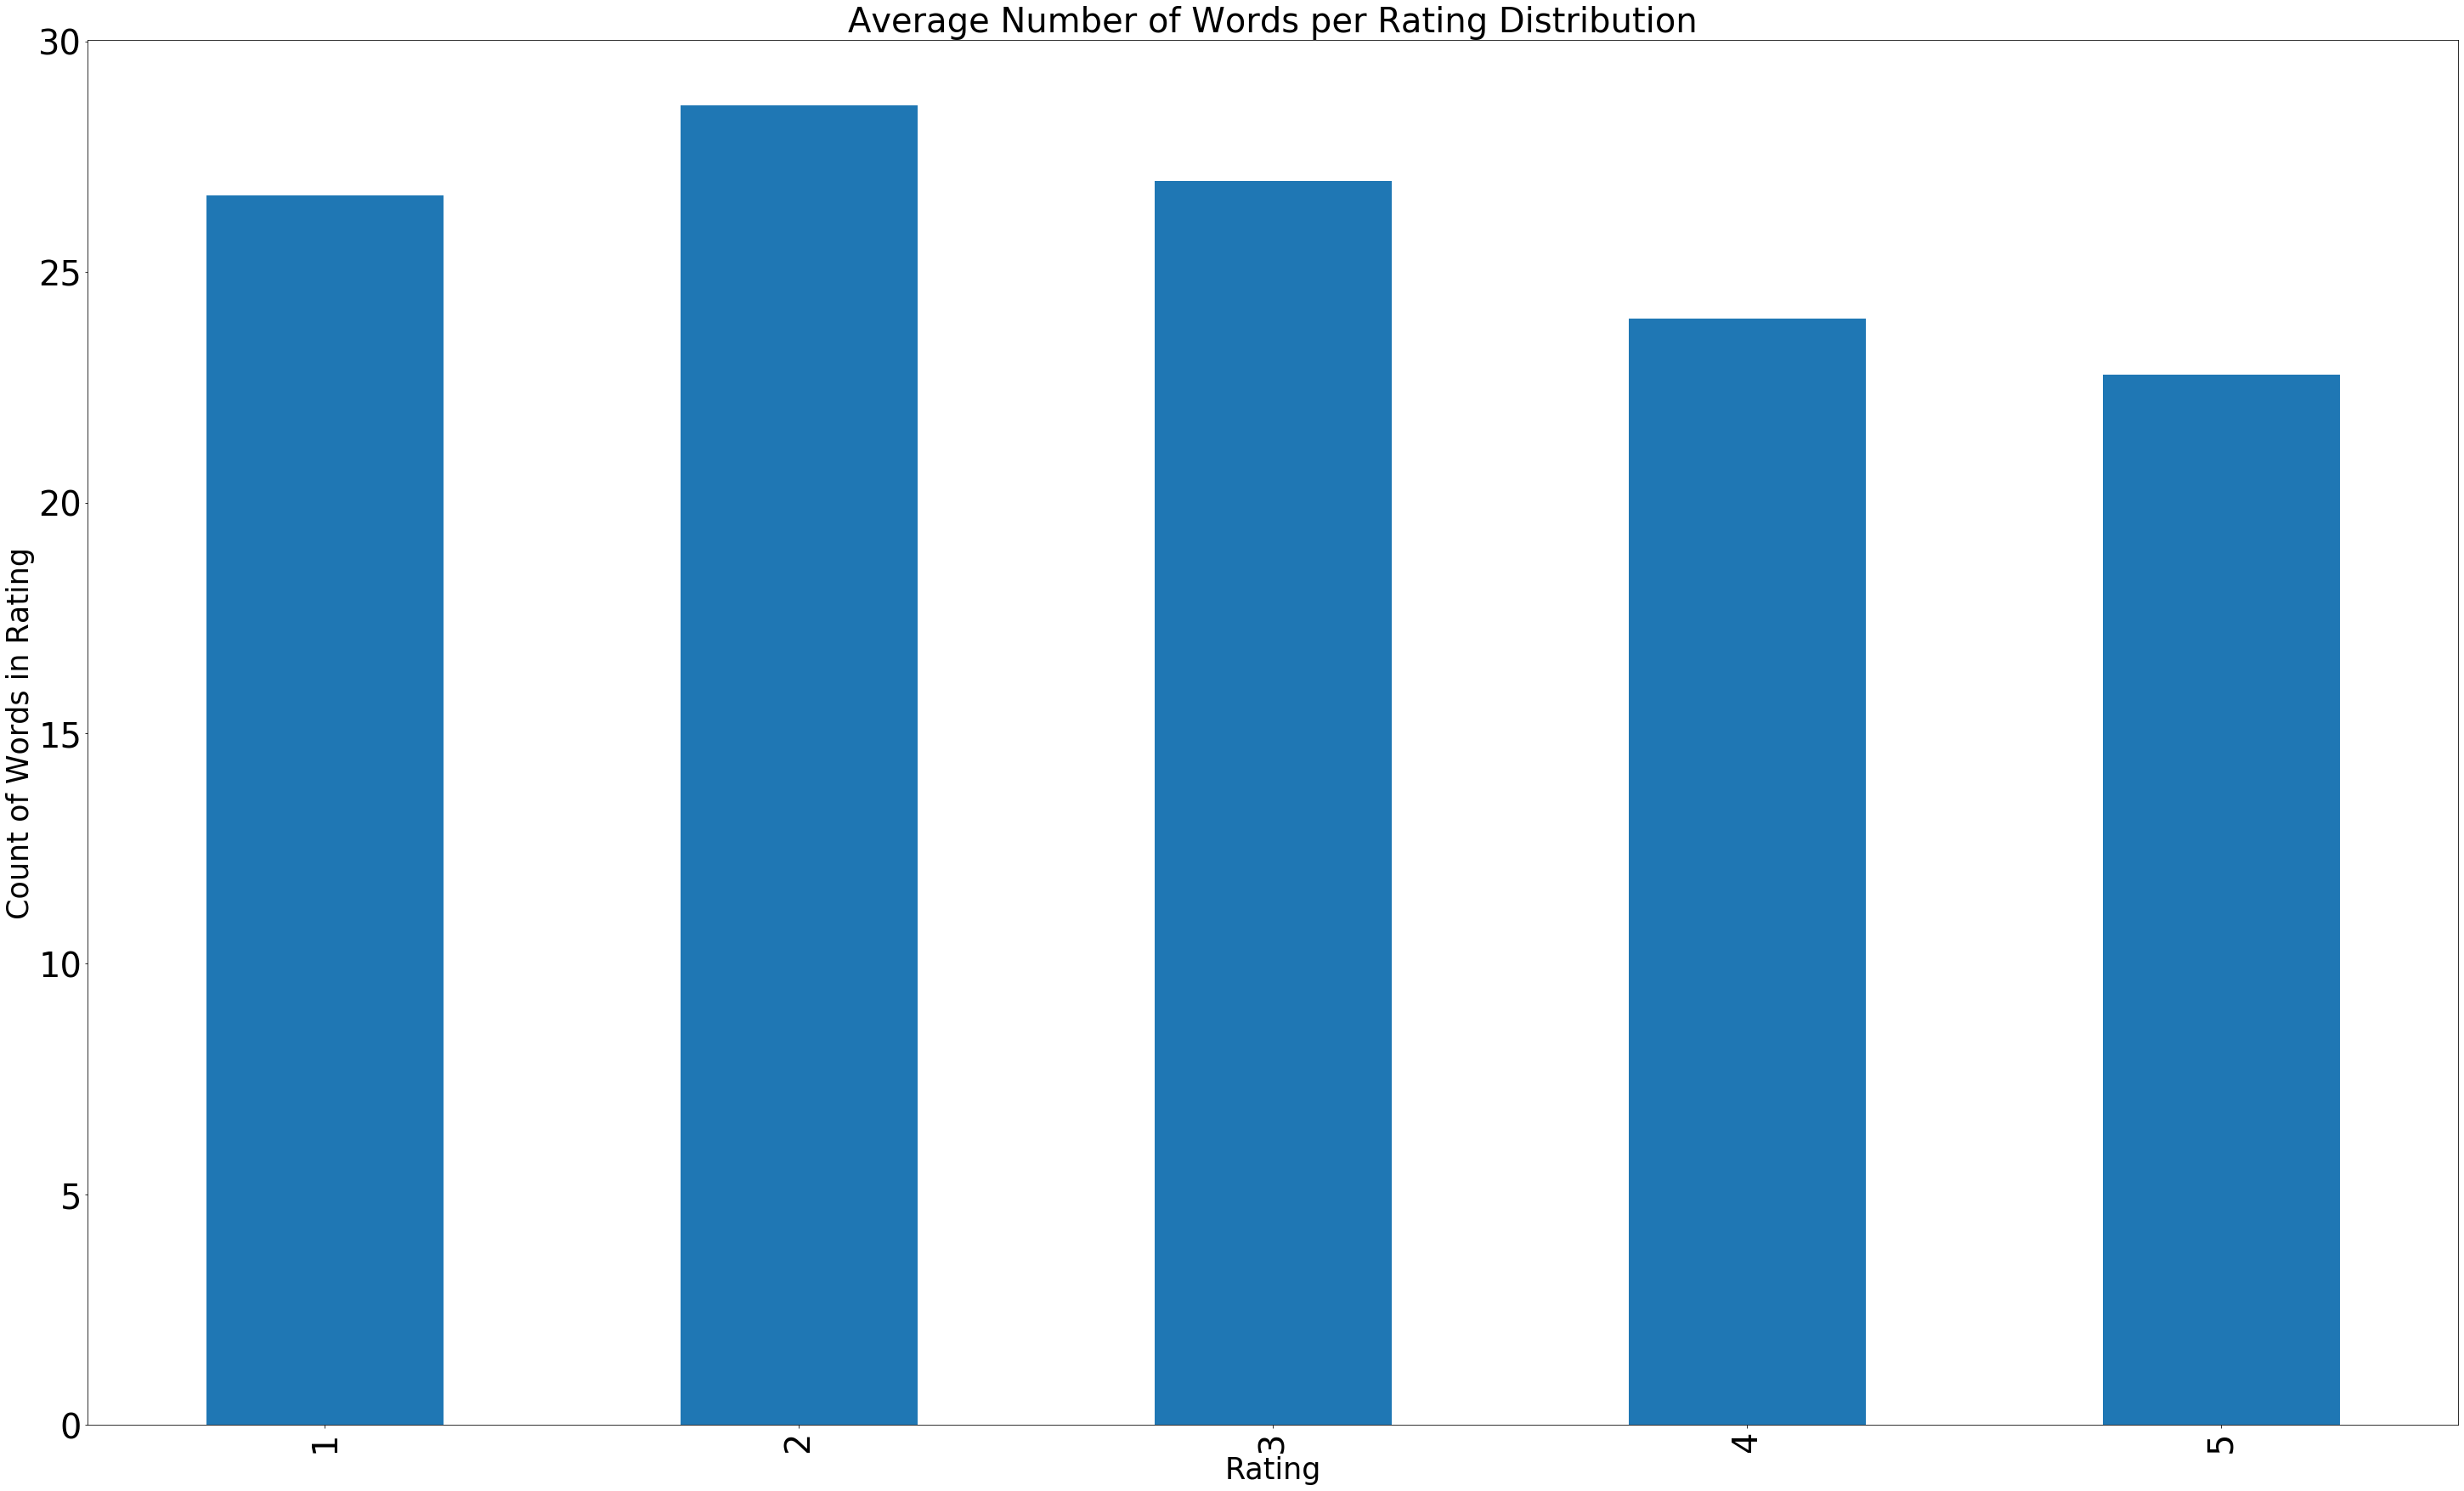

In [18]:
word_avg = df.groupby('rating')['word_count'].mean().plot(kind='bar', figsize=(50,30))
plt.xlabel('Rating', fontsize=35)
plt.ylabel('Count of Words in Rating', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Rating Distribution', fontsize=40)
plt.show()

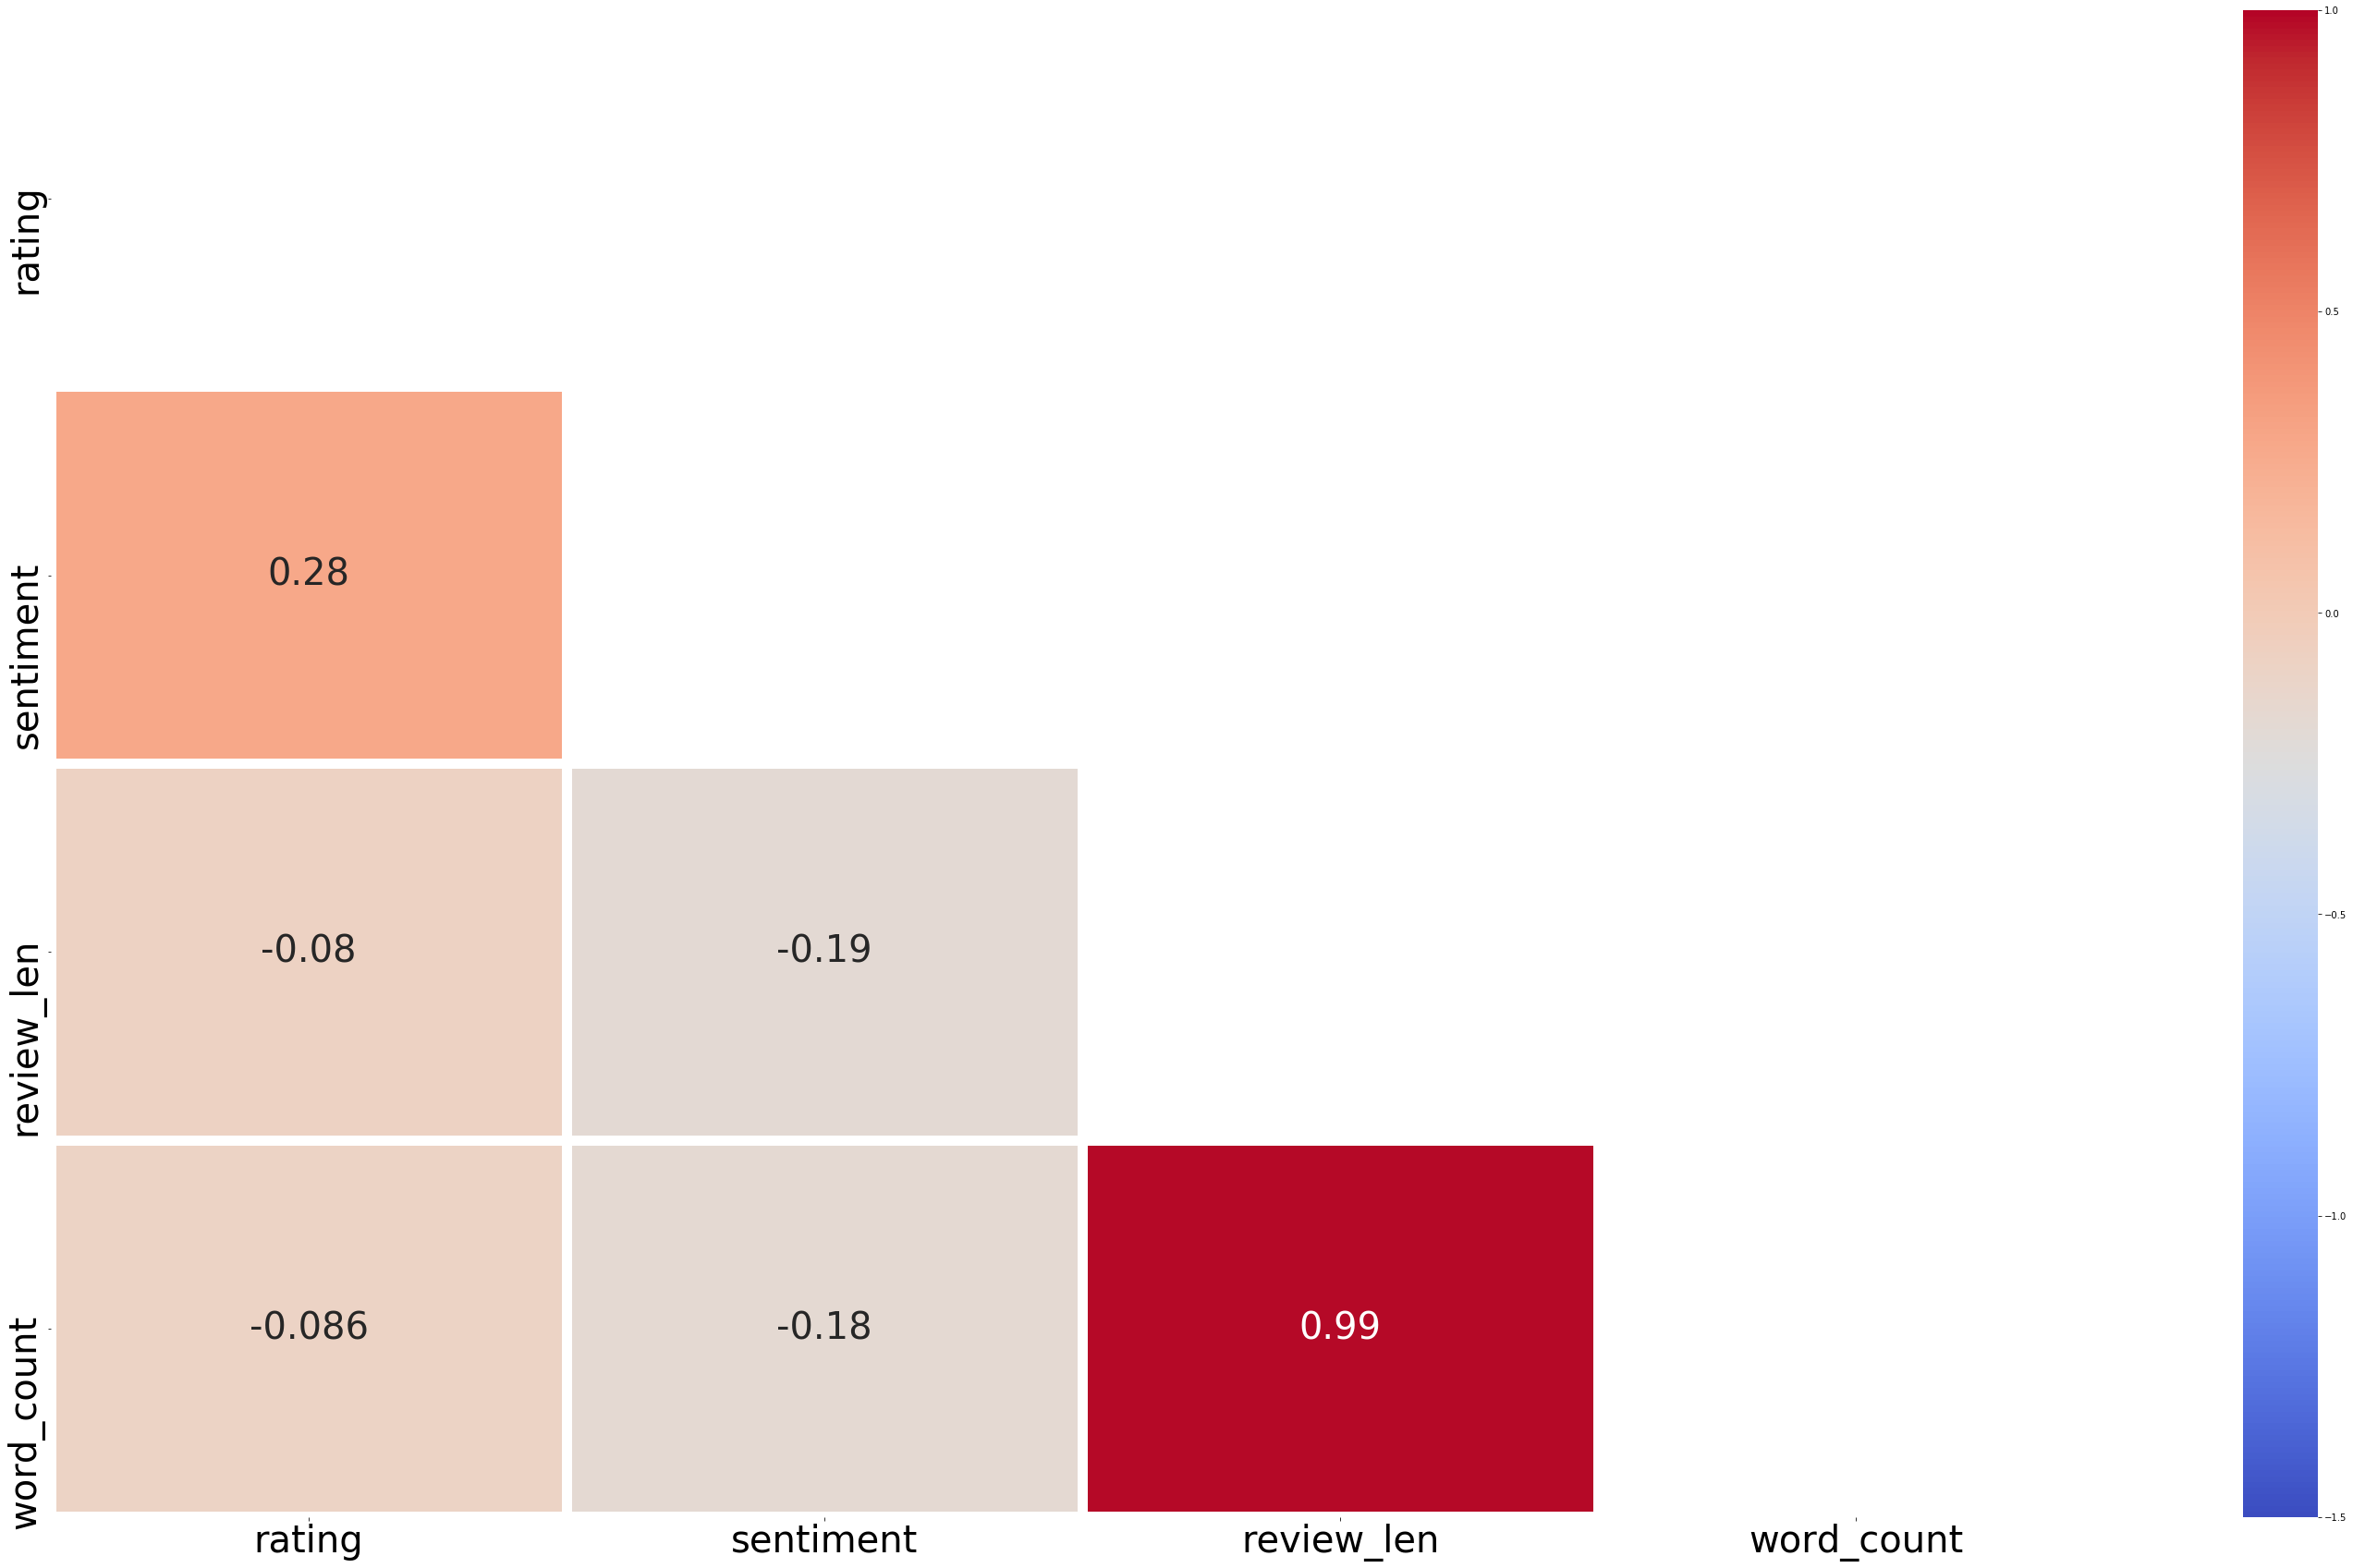

In [20]:
correlation = df[['rating','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)

In [ ]:
df

## Let's Examine the Word Frequencies
    

In [21]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist

In [22]:
print(allwords)

['contract', 'design', 'custom', 'pitot', 'test', 'adapter', 'involve', 'multiple', 'design', 'phase', 'prototypes', 'final', 'design', 'include', 'five', 'individually', 'adjustable', 'port', 'lot', 'support', 'collaboration', 'across', 'many', 'engage', 'project', 'give', 'opportunity', 'grow', 'idea', 'respect', 'addition', 'campus', 'beautiful', 'work', 'responsibility', 'culture', 'great', 'hard', 'part', 'job', 'hectic', 'management', 'good', 'google', 'ad', 'learn', 'environment', 'typical', 'day', 'work', 'amaze', 'work', 'environment', 'everyone', 'smart', 'friendly', 'learn', 'lot', 'great', 'coworkers', 'amaze', 'manager', 'director', 'great', 'work/life', 'balance', 'perk', 'time', 'career', 'path', 'get', 'bit', 'slow', 'amaze', 'professional', 'experience', 'overall', 'productive', 'innovative', 'culture', 'environment', 'foster', 'creativity', 'limit', 'potential', 'positive', 'topic', 'wish', 'could', 'remain', 'company', 'personal', 'reason', 'force', 'leave', 'technic

In [23]:
mostcommon = FreqDist(allwords).most_common(100)

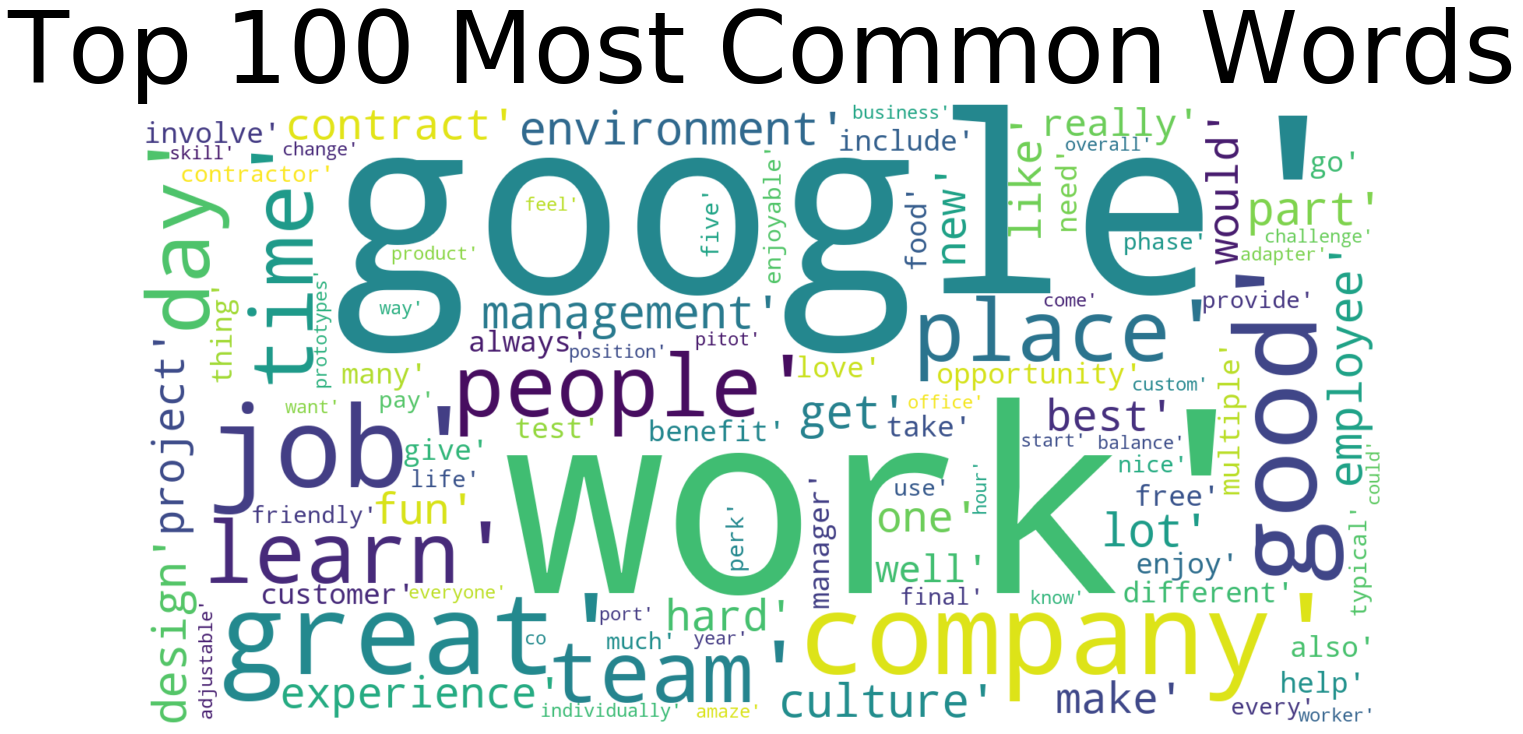

In [24]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)

plt.tight_layout(pad=0)
plt.show()

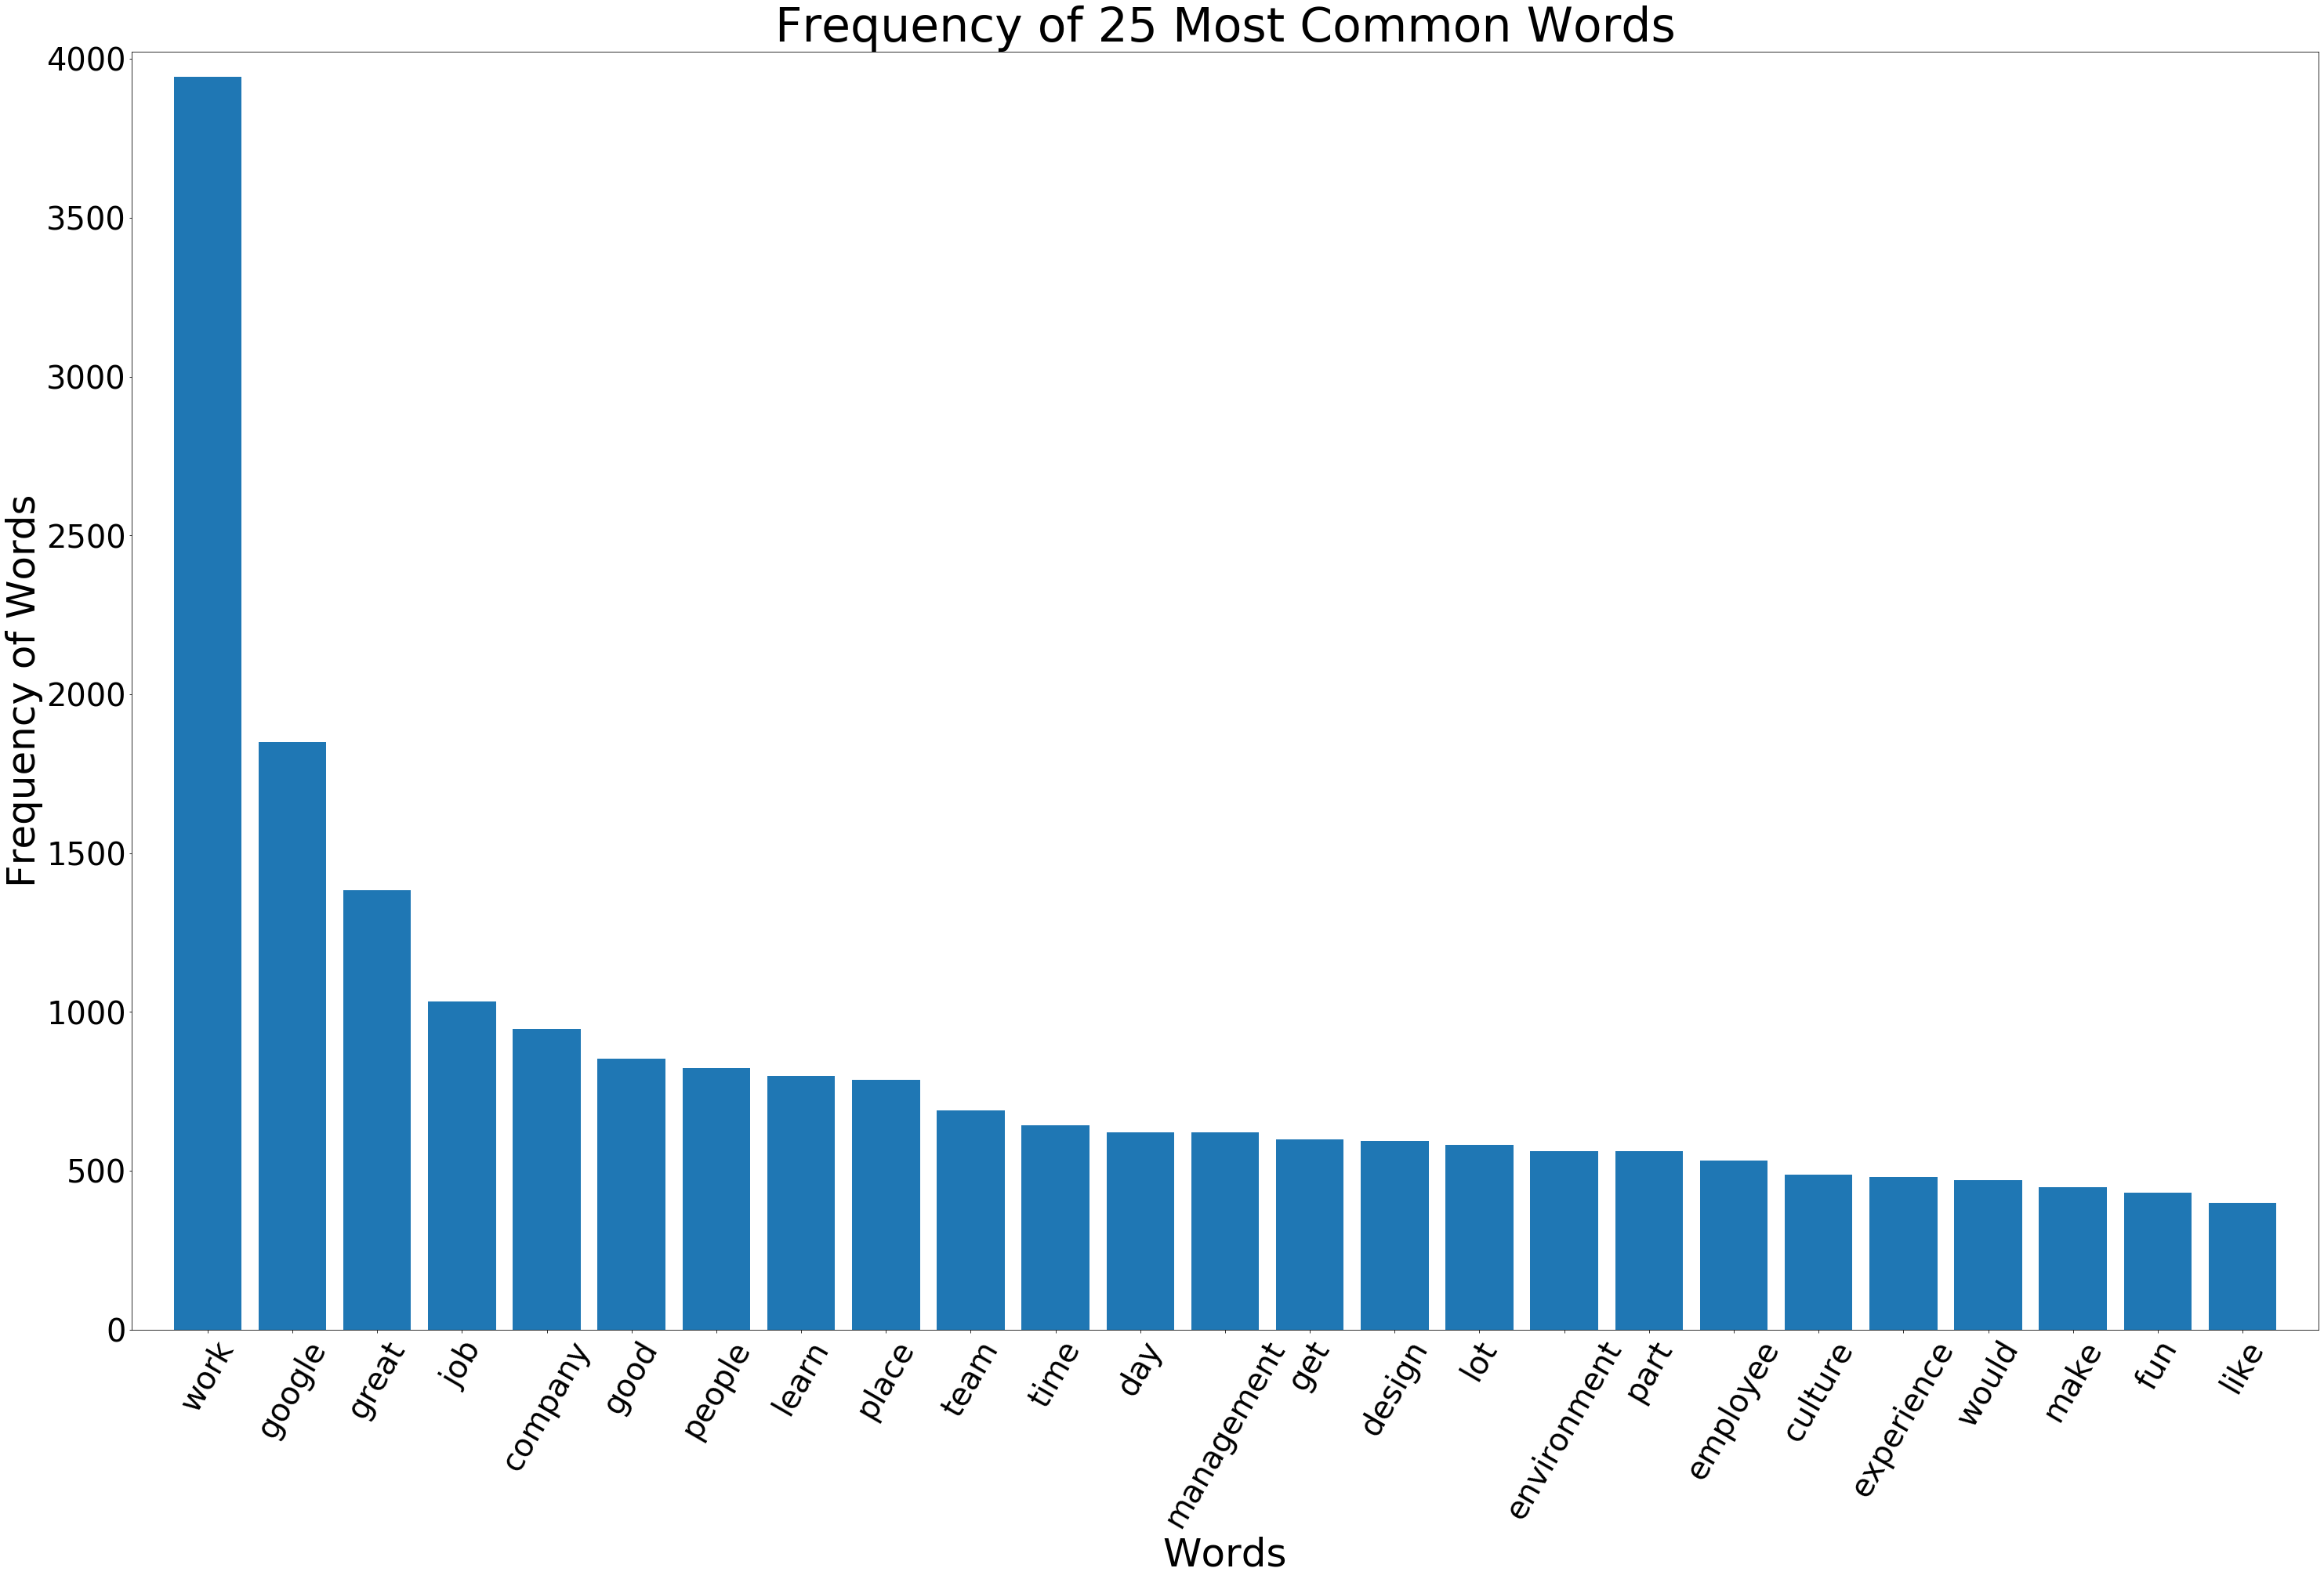

In [25]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
# create a figure
plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

In [26]:
group_by = df.groupby('rating')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by

rating
1    [(work, 76), (google, 46), (job, 28), (company, 26), (management, 24), (employee, 21), (people, ...
2    [(work, 83), (google, 52), (management, 45), (job, 38), (..., 33), (good, 30), (time, 25), (team...
3    [(work, 410), (google, 228), (job, 147), (good, 121), (great, 119), (people, 114), (company, 106...
4    [(work, 1047), (design, 558), (google, 462), (great, 358), (good, 292), (job, 285), (company, 24...
5    [(work, 2328), (google, 1062), (great, 878), (company, 547), (job, 534), (place, 475), (learn, 4...
Name: lemma_str, dtype: object

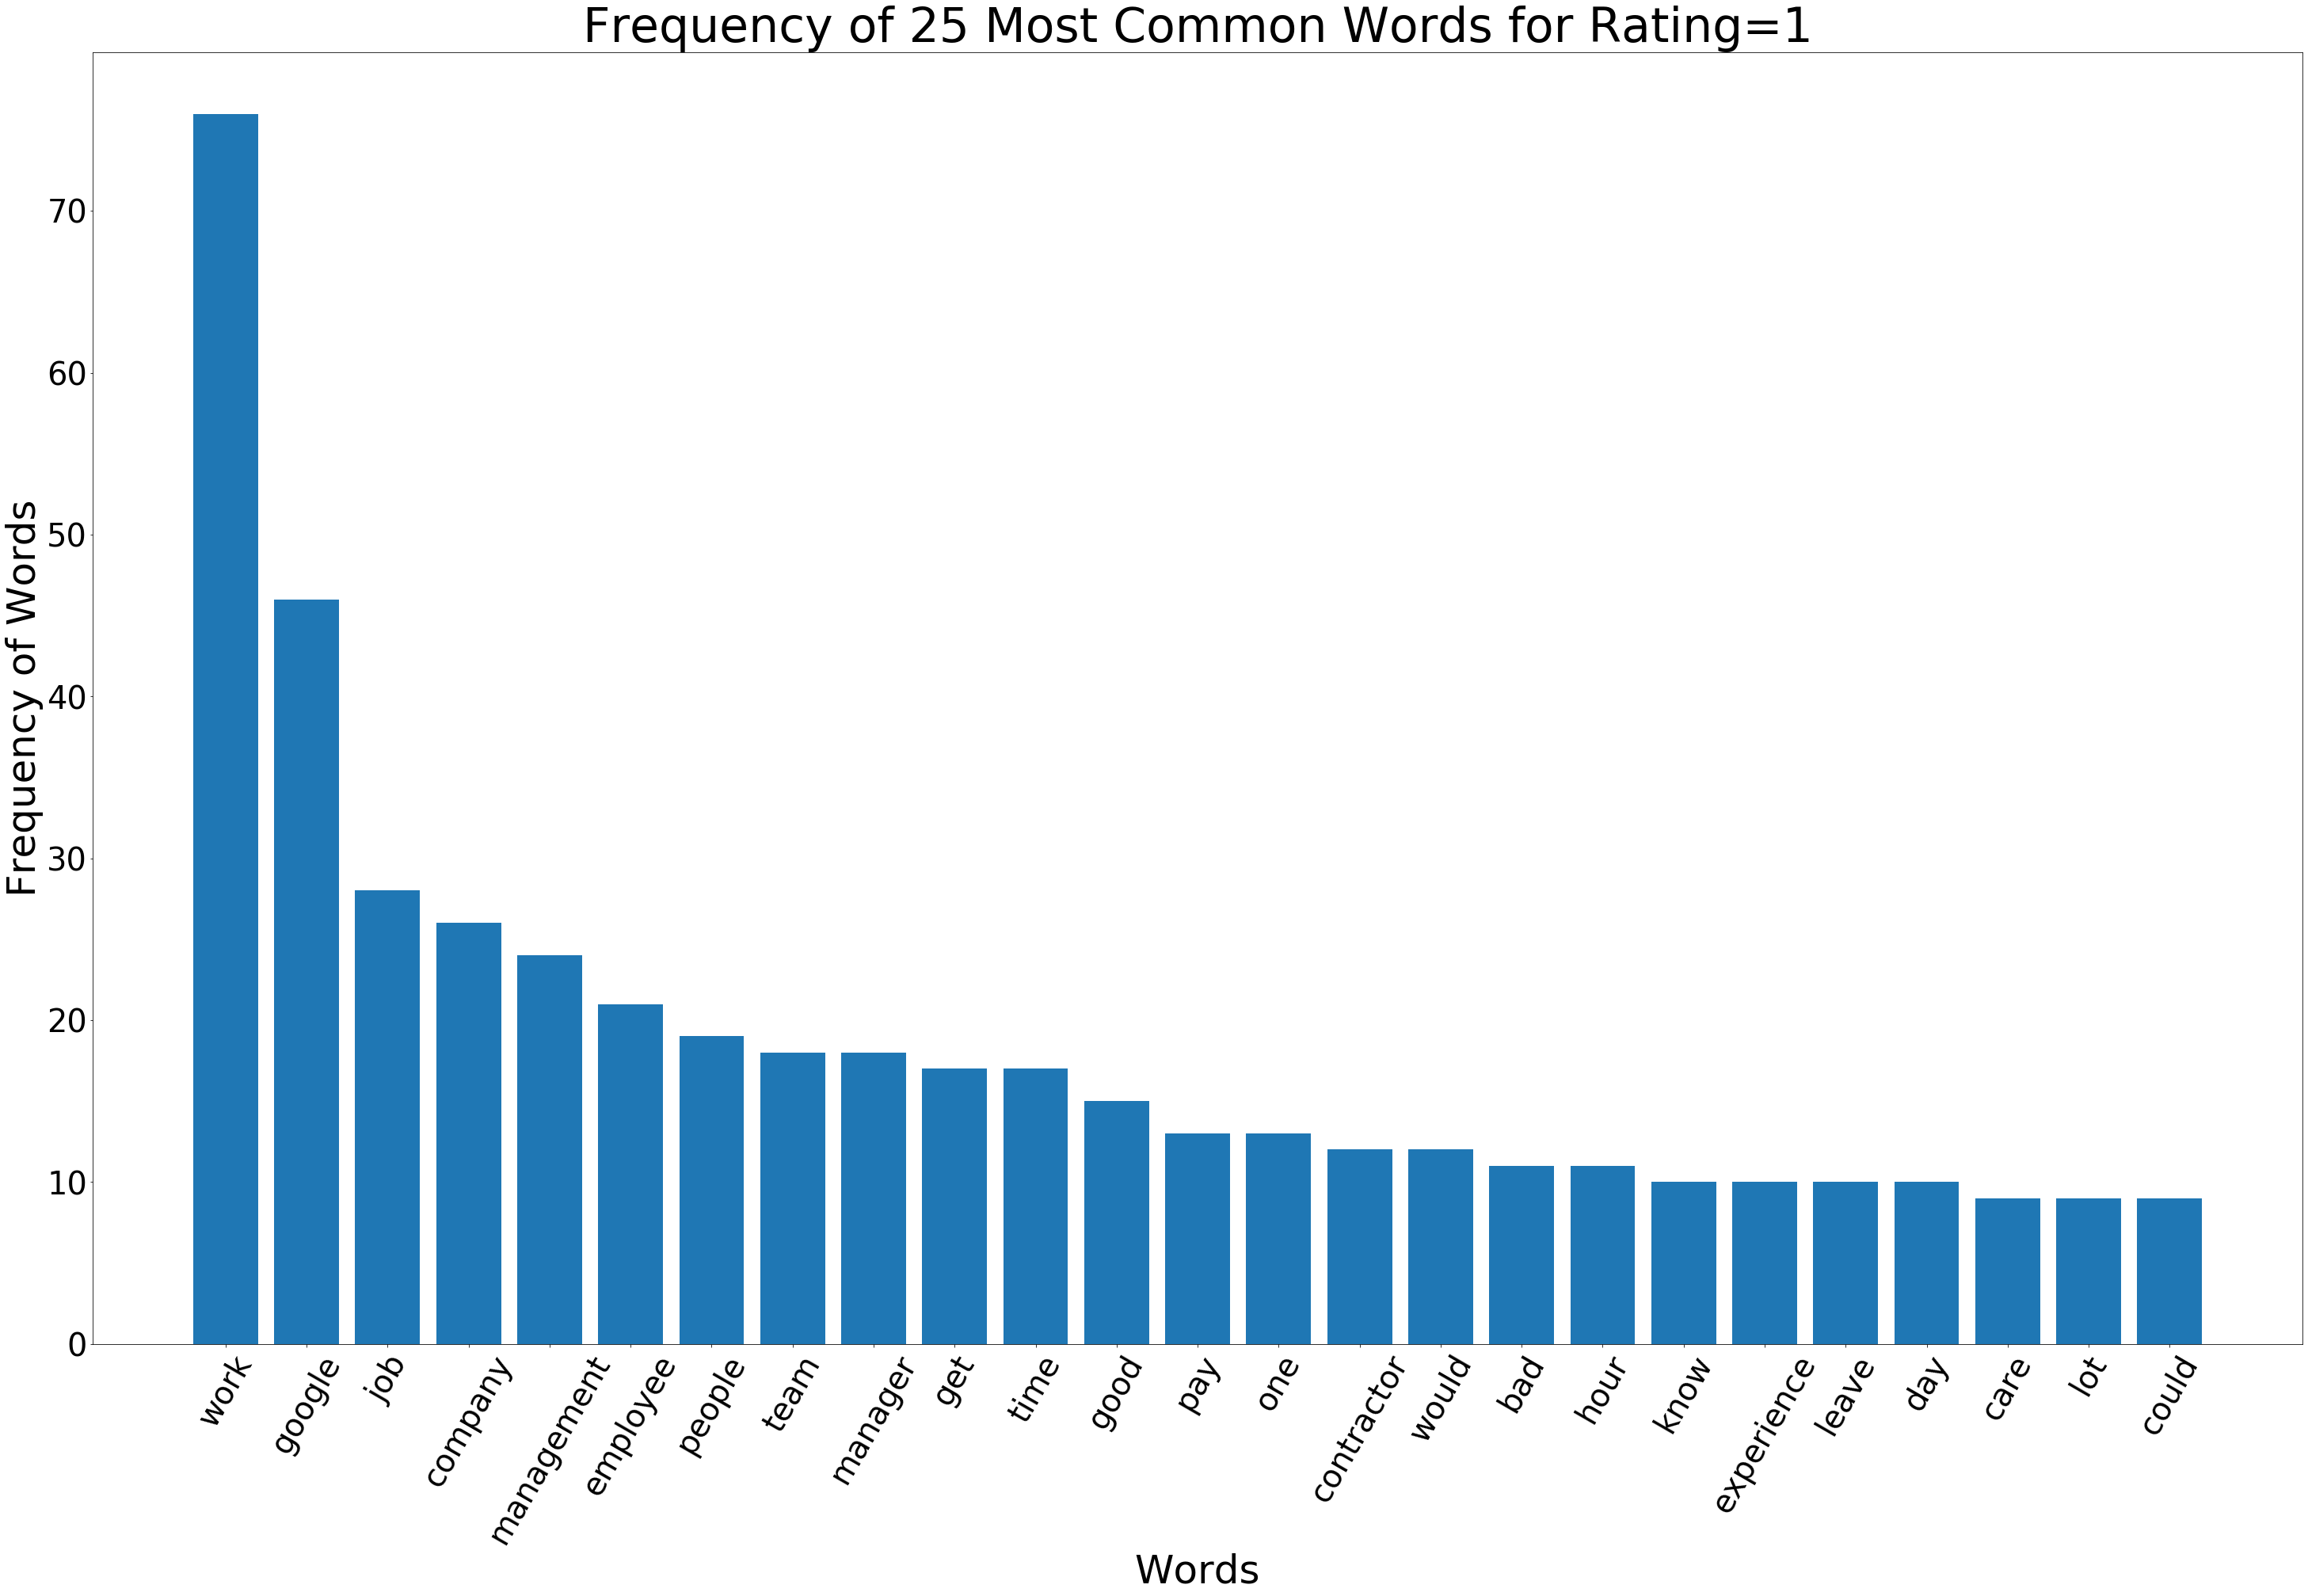

In [27]:
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]

plt.figure(figsize=(50,30))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=1', fontsize=60)
plt.show()

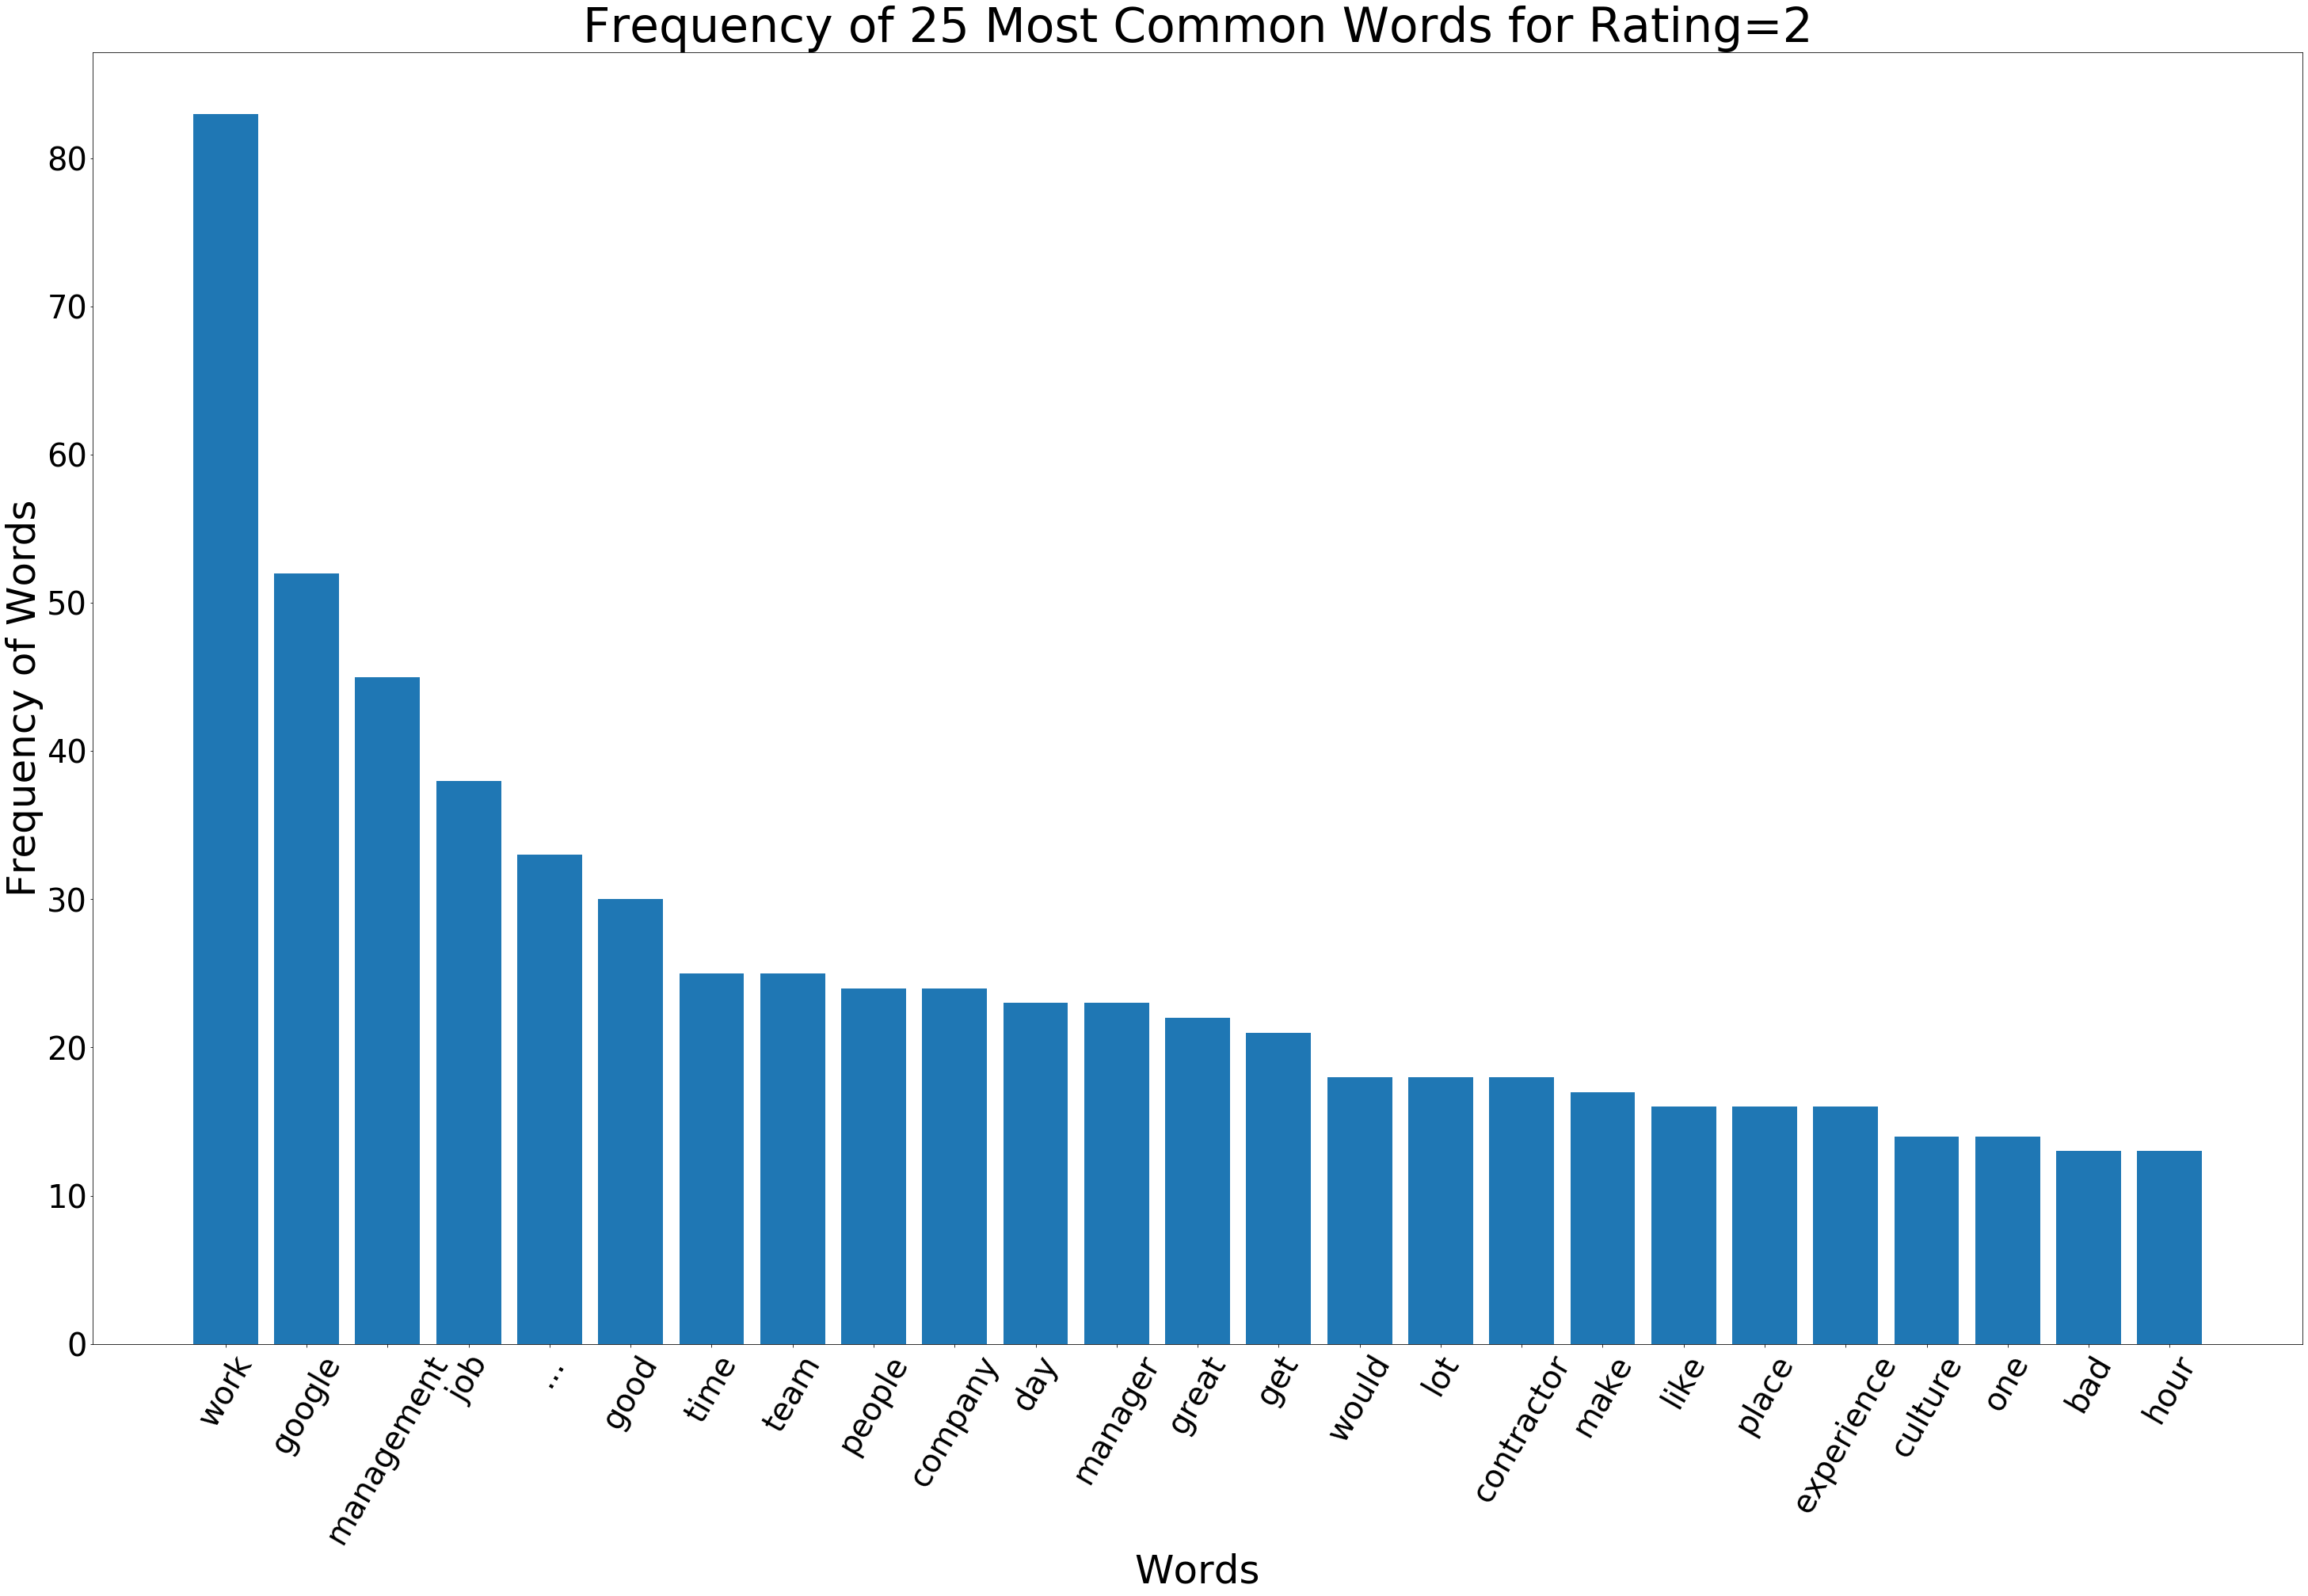

In [28]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=2', fontsize=60)
plt.show()

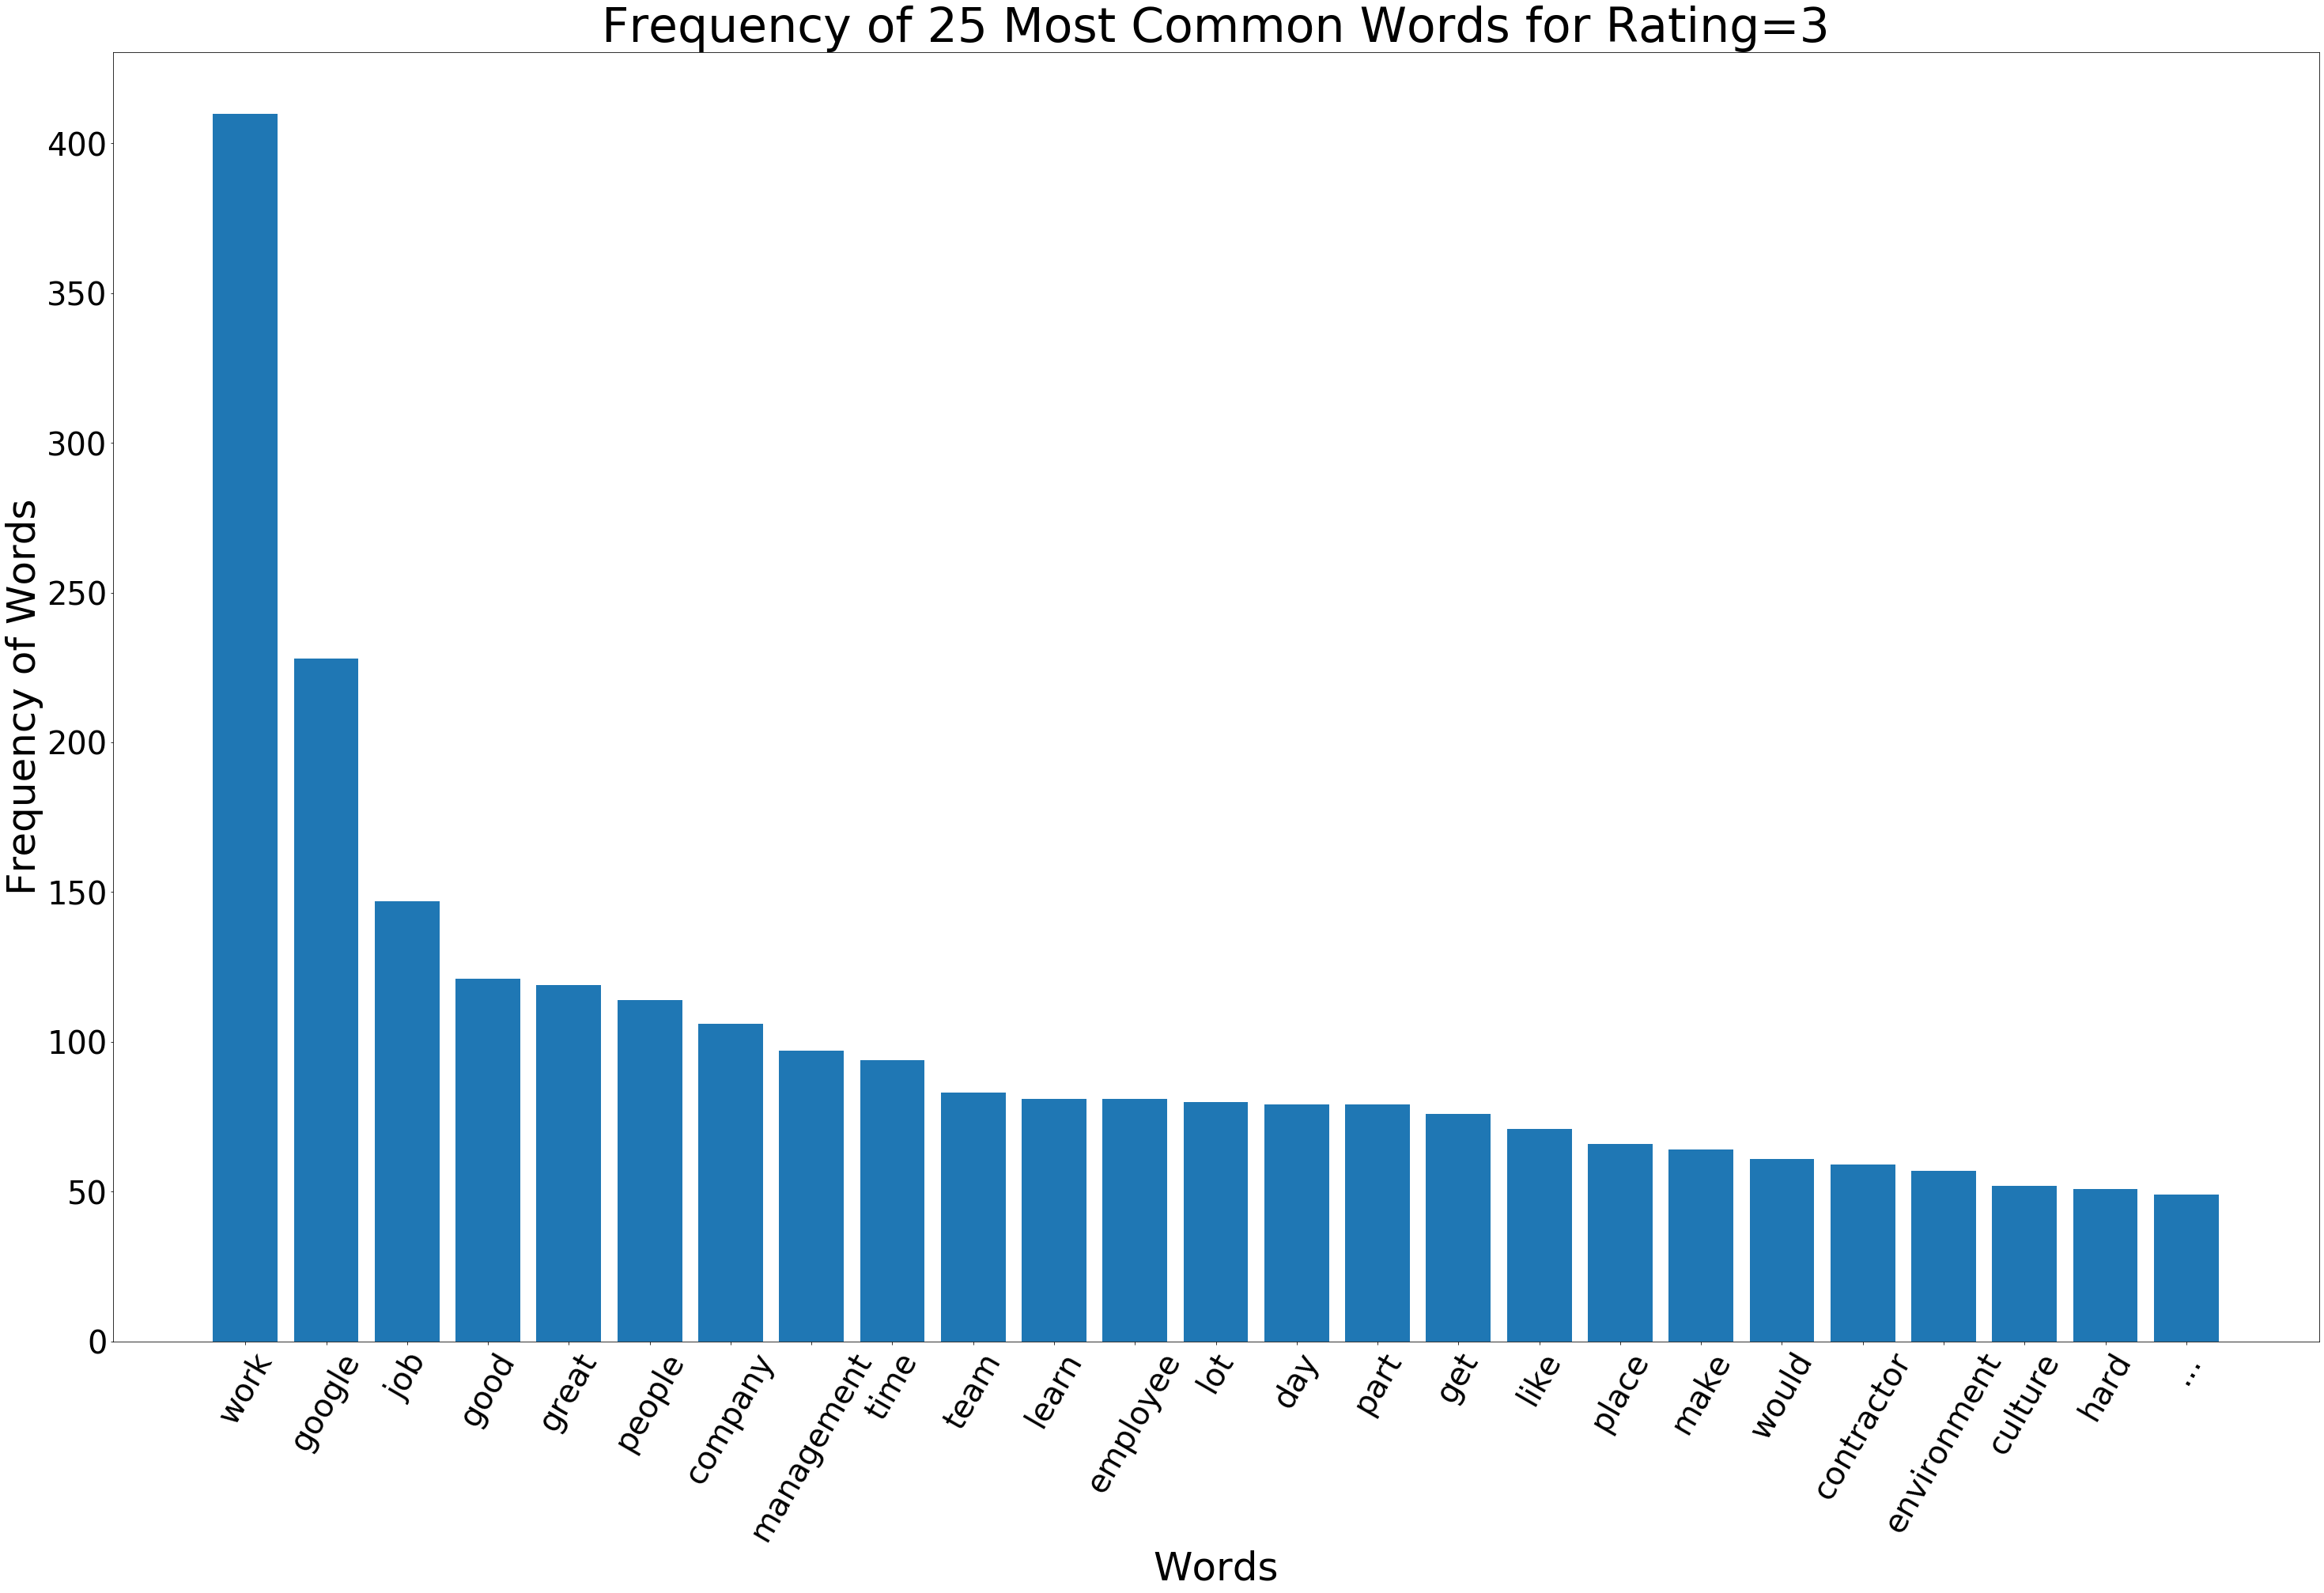

In [29]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))
plt.bar(words2, freq2)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=3', fontsize=60)
plt.show()

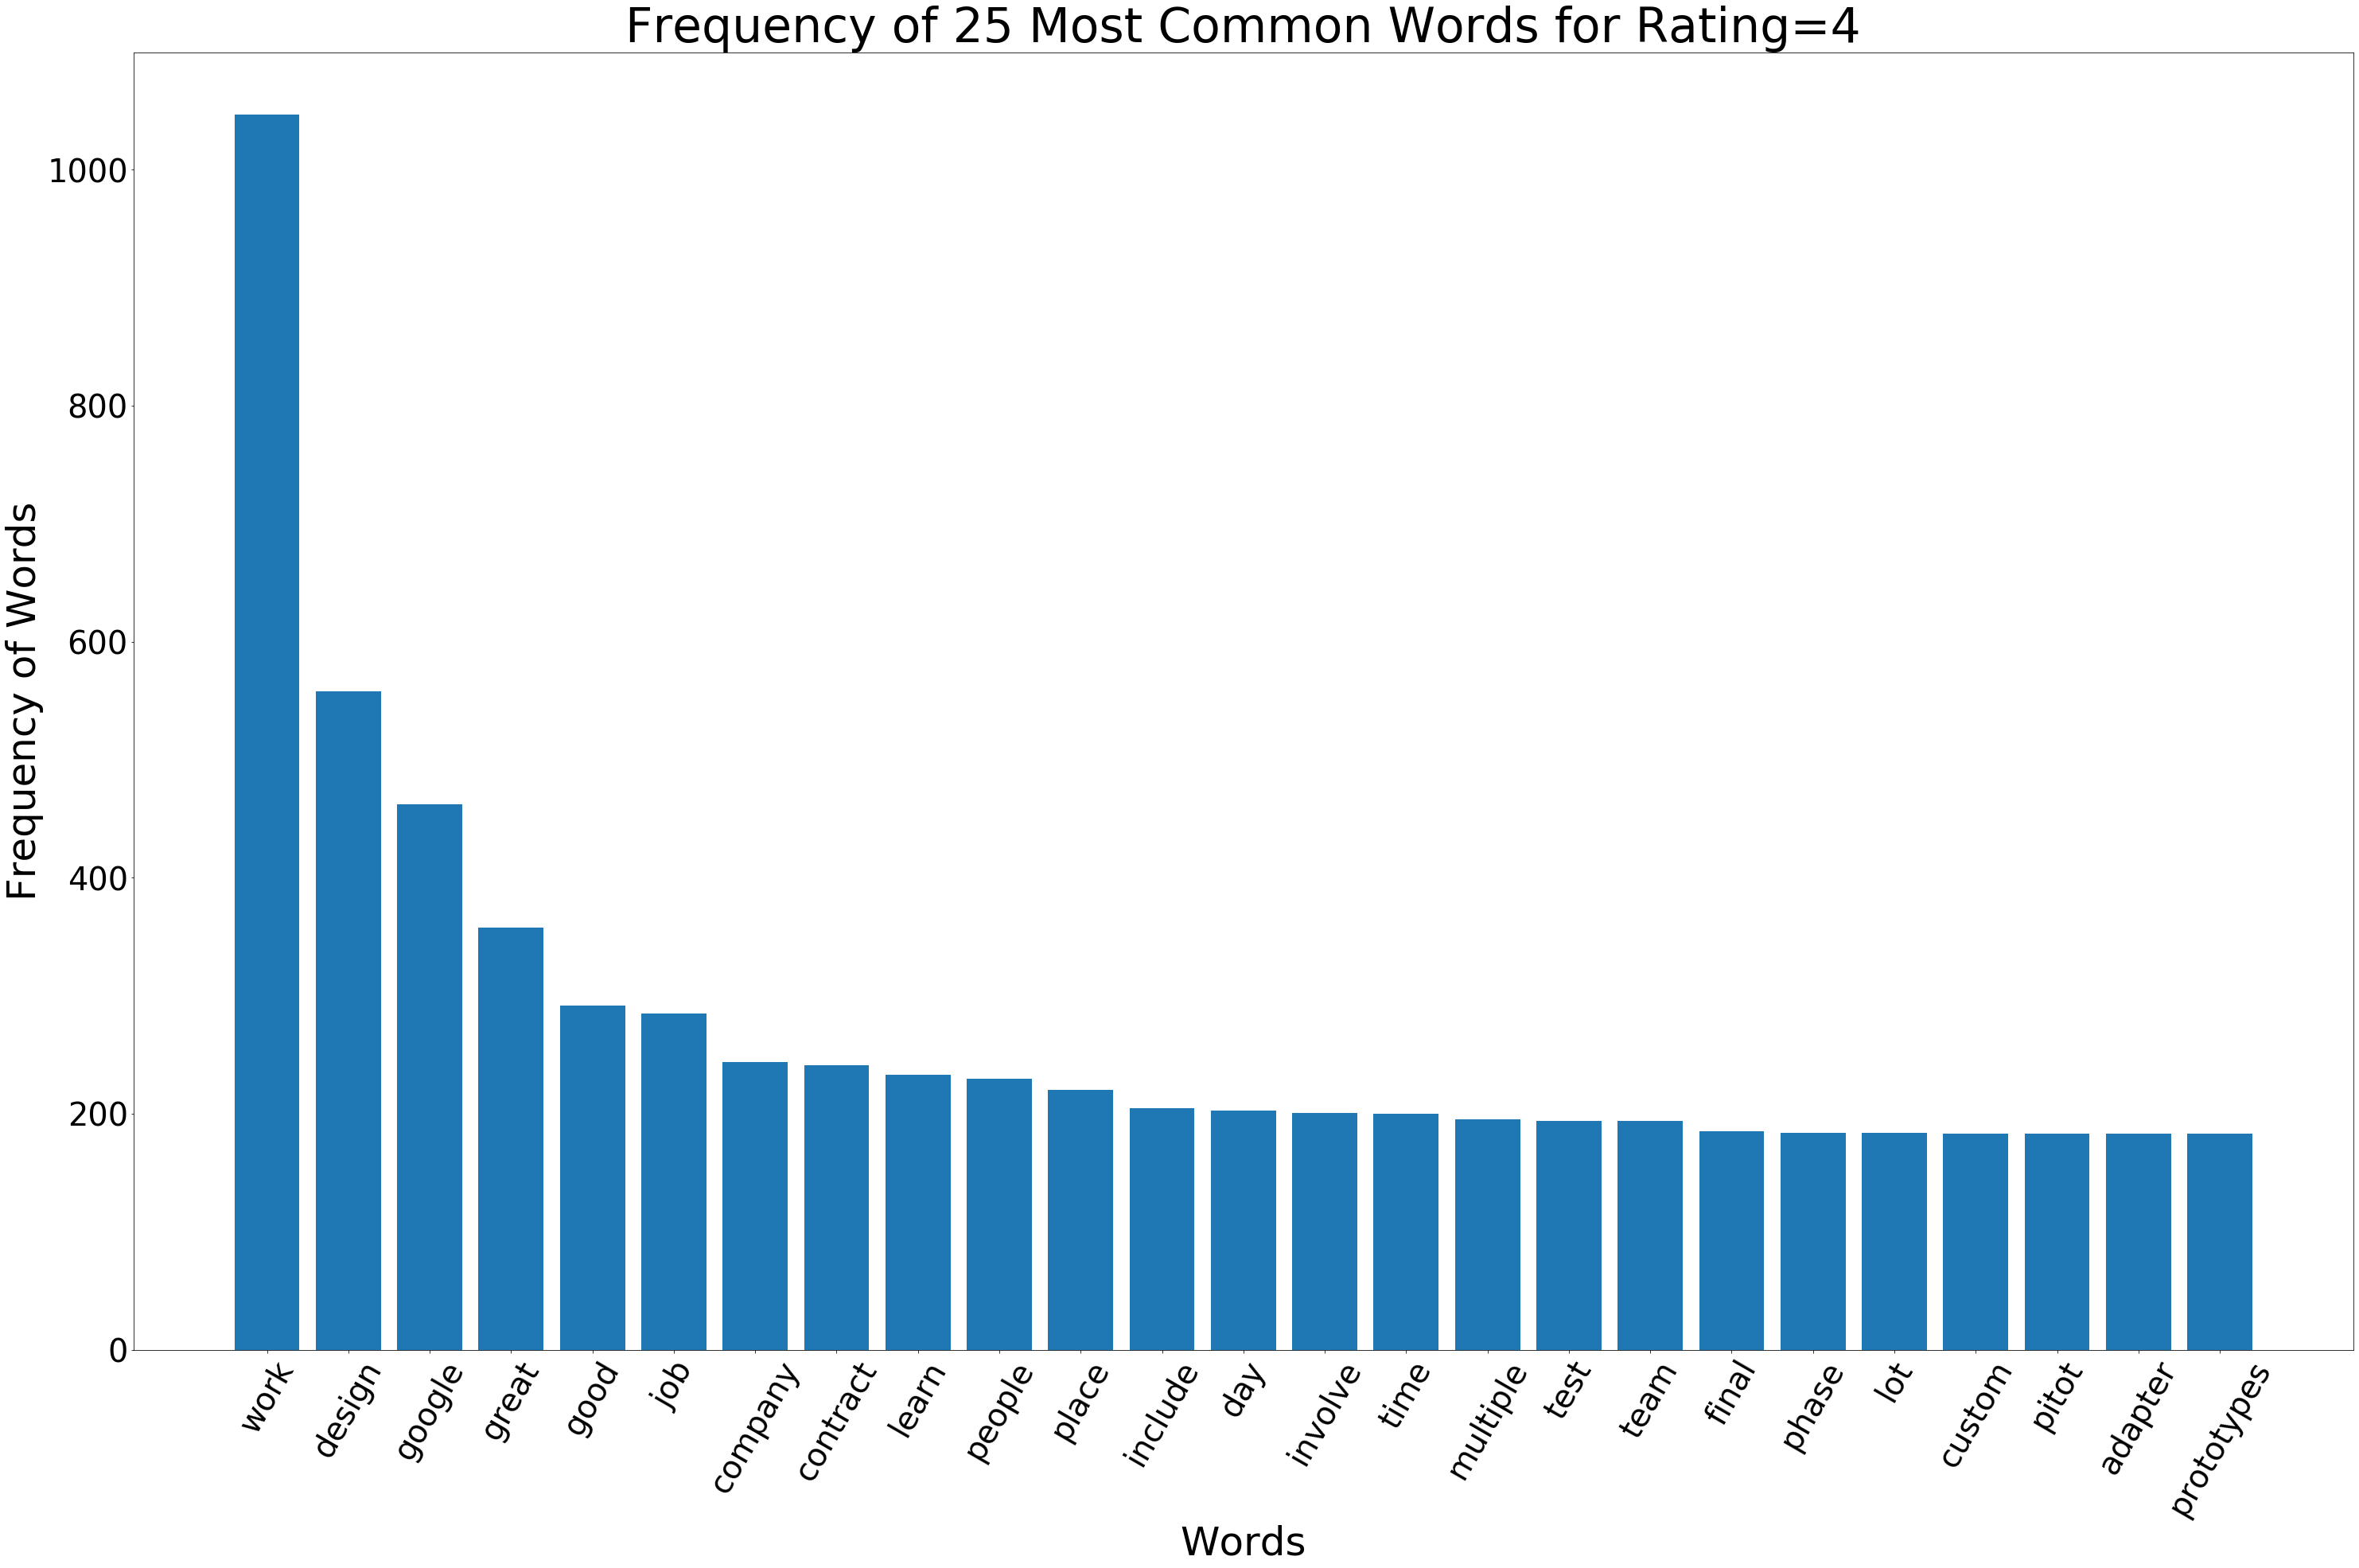

In [30]:
group_by_3 = group_by.iloc[3]
words3 = list(zip(*group_by_3))[0]
freq3 = list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))
plt.bar(words3, freq3)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=4', fontsize=60)
plt.show()

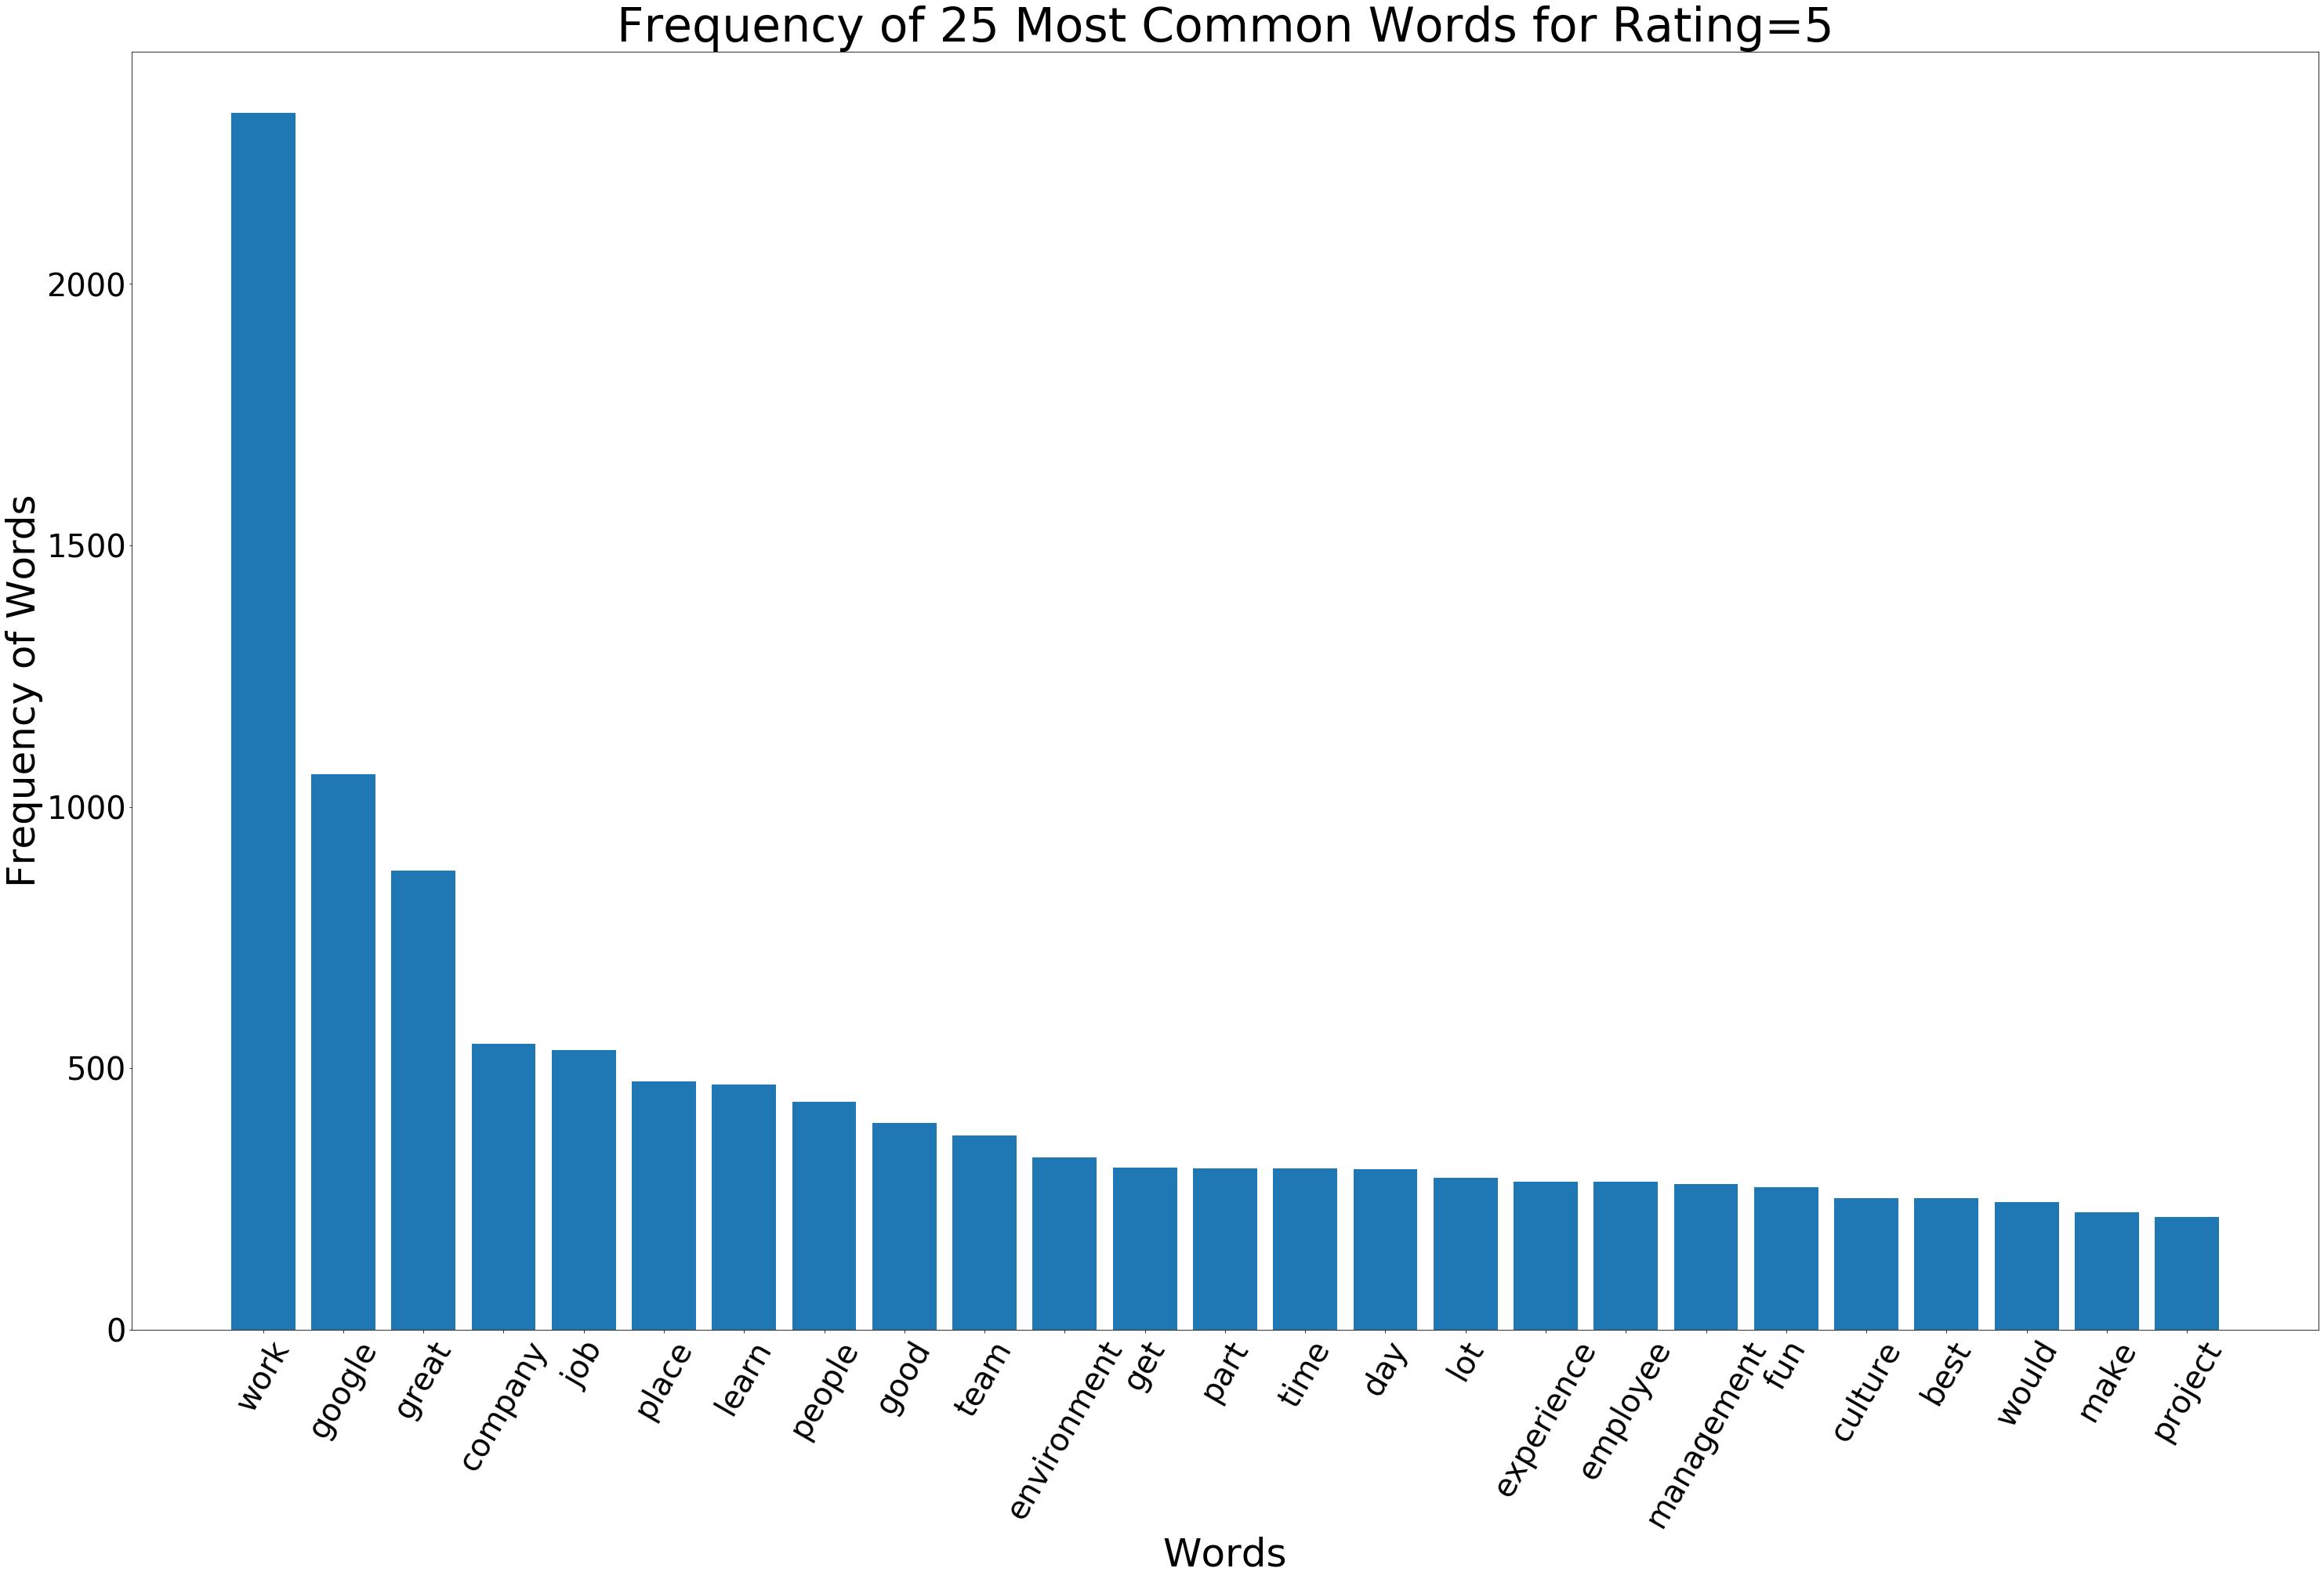

In [31]:
group_by_4 = group_by.iloc[4]
words4 = list(zip(*group_by_4))[0]
freq4 = list(zip(*group_by_4))[1]
plt.figure(figsize=(50,30))
plt.bar(words4, freq4)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words for Rating=5', fontsize=60)
plt.show()

In [ ]:
df

# Topic Modeling

In [32]:
# you have to feed strings into a countvec
# max_df=0.9 we will remove words which appear in more than 90% of the reviews
# min_df=25 we will remove words which appear in less than 25 reviews

# Creating the vectorizer object
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)

# apply the transformation to create the document term matrix
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()


In [ ]:
tf

In [33]:
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

10  ability  able  access  account  achieve  across  activity  actually  \
0      0        0     0       0        0        0       0         0         0   
1      0        0     0       0        0        0       1         0         0   
2      0        0     0       0        0        0       0         0         0   
3      0        0     0       0        0        0       0         0         0   
4      0        0     0       0        0        0       0         0         0   
...   ..      ...   ...     ...      ...      ...     ...       ...       ...   
3496   0        0     0       0        0        0       0         0         0   
3497   0        0     0       0        0        0       0         0         0   
3498   0        0     0       0        0        0       0         0         0   
3499   0        0     0       0        0        0       0         0         0   
3500   0        0     0       0        0        0       0         0         0   

      ad  ...  without  wonderful  work  worker  working  workplace  world  \
0      0  ...        0          0     0       0        0          0      0   
1      0  ...        0          0     0       0        0          0      0   
2      1  ...        0          0     2       0        0          0      0   
3      0  ...        0          0     2       0        0          0      0   
4      0  ...        0          0     0       0        0          0      0   
...   ..  ...      ...        ...   ...     ...      ...        ...    ...   
3496   0  ...        0          0     0       0        0          0      0   
3497   0  ...        0          0     1       0        0          0      0   
3498   0  ...        0          0     3       0        0          0      0   
3499   0  ...        0          0     1       0        0          0      0   
3500   0  ...        0          0     2       0        0          0      1   

      would  year  young  
0         0     0      0  
1         0     0      0  
2         0     0      0  
3         0     0      0  
4         0     0      0  
...     ...   ...    ...  
3496      0     0      0  
3497      1     0      0  
3498      0     0      0  
3499      0     1      0  
3500      0     0      0  

[3501 rows x 524 columns]

In [34]:
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', max_iter=500, random_state=0).fit(tf)

In [ ]:
print(lda_model)

In [35]:
no_top_words = 10

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
design test involve multiple include contract five final phase individually
Topic 1:
work great good place people environment lot company google life
Topic 2:
free hour lunch schedule able though allow understand phone meeting
Topic 3:
learn new worker co management team help work business skill
Topic 4:
work day part job hard different enjoyable team typical time
Topic 5:
work google best get company job one place team people
Topic 6:
take would employee care go keep people felt others make
Topic 7:
google work company job employee time contractor like great pay
Topic 8:
google customer product service sale provide call improve market program
Topic 9:
make would position project end back time quality role management


In [ ]:
#pyLDAvis.enable_notebook()
#panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
#panel

# NMF with tf-idf

In [36]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df =25, max_features=5000, use_idf=True)

In [37]:
tfidf = tfidf_vectorizer.fit_transform(df['lemma_str'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [38]:
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))
doc_term_matrix_tfidf

10  ability  able  access  account  achieve    across  activity  \
0     0.0      0.0   0.0     0.0      0.0      0.0  0.000000       0.0   
1     0.0      0.0   0.0     0.0      0.0      0.0  0.381772       0.0   
2     0.0      0.0   0.0     0.0      0.0      0.0  0.000000       0.0   
3     0.0      0.0   0.0     0.0      0.0      0.0  0.000000       0.0   
4     0.0      0.0   0.0     0.0      0.0      0.0  0.000000       0.0   
...   ...      ...   ...     ...      ...      ...       ...       ...   
3496  0.0      0.0   0.0     0.0      0.0      0.0  0.000000       0.0   
3497  0.0      0.0   0.0     0.0      0.0      0.0  0.000000       0.0   
3498  0.0      0.0   0.0     0.0      0.0      0.0  0.000000       0.0   
3499  0.0      0.0   0.0     0.0      0.0      0.0  0.000000       0.0   
3500  0.0      0.0   0.0     0.0      0.0      0.0  0.000000       0.0   

      actually        ad  ...  without  wonderful      work  worker  working  \
0          0.0  0.000000  ...      0.0        0.0  0.000000     0.0      0.0   
1          0.0  0.000000  ...      0.0        0.0  0.000000     0.0      0.0   
2          0.0  0.417416  ...      0.0        0.0  0.220071     0.0      0.0   
3          0.0  0.000000  ...      0.0        0.0  0.134072     0.0      0.0   
4          0.0  0.000000  ...      0.0        0.0  0.000000     0.0      0.0   
...        ...       ...  ...      ...        ...       ...     ...      ...   
3496       0.0  0.000000  ...      0.0        0.0  0.000000     0.0      0.0   
3497       0.0  0.000000  ...      0.0        0.0  0.103791     0.0      0.0   
3498       0.0  0.000000  ...      0.0        0.0  0.299850     0.0      0.0   
3499       0.0  0.000000  ...      0.0        0.0  0.129062     0.0      0.0   
3500       0.0  0.000000  ...      0.0        0.0  0.115342     0.0      0.0   

      workplace     world     would      year  young  
0           0.0  0.000000  0.000000  0.000000    0.0  
1           0.0  0.000000  0.000000  0.000000    0.0  
2           0.0  0.000000  0.000000  0.000000    0.0  
3           0.0  0.000000  0.000000  0.000000    0.0  
4           0.0  0.000000  0.000000  0.000000    0.0  
...         ...       ...       ...       ...    ...  
3496        0.0  0.000000  0.000000  0.000000    0.0  
3497        0.0  0.000000  0.234087  0.000000    0.0  
3498        0.0  0.000000  0.000000  0.000000    0.0  
3499        0.0  0.000000  0.000000  0.378761    0.0  
3500        0.0  0.174578  0.000000  0.000000    0.0  

[3501 rows x 524 columns]

In [39]:
nmf = NMF(n_components=10, random_state=0, alpha=.1, init='nndsvd').fit(tfidf)

In [40]:
display_topics(nmf, tfidf_feature_names, no_top_words) 

Topic 0:
work place fun environment life balance best friendly love enjoy
Topic 1:
design pitot prototypes adjustable port adapter phase individually custom final
Topic 2:
job part day hard enjoyable worker co typical work management
Topic 3:
good management environment culture food friendly salary experience life facility
Topic 4:
google experience work provide one would really know want love
Topic 5:
great people experience culture benefit perk food environment opportunity overall
Topic 6:
learn lot new thing opportunity many skill grow people technology
Topic 7:
company best work like amaze one big world employee culture
Topic 8:
employee time contractor get full free like would make pay
Topic 9:
team project management manager help customer manage process lead use


In [41]:
nmf_topic_values = nmf.transform(tfidf)
df['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
df['lda_topics'] = lda_topic_values.argmax(axis=1)

In [ ]:
df

In [42]:
lda_remap = {0: 'Good Design Processes', 1: 'Great Work Environment', 2: 'Flexible Work Hours', 3: 'Skill Building', 4: 'Difficult but Enjoyable Work', 
             5: 'Great Company/Job', 6: 'Care about Employees', 7: 'Great Contractor Pay', 8: 'Customer Service', 9: 'Unknown1'}

df['lda_topics'] = df['lda_topics'].map(lda_remap)

In [43]:
nmf_remap = {0: 'Fun Work Culture', 1: 'Design Process', 2: 'Enjoyable Job', 3: 'Difficult but Enjoyable Work', 
             4: 'Great Experience', 5: 'Perks', 6: 'Learning Opportunities', 7: 'Great Company/Job', 
             8: 'Contractor Employee Experience', 9: 'Management'}

df['nmf_topics'] = df['nmf_topics'].map(nmf_remap)

In [58]:
df.head()

rating  \
0       4   
1       5   
2       5   
4       5   
5       5   

                                                                                            lemmatized  \
0  [contract, design, custom, pitot, test, adapter, involve, multiple, design, phase, prototypes, f...   
1  [lot, support, collaboration, across, many, engage, project, give, opportunity, grow, idea, resp...   
2  [work, responsibility, culture, great, hard, part, job, hectic, management, good, google, ad, le...   
4  [amaze, work, environment, everyone, smart, friendly, learn, lot, great, coworkers, amaze, manag...   
5  [productive, innovative, culture, environment, foster, creativity, limit, potential, positive, t...   

                                                                                             lemma_str  \
0  contract design custom pitot test adapter involve multiple design phase prototypes final design ...   
1  lot support collaboration across many engage project give opportunity grow idea respect addition...   
2  work responsibility culture great hard part job hectic management good google ad learn environme...   
4  amaze work environment everyone smart friendly learn lot great coworkers amaze manager director ...   
5  productive innovative culture environment foster creativity limit potential positive topic wish ...   

   sentiment  review_len  word_count              nmf_topics  \
0   0.000000         137          18          Design Process   
1   0.675000         113          15  Learning Opportunities   
2   0.260417         115          17           Enjoyable Job   
4   0.284184         192          27                   Perks   
5   0.181818         144          18       Great Company/Job   

                     lda_topics  
0         Good Design Processes  
1                Skill Building  
2  Difficult but Enjoyable Work  
4        Great Work Environment  
5                Skill Building

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text xticklabel objects>)

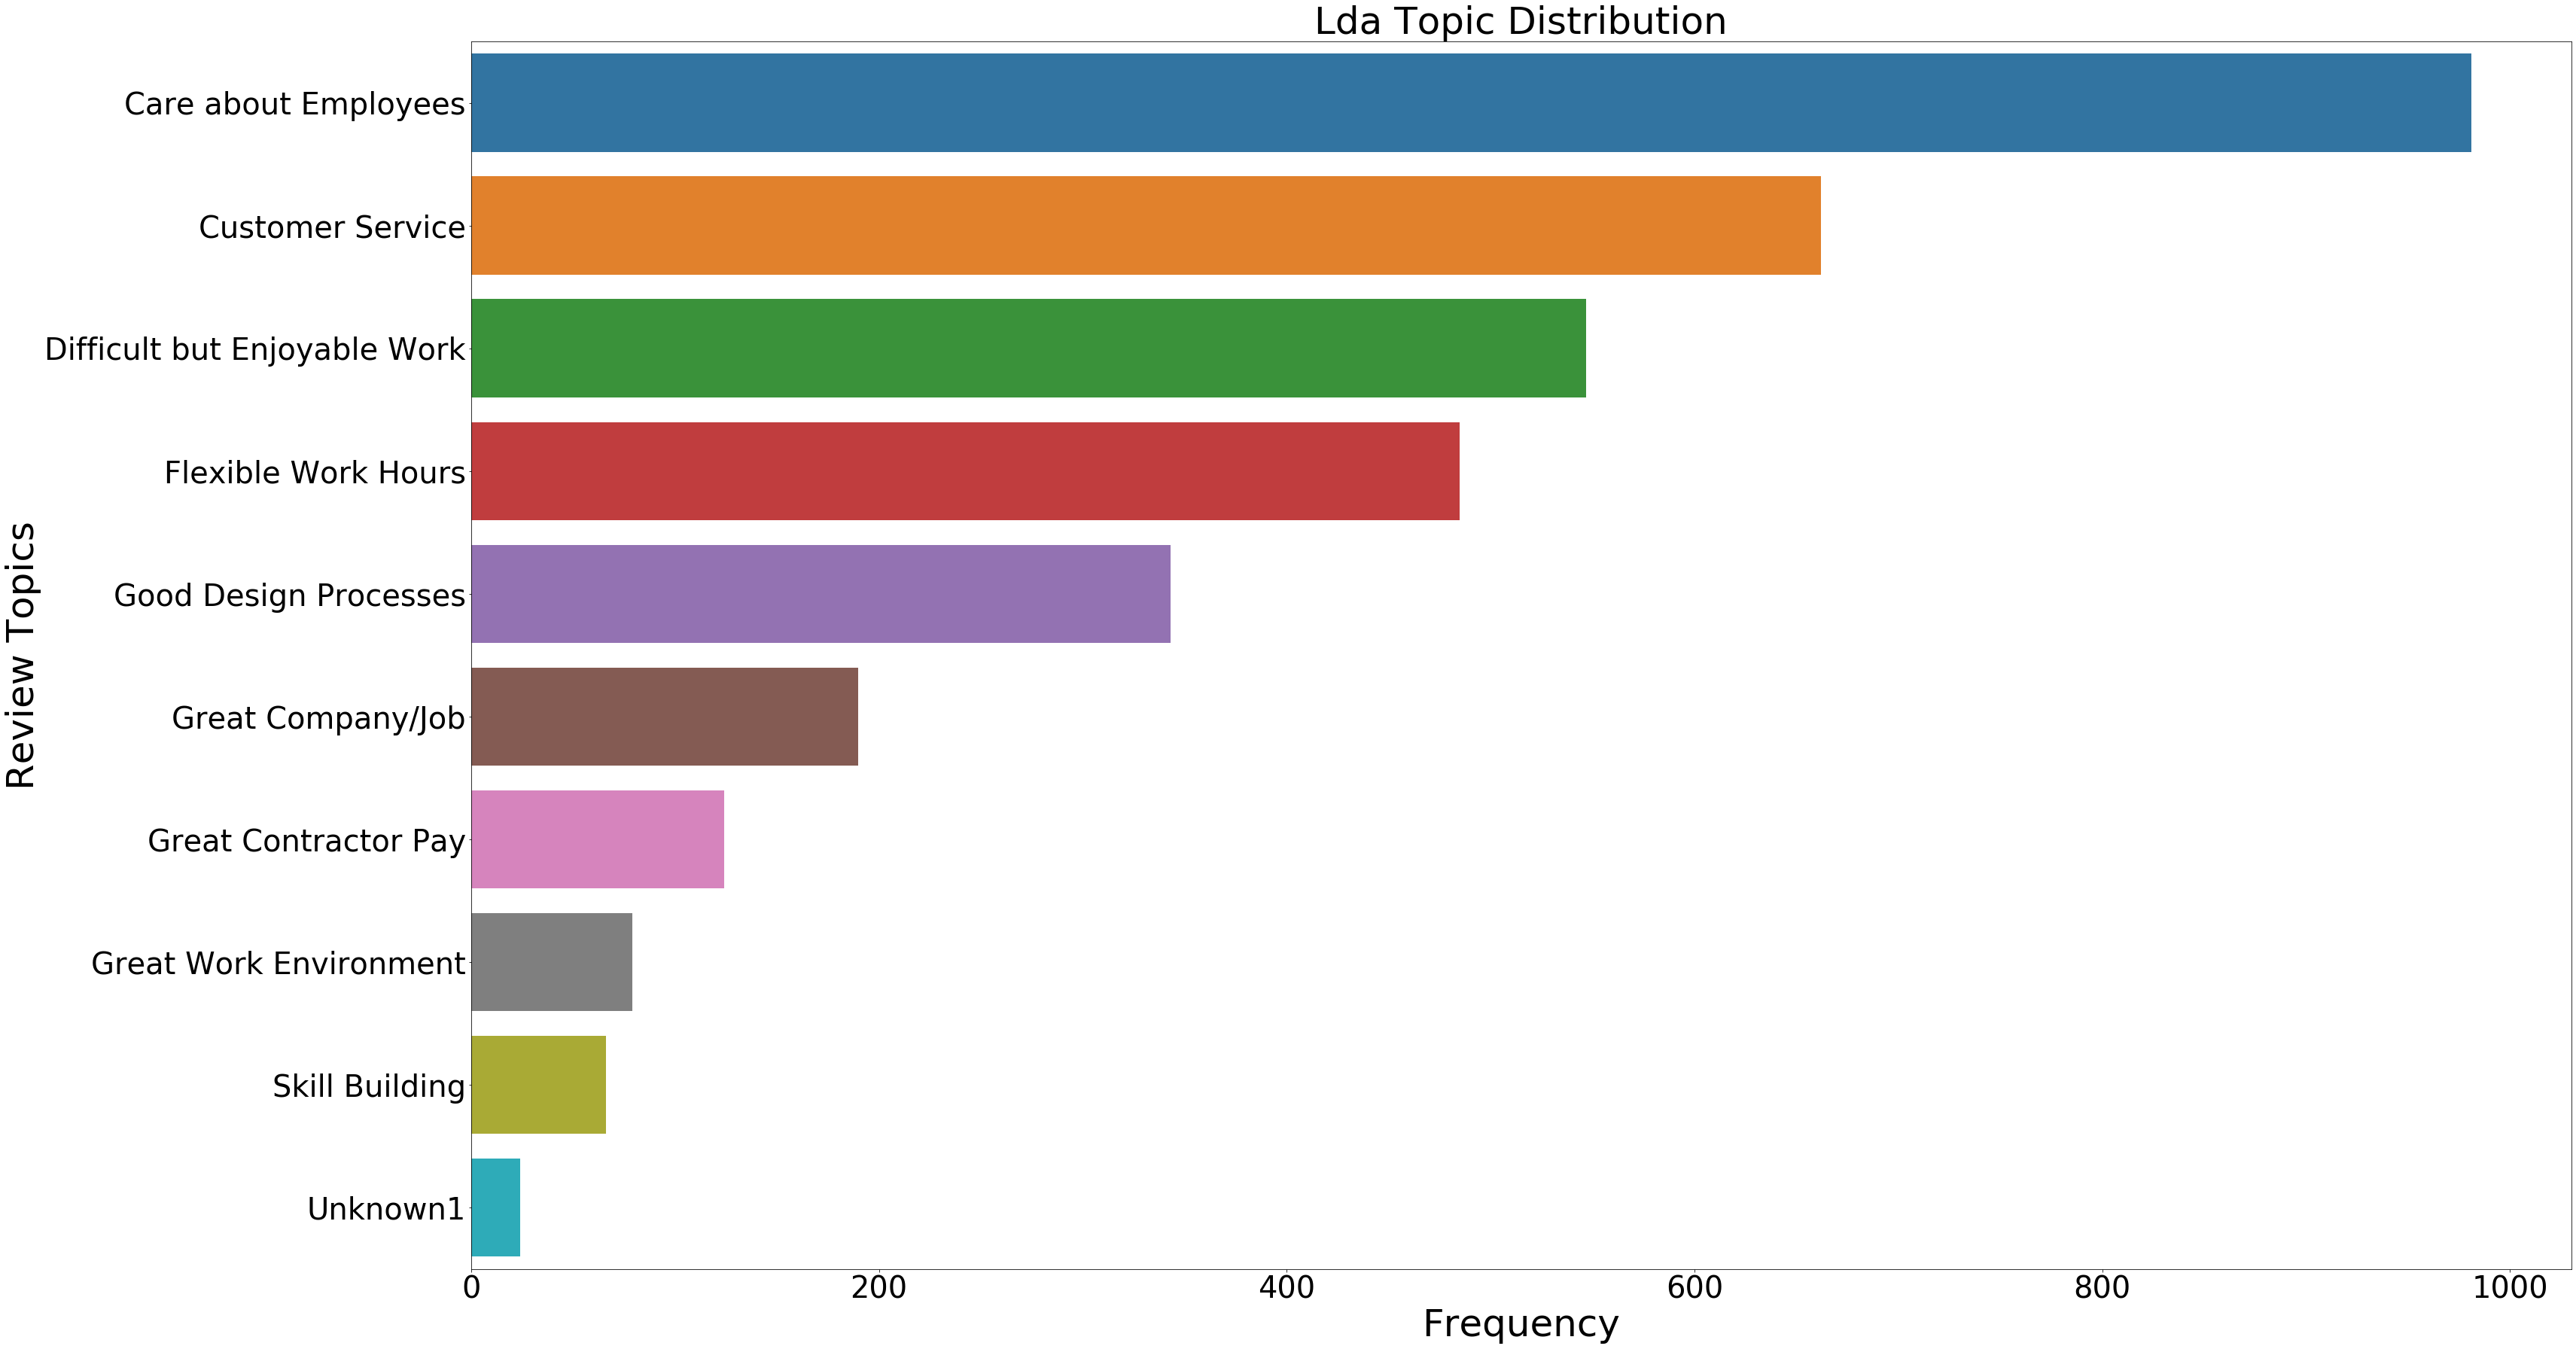

In [53]:
lda_x = df['lda_topics'].value_counts()
lda_y = lda_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(lda_x, lda_y.index)
plt.title("Lda Topic Distribution", fontsize=50)
plt.ylabel('Review Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

In [ ]:
df_low_ratings = df.loc[(df['rating']==1) | (df['rating']==2)]
df_high_ratings = df.loc[(df['rating']==4) | (df['rating']==5)]

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 <a list of 7 Text xticklabel objects>)

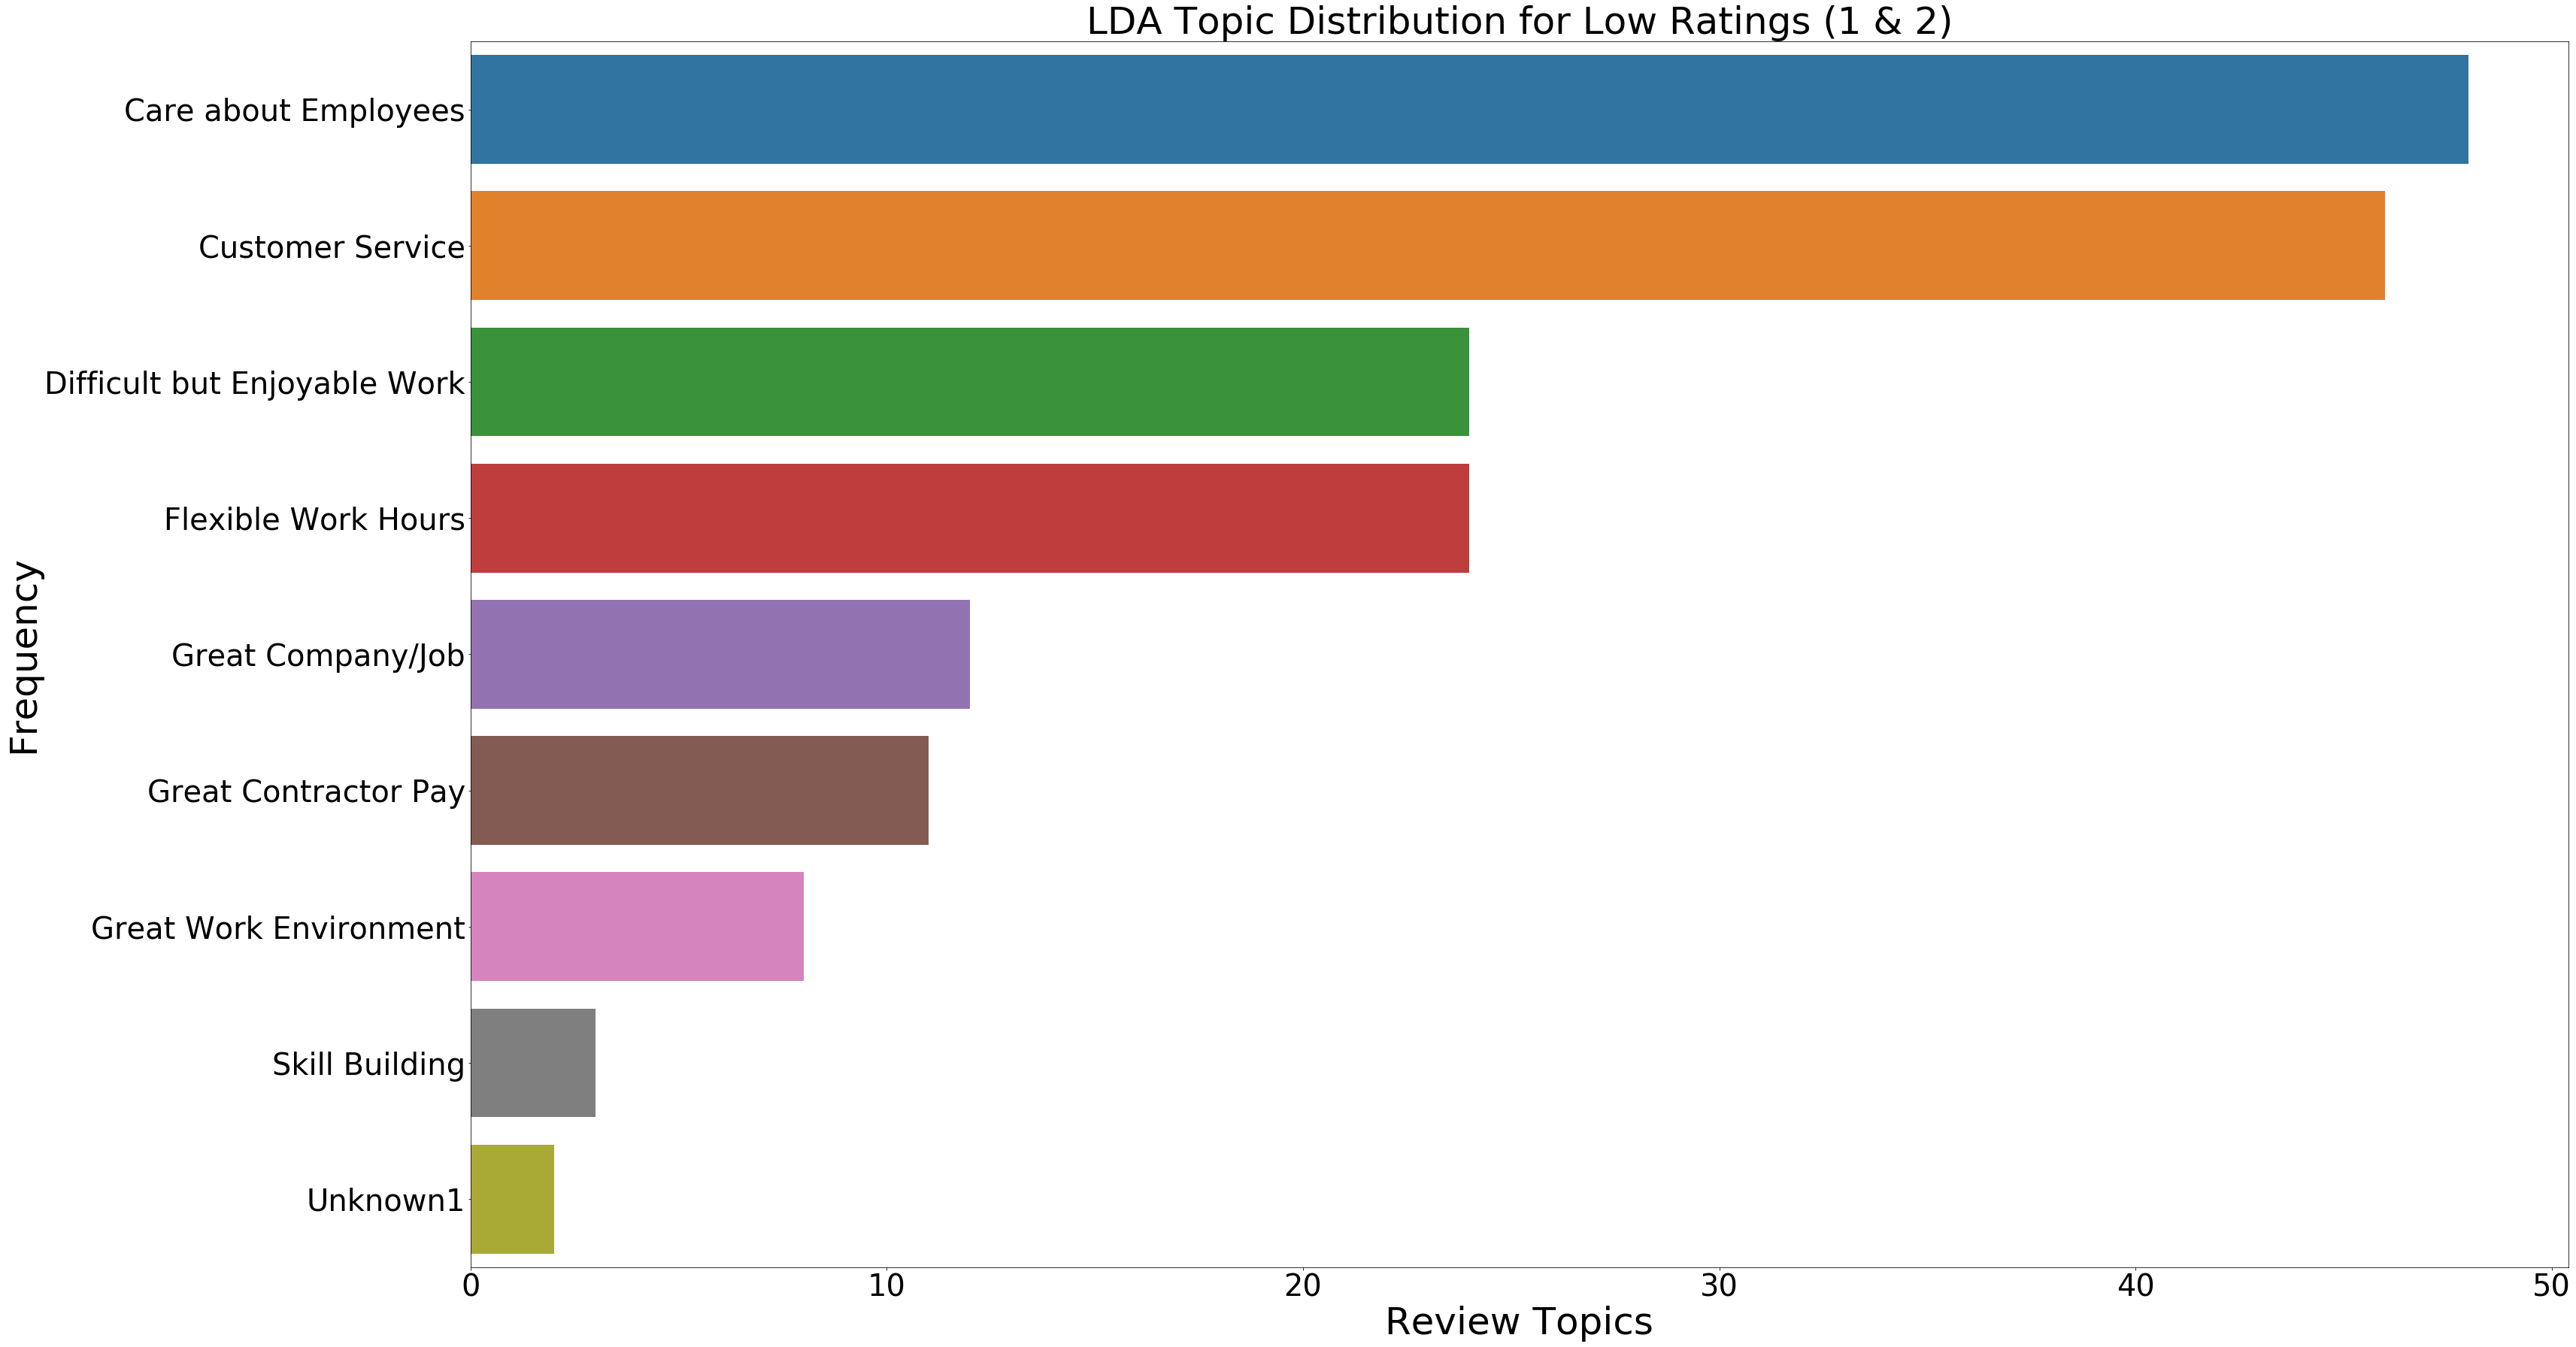

In [54]:
lda_low_x = df_low_ratings['lda_topics'].value_counts()
lda_low_y = lda_low_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(lda_low_x, lda_low_y.index)
plt.title("LDA Topic Distribution for Low Ratings (1 & 2)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)

(array([   0.,  200.,  400.,  600.,  800., 1000.]),
 <a list of 6 Text xticklabel objects>)

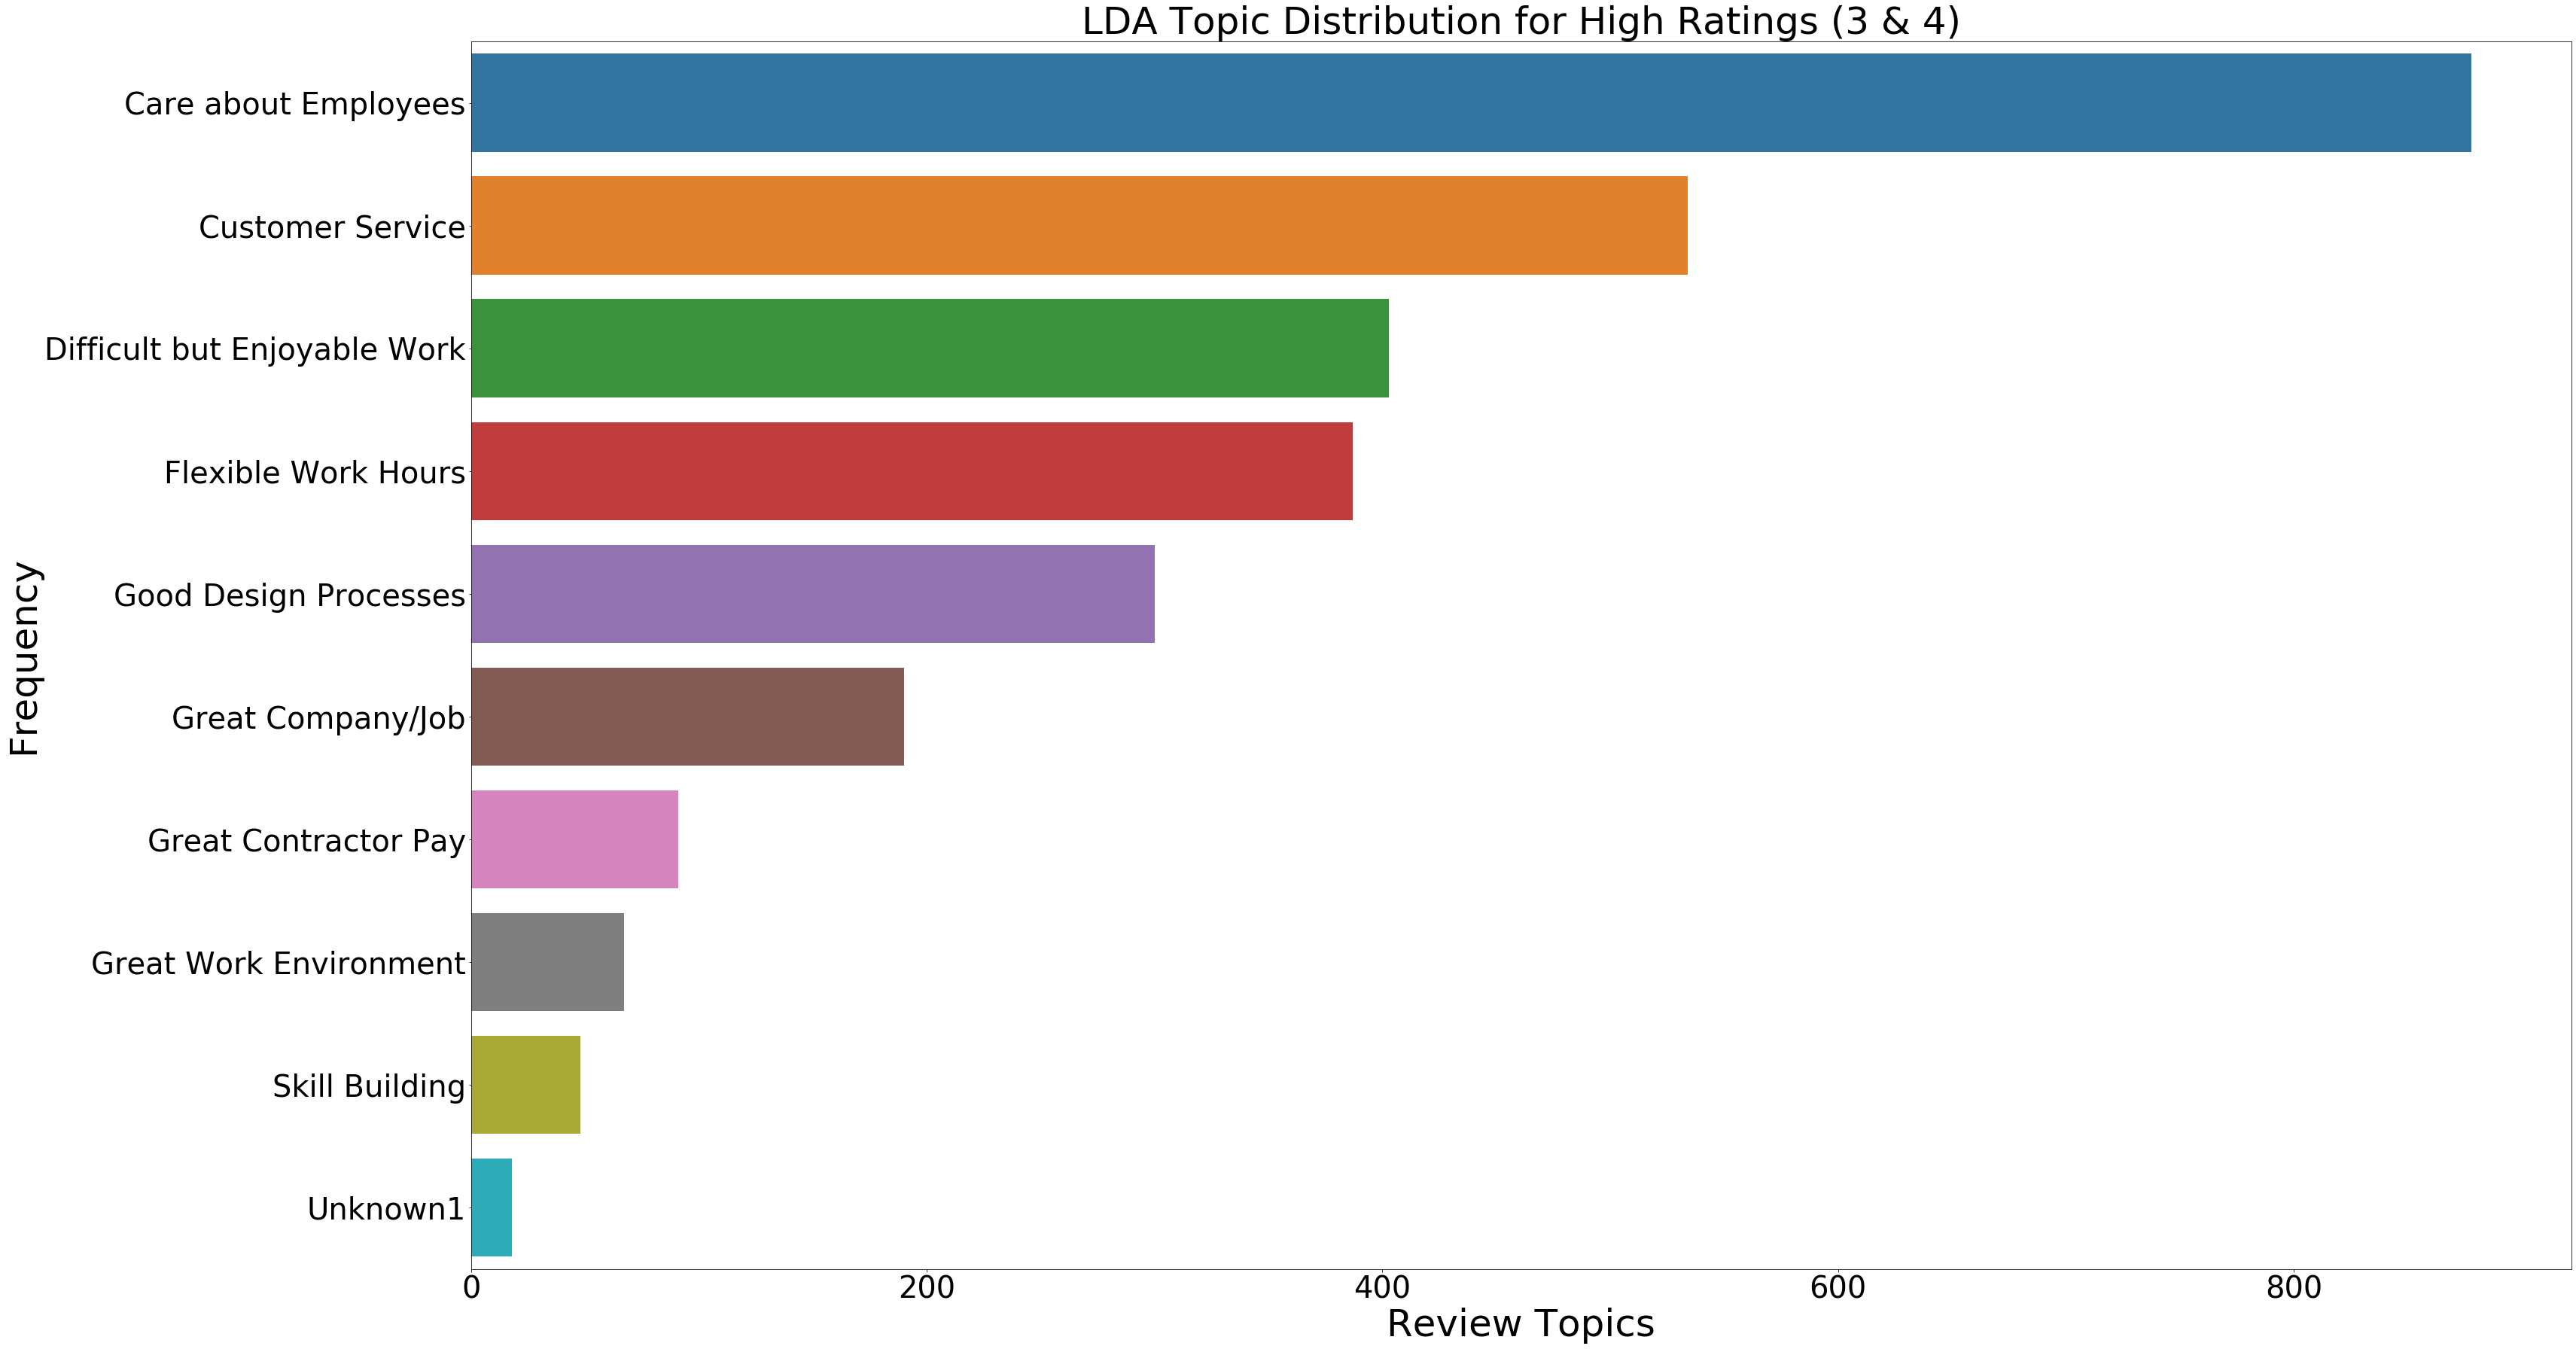

In [55]:
lda_high_x = df_high_ratings['lda_topics'].value_counts()
lda_high_y = lda_high_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(lda_high_x, lda_high_y.index)
plt.title("LDA Topic Distribution for High Ratings (3 & 4)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)

(array([  0., 100., 200., 300., 400., 500.]),
 <a list of 6 Text xticklabel objects>)

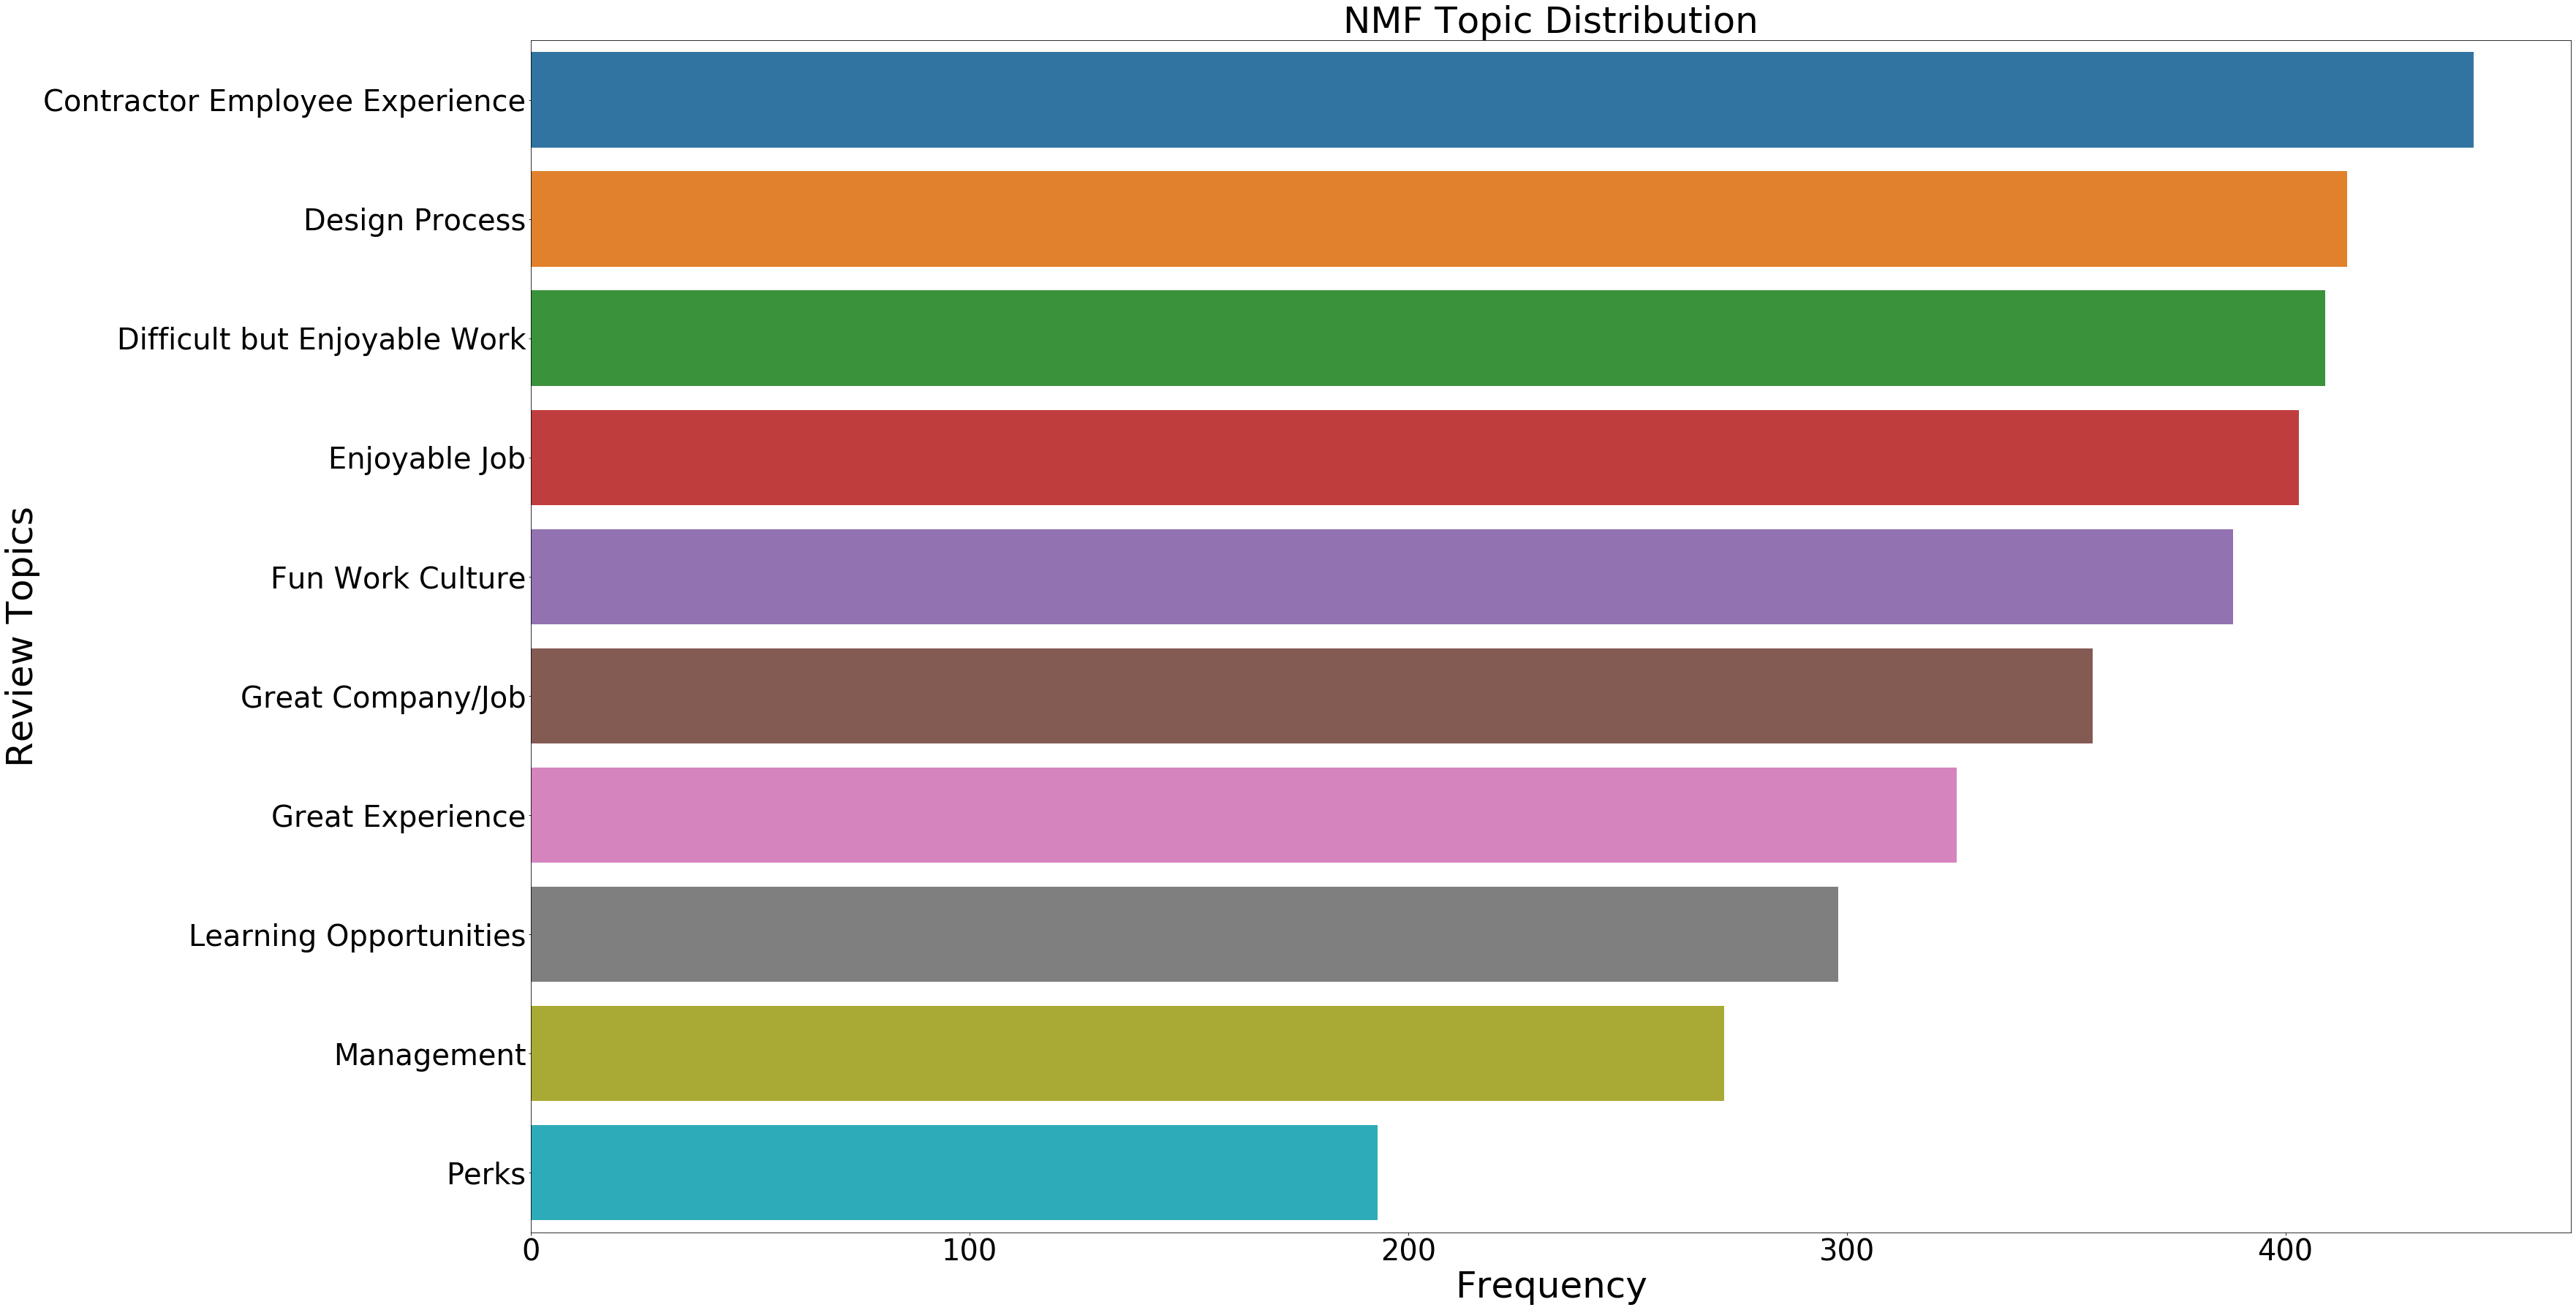

In [51]:
nmf_x = df['nmf_topics'].value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_x, nmf_y.index)
plt.title("NMF Topic Distribution", fontsize=50)
plt.ylabel('Review Topics', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency', fontsize=50)
plt.xticks(fontsize=40)

(array([ 0., 10., 20., 30., 40., 50.]), <a list of 6 Text xticklabel objects>)

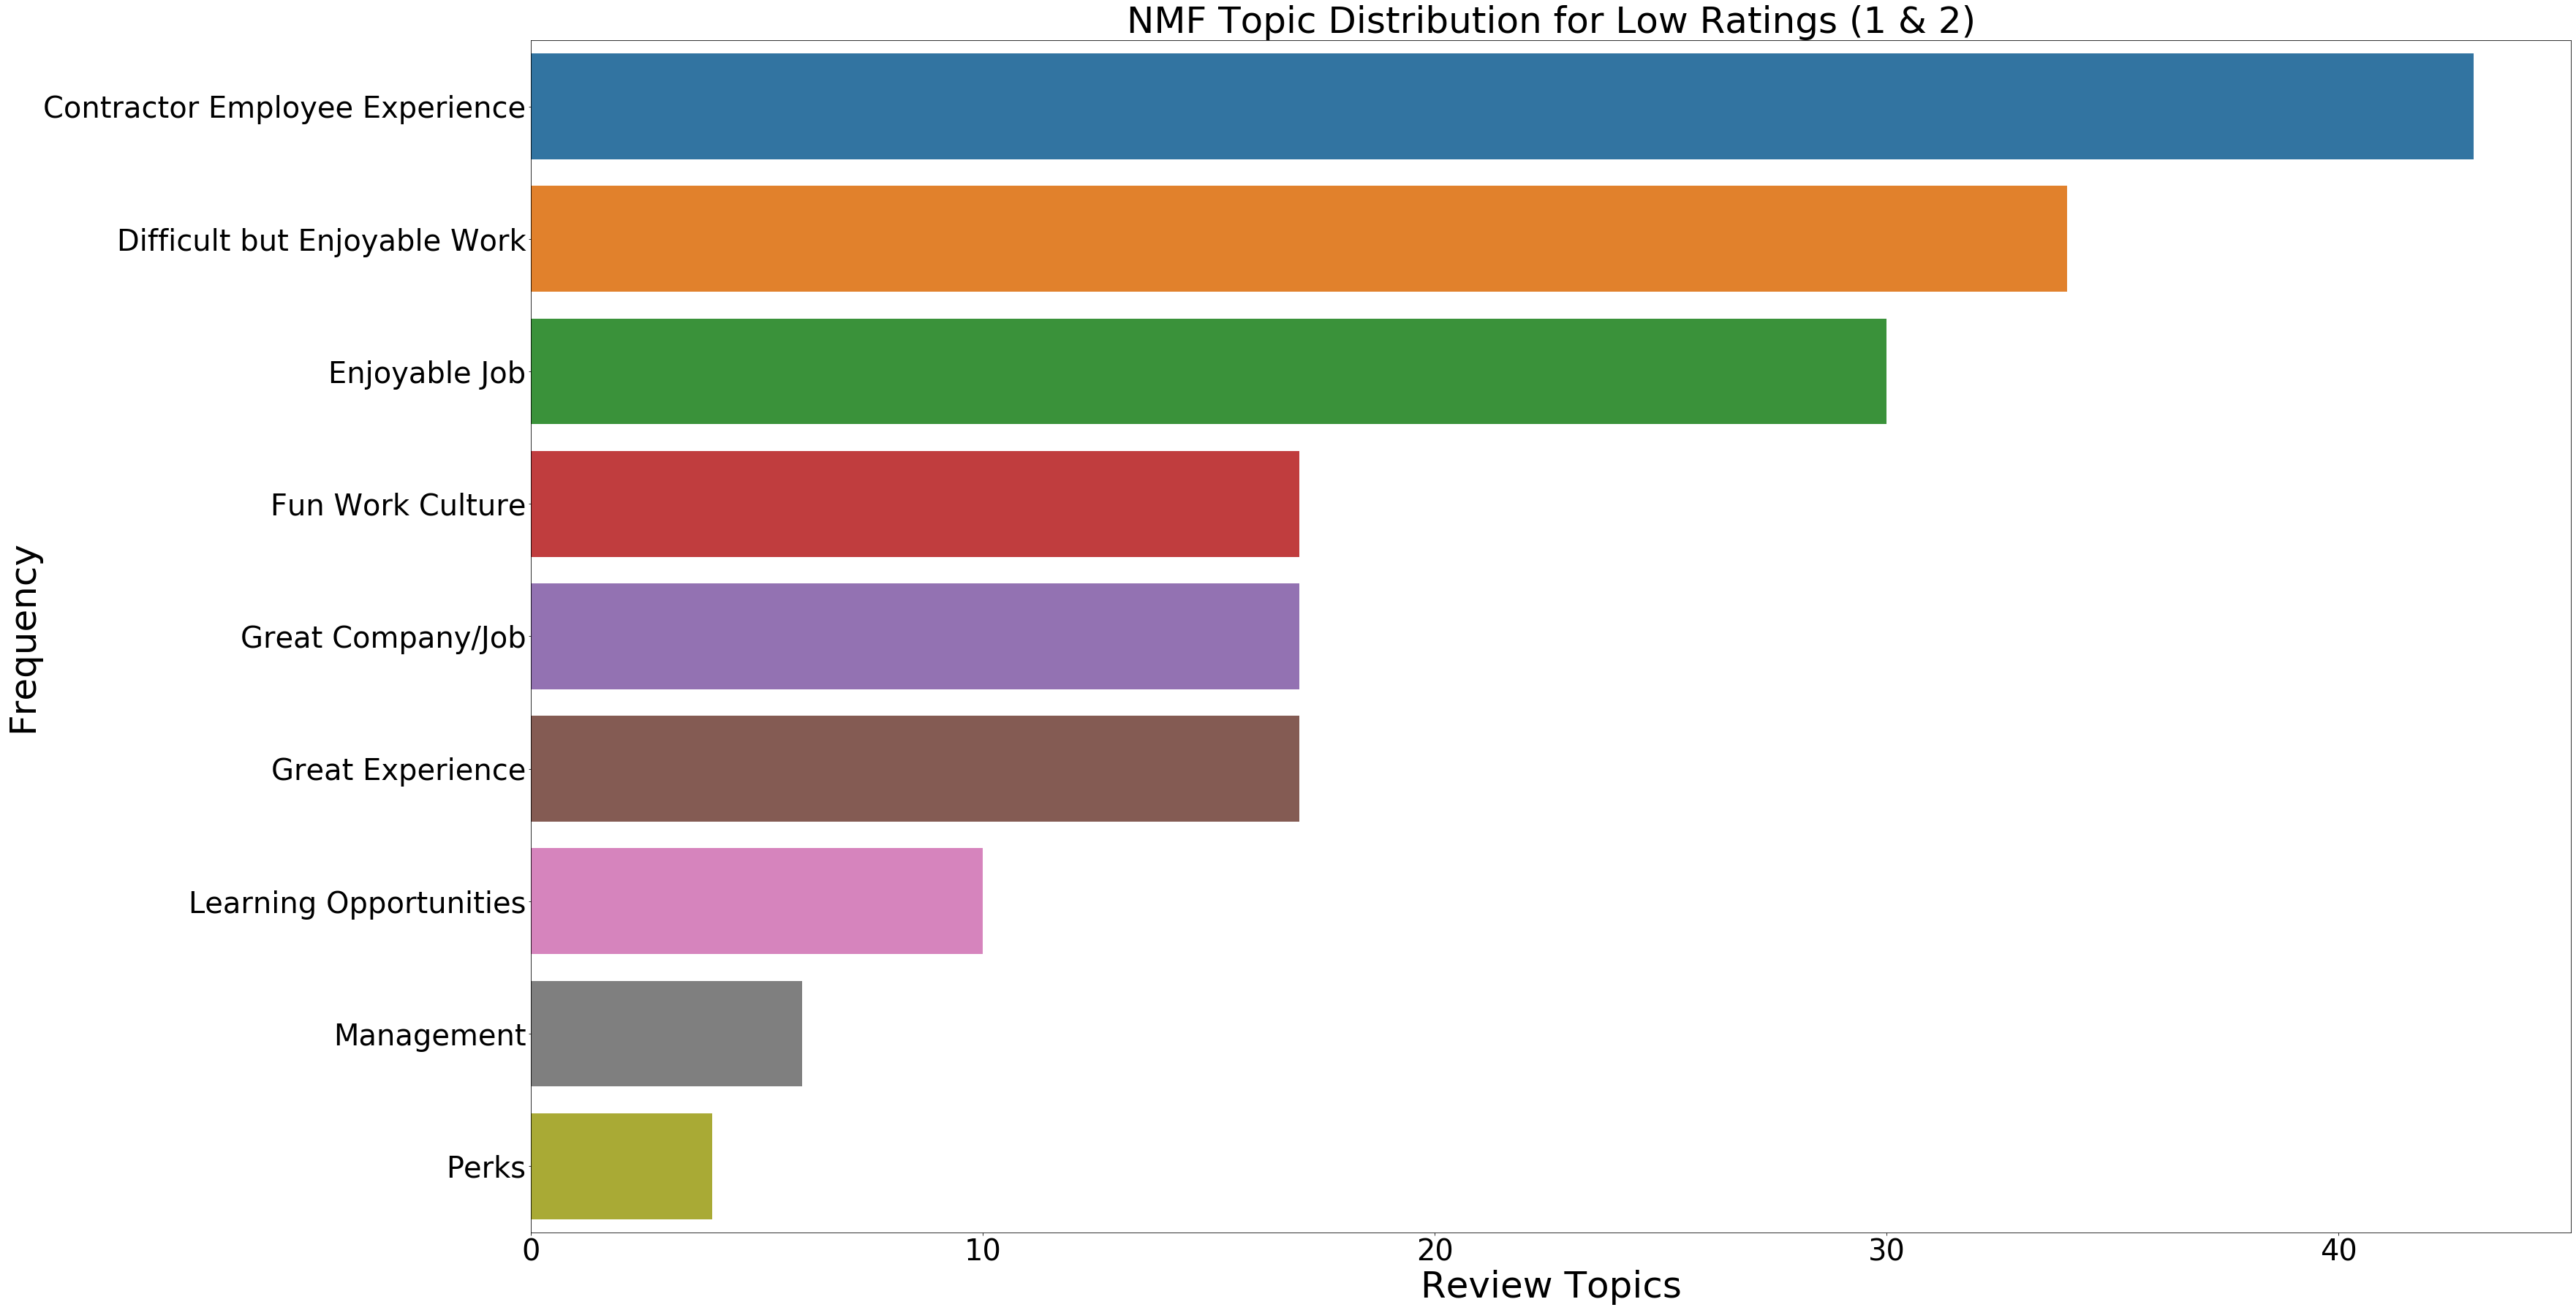

In [56]:
nmf_low_x = df_low_ratings['nmf_topics'].value_counts()
nmf_low_y = nmf_low_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_low_x, nmf_low_y.index)
plt.title("NMF Topic Distribution for Low Ratings (1 & 2)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

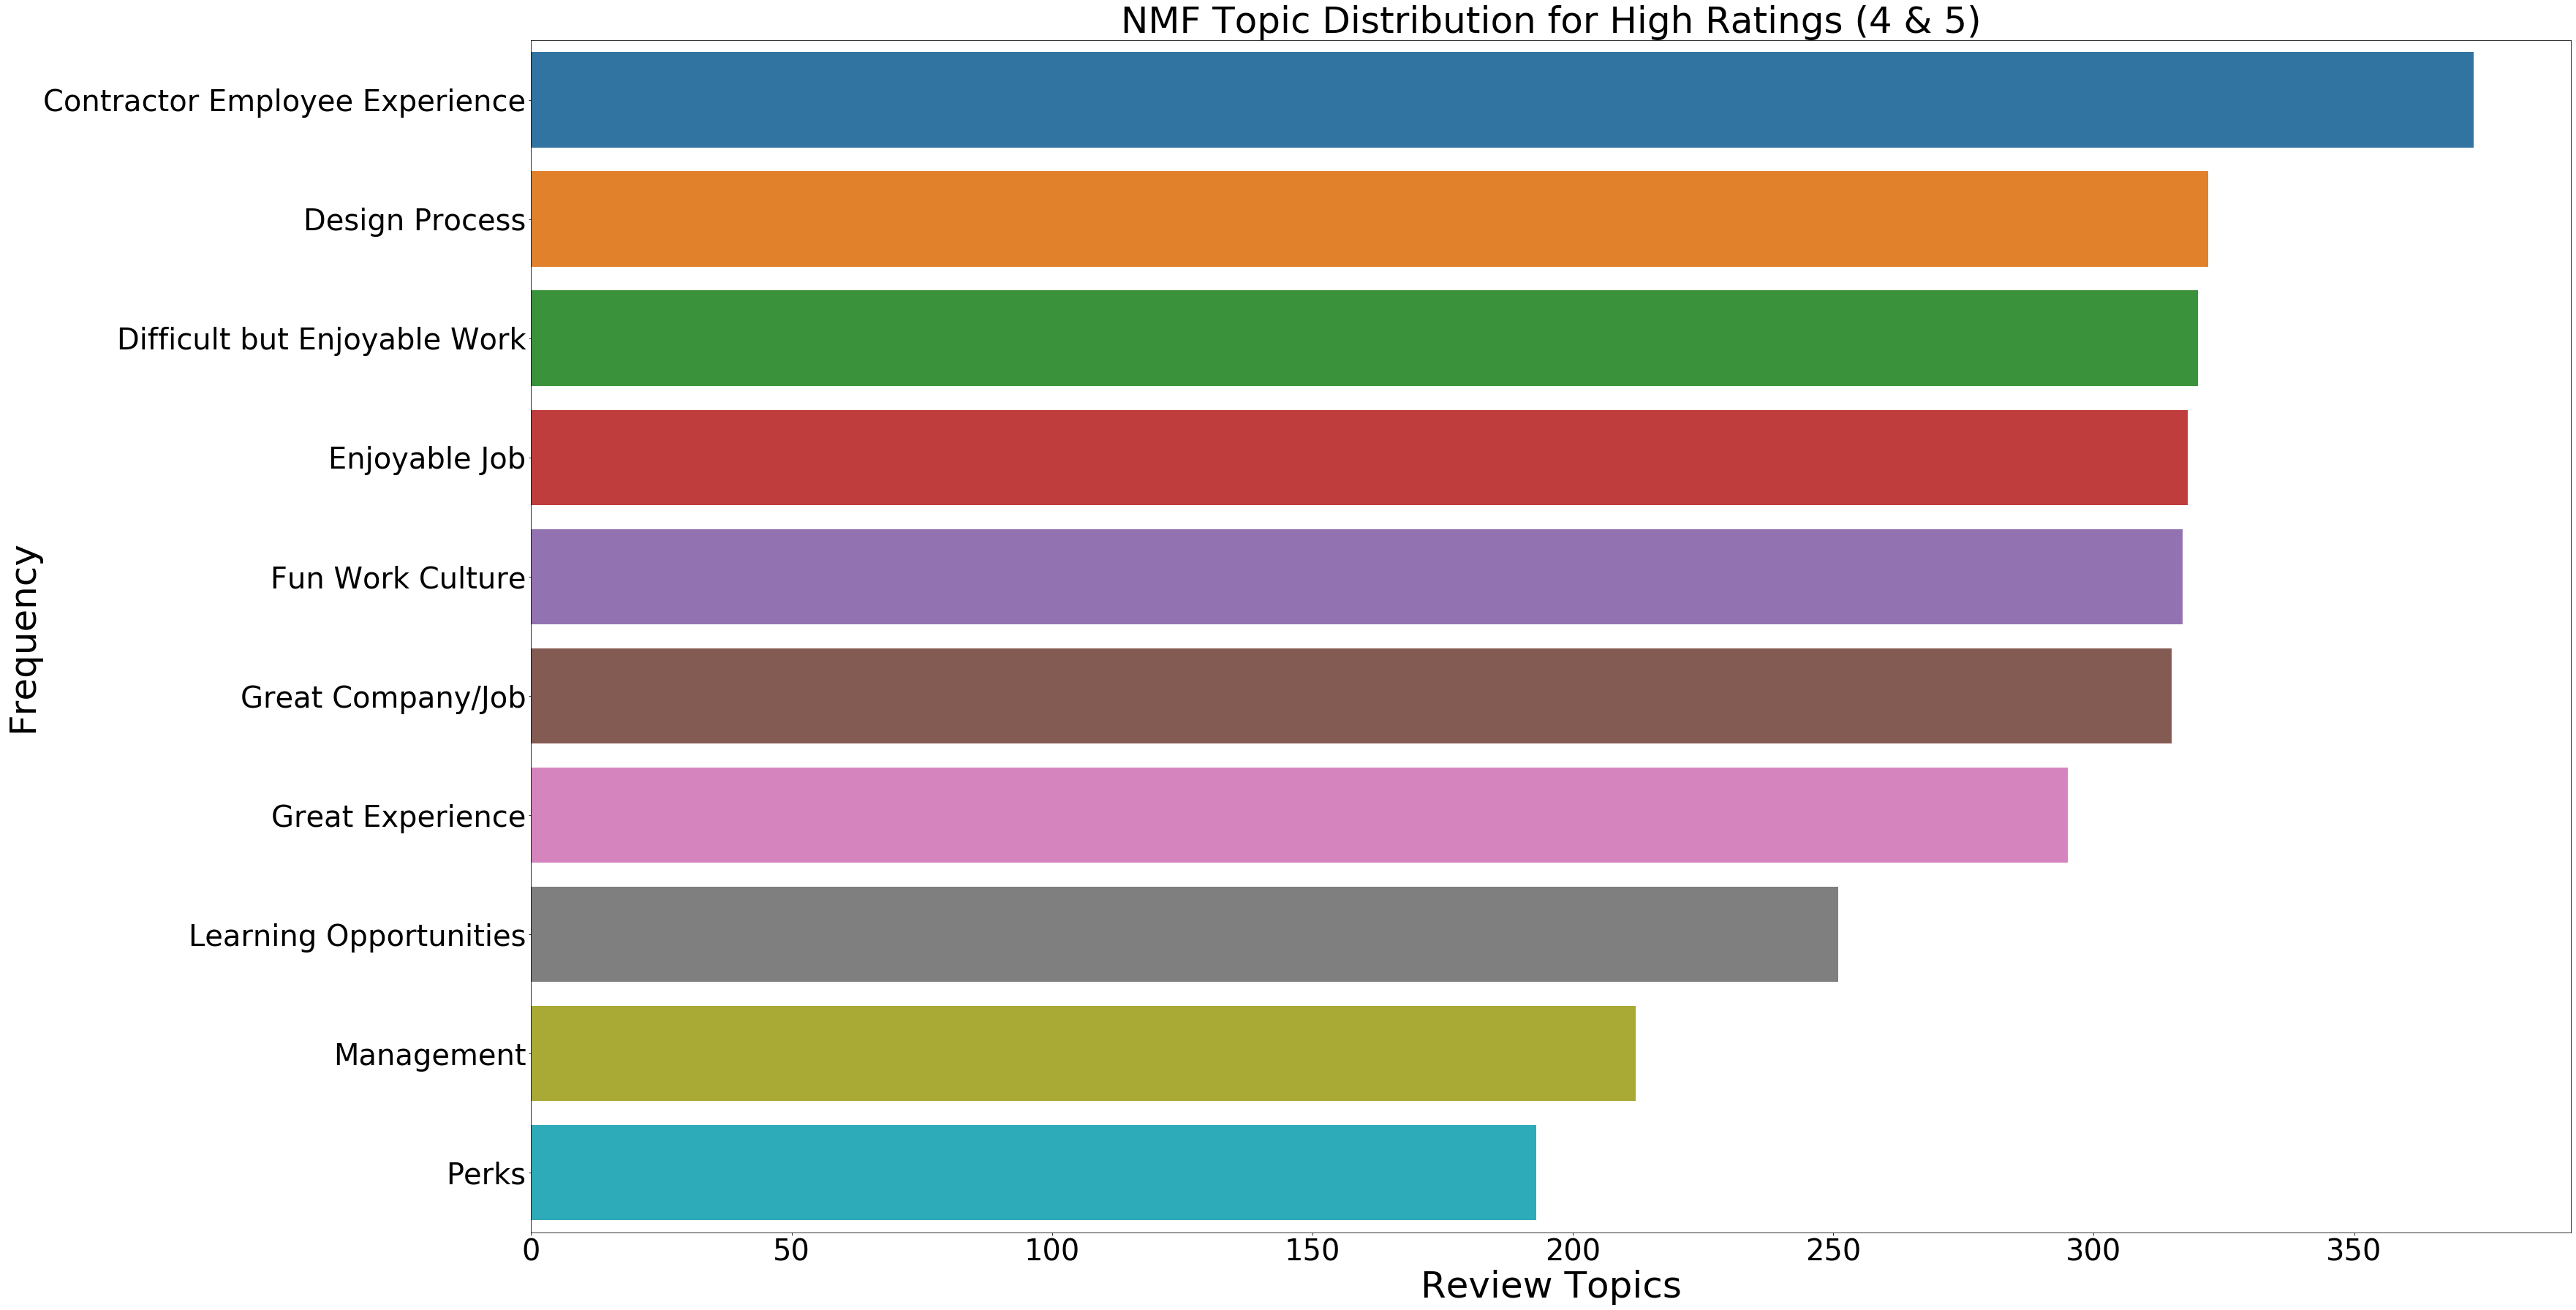

In [59]:
nmf_high_x = df_high_ratings['nmf_topics'].value_counts()
nmf_high_y = nmf_high_x.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(nmf_high_x, nmf_high_y.index)
plt.title("NMF Topic Distribution for High Ratings (4 & 5)", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Review Topics', fontsize=50)
plt.xticks(fontsize=40)



In [ ]:
df.describe()